In [ ]:
# 폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# sweetviz 패키지 다운로드
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 사용할 라이브러리 및 패키지

In [ ]:
# 사용할 라이브러리 및 패키지

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import sweetviz as sv
#from ydata_profiling import ProfileReport
import os
import re
import sys
sys.path.append('/content/drive/MyDrive/Yeardream_PJ')

import module as md



plt.rc('font', family='NanumBarunGothic')


# 데이터 불러오기

In [ ]:
# 데이터 불러오기 

df = pd.read_csv('/content/drive/MyDrive/Yeardream_PJ/eda-proj-fc-purchase.csv', encoding='utf-8', index_col =0)
df.head()

유형   고객id    코스ID         사이트   포맷    카테고리  \
거래id                                                       
2417084  PAYMENT  20053  209016  FASTCAMPUS  올인원  업무 생산성   
2415408  PAYMENT  58309  210664  FASTCAMPUS  올인원  부동산/금융   
2413897  PAYMENT  18075  211782  FASTCAMPUS  올인원   영상/3D   
2413891  PAYMENT  41898  213450  FASTCAMPUS  올인원   프로그래밍   
2413887  PAYMENT  94328  210773  FASTCAMPUS  올인원   프로그래밍   

                                                 코스(상품) 이름  \
거래id                                                         
2417084                       올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원   
2415408                   초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무   
2413897  편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...   
2413891  초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...   
2413887            초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접   

                              거래일자                   쿠폰이름    판매가격      결제수단  \
거래id                                                                          
2417084  2022. 12. 31. 오후 10:12:33                      -  189000  TRANSFER   
2415408   2022. 12. 30. 오후 6:12:57                      -  501000  TRANSFER   
2413897  2022. 12. 31. 오후 11:12:15                      -  549000      CARD   
2413891  2022. 12. 31. 오후 11:12:03  [WELCOME] 프로그래밍 3만원할인  165000      CARD   
2413887  2022. 12. 31. 오후 11:12:10                      -  239000      CARD   

          실거래금액  쿠폰할인액    거래금액 환불금액  
거래id                                 
2417084  159000      -  159000    -  
2415408  501000      -  501000    -  
2413897  549000      -  549000    -  
2413891  135000  30000  135000    -  
2413887  239000      -  239000    -

# 데이터 정보 확인

In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159328 entries, 2417084 to 1486194
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   유형         159328 non-null  object
 1   고객id       159328 non-null  int64 
 2   코스ID       159328 non-null  int64 
 3   사이트        159328 non-null  object
 4   포맷         159328 non-null  object
 5   카테고리       159328 non-null  object
 6   코스(상품) 이름  159328 non-null  object
 7   거래일자       159328 non-null  object
 8   쿠폰이름       159328 non-null  object
 9   판매가격       159328 non-null  object
 10  결제수단       159328 non-null  object
 11  실거래금액      159328 non-null  int64 
 12  쿠폰할인액      159328 non-null  object
 13  거래금액       159328 non-null  object
 14  환불금액       159328 non-null  object
dtypes: int64(3), object(12)
memory usage: 19.4+ MB


# 범주형 데이터 유형 확인

In [ ]:
# categorical data 유형 확인

print('유형 : ', df['유형'].unique())
print('포맷 : ', df['포맷'].unique())
print('코스이름 : ', df['코스(상품) 이름'].unique())
print('카테고리 : ', df['카테고리'].unique())
print('쿠폰이름 : ', df['쿠폰이름'].unique())
print('결제수단 : ', df['결제수단'].unique())

유형 :  ['PAYMENT' 'REFUND']
포맷 :  ['올인원' 'RED']
코스이름 :  ['올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원' '초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무'
 '편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트 마스터'
 '초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jetpack Compose'
 '초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접'
 '초격차 패키지 : 퍼포먼스 마케팅, 데이터로 완전 정복'
 '[Kit] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지'
 '올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터'
 '네오아카데미 : 킨티의 58개의 예제를 통해 배우는 캐주얼 캐릭터 완전판' '올인원 패키지 : 디자이너 몰래 듣는 압축 포토샵'
 'The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 MSA 구축 by 이희창'
 '(221212~230131) 올인원 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 Essential'
 '초격차 패키지 : 프론트엔드 웹 개발의 모든 것 (시그니처)'
 '초격차 패키지 : 한 번에 끝내는 AWS 기반 아키텍처 설계와 DevOps'
 '쟈니브로스에게 배우는 영상 완성의 3단계 : 편집, 색보정, CG효과' '초격차 패키지 : 한 번에 끝내는 반복 업무 자동화'
 '초격차 패키지 : React Native를 활용한 빠르고 완성도 높은 앱 개발 \u2028with 21개 프로젝트'
 '초격차 패키지 : 한 번에 끝내는 데이터 분석' '올인원 패키지 : 컴퓨터 비전 정주행 Kit'
 ' 초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것' '초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발'
 '초격차 패키지 : 딥러닝·인공지능 Signature'
 '올인원 패키지 : 문서의 신이 알려주는 보

# 결측치 확인

In [ ]:
# 결측치 확인
df.isnull().sum()

유형           0
고객id         0
코스ID         0
사이트          0
포맷           0
카테고리         0
코스(상품) 이름    0
거래일자         0
쿠폰이름         0
판매가격         0
결제수단         0
실거래금액        0
쿠폰할인액        0
거래금액         0
환불금액         0
dtype: int64

# 데이터 타입 변환 및 데이터 정제


In [ ]:
# 기존 데이터프레임과 변환시킨 데이터프레임 비교를 위해 testt셋 생성
test = df.copy()

In [ ]:
#거래일자 date-time 형식으로 변환
test['거래일자'] = test['거래일자'].apply(md.convert_time_format)
test['거래일자'] = pd.to_datetime(test['거래일자'], format='%Y. %m. %d. %p %I:%M:%S')

# 수치형 데이터 타입변환
test = test.replace({'쿠폰할인액' : '-'}, '0')
test = test.replace({'거래금액' : '-'}, '0') 
test = test.replace({'판매가격' : '-'}, '0')
test = test.replace({'환불금액' : '-'}, '0')

test['판매가격'] = test['판매가격'].astype(int)
test['쿠폰할인액'] = test['쿠폰할인액'].astype(int)
test['거래금액'] = test['거래금액'].astype(int)
test['환불금액'] = test['환불금액'].astype(int)

In [ ]:
# 필요없는 특징(컬럼) 삭제
test.drop(['사이트'], axis=1, inplace = True)

In [ ]:
# 필요없는 데이터(행) 삭제
test.drop(test[test['유형'] == 'REFUND'].index, axis=0, inplace=True)
test.drop(test[test['판매가격']<test['실거래금액']].index, axis=0, inplace=True)

# 검수, 참고, test, 미리보기, 테스트, 작성용
test.drop(test[(test['쿠폰이름'].str.contains('확인용')) | ((test['쿠폰이름'].str.contains('점검')) |test['쿠폰이름'].str.contains('TEST')) |(test['쿠폰이름'].str.contains('검토')) |(test['쿠폰이름'].str.contains('업무용')) |(test['쿠폰이름'].str.contains('검수')) | (test['쿠폰이름'].str.contains('참고')) | (test['쿠폰이름'].str.contains('test')) | (test['쿠폰이름'].str.contains('미리보기')) | (test['쿠폰이름'].str.contains('테스트')) | (test['쿠폰이름'].str.contains('작성용'))].index, inplace=True)

# 1단계 : 드롭 : (컬럼: 사이트), (데이터 : '쿠폰이름" : 검수, 참고, test, 미리보기, 테스트, 작성용), 변환 : (컬럼 : 거래일자 -> object 에서 datetime, 판매금액, 환불금액, 거래금액 : object 에서 int로, '-' -> 0으로
# 2~3단계 : 드롭 : (데이터 : "쿠폰이름" : 업무용)
# 4단계 : 드롭 : (컬럼: 환불금액), (데이터: "쿠폰이름" : TEST, 점검, 검토)
# 5단계 : 드롭 : (데이터 : 확인용))

In [ ]:
test.drop(['환불금액'], axis=1, inplace = True)

# 변환된 데이터 타입 확인

In [ ]:
# 수정된 데이터 정보 확인
print(df.info())
print(df.shape)
print(test.info())
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159328 entries, 2417084 to 1486194
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   유형         159328 non-null  object
 1   고객id       159328 non-null  int64 
 2   코스ID       159328 non-null  int64 
 3   사이트        159328 non-null  object
 4   포맷         159328 non-null  object
 5   카테고리       159328 non-null  object
 6   코스(상품) 이름  159328 non-null  object
 7   거래일자       159328 non-null  object
 8   쿠폰이름       159328 non-null  object
 9   판매가격       159328 non-null  object
 10  결제수단       159328 non-null  object
 11  실거래금액      159328 non-null  int64 
 12  쿠폰할인액      159328 non-null  object
 13  거래금액       159328 non-null  object
 14  환불금액       159328 non-null  object
dtypes: int64(3), object(12)
memory usage: 23.5+ MB
None
(159328, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146355 entries, 2417084 to 1545070
Data columns (total 13 columns):
 #   Column   

#데이터 분석

# New Section

In [ ]:
# 데이터분석을 위한 새로운 데이터프레임 복사
new_df = test.copy()

In [ ]:
# 데이터 분석 보고서 시각화 (sweetviz)
report = sv.analyze(modified_df3, target_feat='실거래금액')
#display the report
report.show_html('/content/drive/MyDrive/쿠폰이름_카테고리리.html')
#report.show_notebook(layout="vertical", w=850, h=700, scale=0.8)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st

Report /content/drive/MyDrive/쿠폰이름_카테고리리.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 쿠폰이름 분류 세분화 
- 할인금액 or 할인율
- 쿠폰 발행의도
- 카테고리

In [ ]:
# (할인금액 or 할인율)로 치환하기 위해 정규표현식을 사용하여 변환

regex_patterns_1 = [r'(\d+)만원할인', r'(\d+)만원 할인', r'(\d+)원', r'(\d+)%', r'(\d+),(\d+)원', r'(\d+)만원', 
                  r'무료', r'수강권', r'1\+1', r'페이백', r'반값', r'(\d+)만', r'\[타임특가\] 온라인 강의 할인', r'패캐머_온라인', r'AWS/DevOps',
                  r'온라인 단과 강의 할인', r'패스트캠퍼스 온라인 강의 평생소장권', r'AWS 정주행 Kit 강의 전용', r'\[고객님 전용\] AWS 데이터 인프라 구축&엔지니어링 정주행 Kit 할인', r'\(B2B\) 임팩트커리어 우수 수강생 대상 쿠폰',
                  r'\[서강대학교 대학원 특별할인\] 한 번에 끝내는 컴퓨터비전', r'2022 Winter Internship coupon', r'바이트디그리', r'코딩 18']
replacement_patterns_1 = [r'\g<1>만원할인', r'\g<1>만원할인', r'\g<1>원할인',r'\g<1>%할인', r'\1\2원할인', r'\g<1>만원할인', 
                        r'100%할인', r'100%할인', r'100%할인', r'100%할인', r'50%할인', r'\g<1>만원할인', r'30%할인', r'100%할인', r'20%할인',
                        r'30%할인', r'100%할인', r'10만원할인', r'56%할인', r'100%할인', r'30%할인', r'100%할인', r'100%할인', r'100%할인']
# 범위로 다시 변환
regex_patterns_2 = [r'([0-5])만원할인', r'([5-9]|10)만원할인',r'(1[0-5])만원할인',r'(1[5-9]|20)만원할인',r'(2[0-5])만원할인', r'(2[5-9]|30)만원할인',
                    r'([0-9]|10)%할인', r'(1[0-9]|20)%할인',r'(2[0-9]|30)%할인',r'(3[0-9]|40)%할인',r'(4[0-9]|50)%할인', r'(5[0-9]|60)%할인',
                    r'(6[0-9]|70)%할인', r'(7[0-9]|80)%할인',r'(8[0-9]|90)%할인', r'(9[0-9]|10)%할인']
replacement_patterns_2 = [r'5만원이하', r'10만원이하', r'15만원', r'20만원', r'25만원', r'30만원', 
                          r'10%이하', r'20%이하', r'30%이하', r'40%이하', r'50%이하', r'60%이하',
                          r'70%이하', r'80%이하', r'90%이하', r'100%이하']


modified_df1 = md.replace_strings_with_regex_patterns(new_df, '쿠폰이름', regex_patterns_1, replacement_patterns_1)

# ex) 120000원 -> 12만원
modified_df1 = md.replace_strings_with_regex_patterns(modified_df1, '쿠폰이름', [r'(\d+)(\d{4})(원할인)'], [r'\1만원할인'])

modified_df1 = md.replace_strings_with_regex_patterns(modified_df1, '쿠폰이름', regex_patterns_2, replacement_patterns_2)

# value_counts()로 빈도수 계산
value_counts = modified_df1['쿠폰이름'].value_counts()

# 11개 이하인 값들을 '-'로 변환
threshold = 11
modified_df1['쿠폰이름'] = modified_df1['쿠폰이름'].apply(lambda x: '-' if value_counts[x] <= threshold else x)


In [ ]:
# 쿠폰발행의도에 맞게 쿠폰이름 변환
modified_df2 = md.change_coupon_mean_df(new_df)

# 카테고리별 쿠폰이름 변환
modified_df3 = md.change_coupon_category_df(new_df)

In [ ]:
# sweetviz 사용자 설정
sv.config_parser.read('/usr/local/lib/python3.10/dist-packages/sweetviz/Overrride.ini')

['/usr/local/lib/python3.10/dist-packages/sweetviz/Overrride.ini']

In [ ]:
# Feature configurateion
feature_config = sv.FeatureConfig(force_num=['판매가격', '실거래금액', '쿠폰할인액', '거래금액']) # skip = "", force_cat =[""], force_num=[""], force_text =[""]

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st


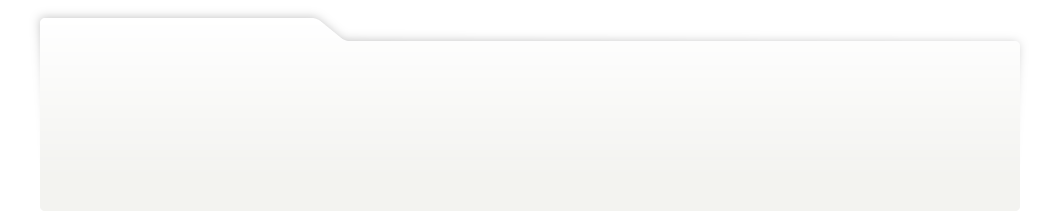
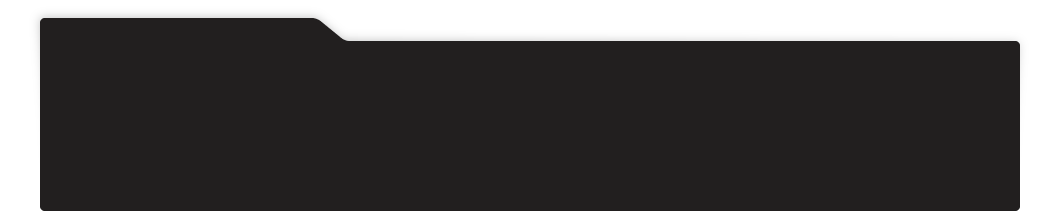
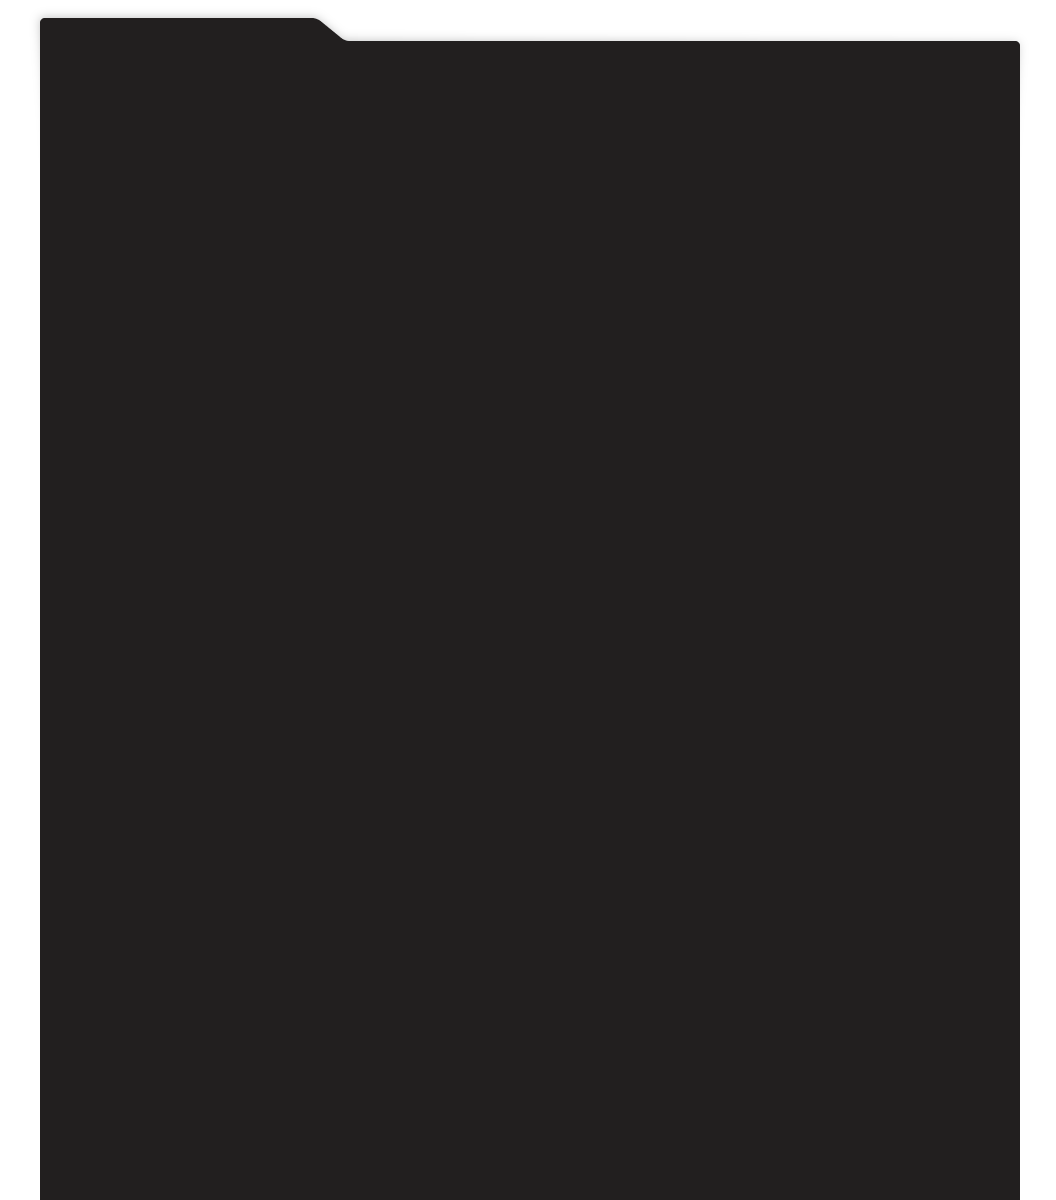
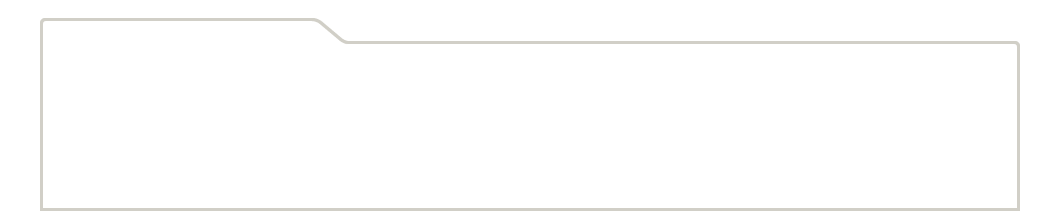
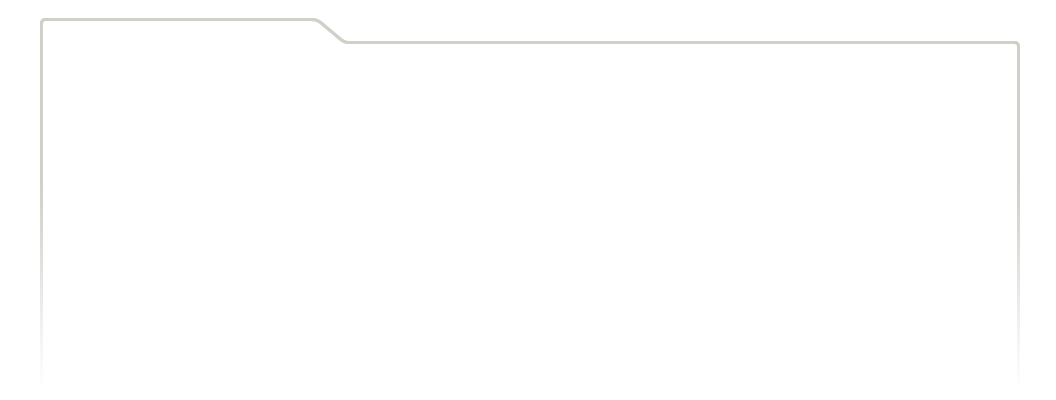
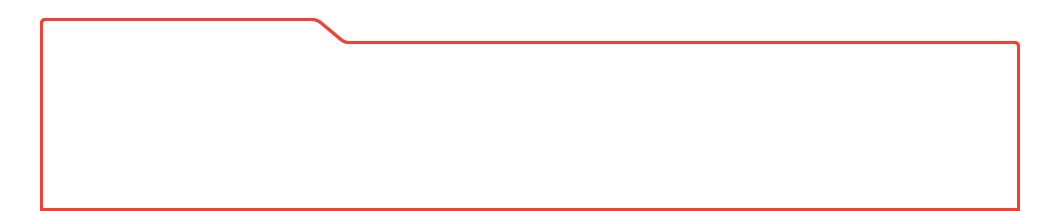
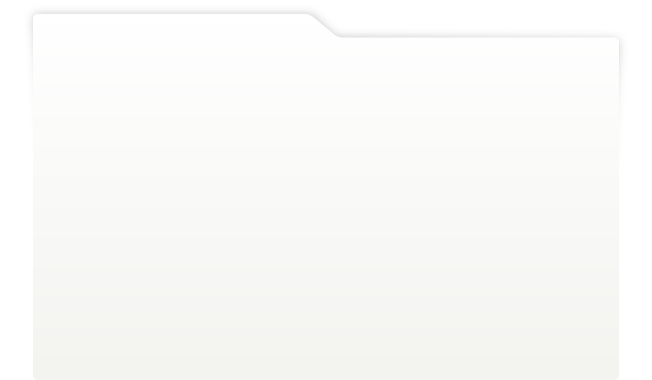
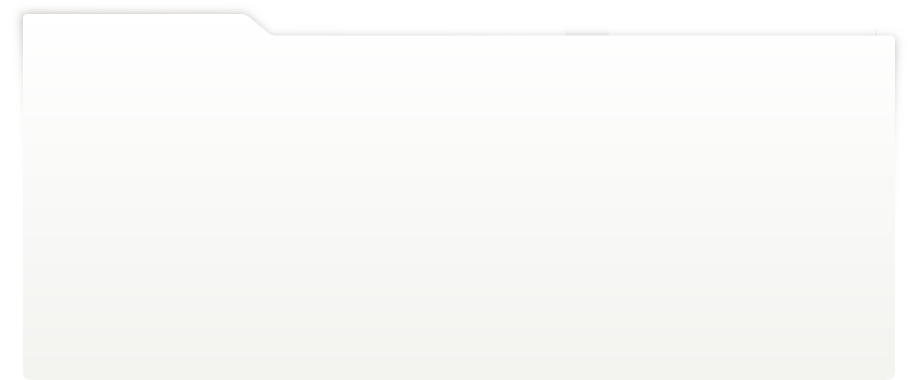
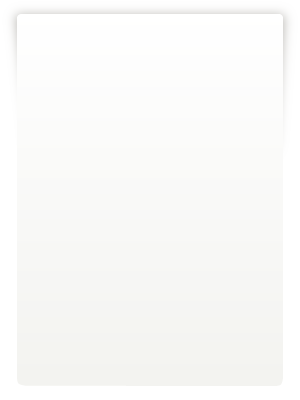
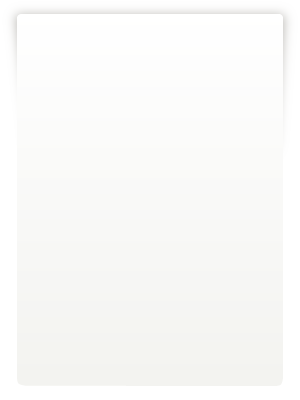
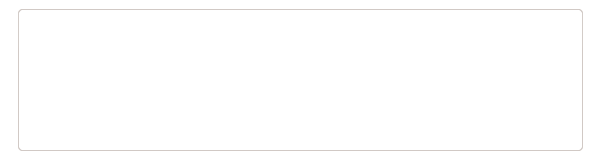
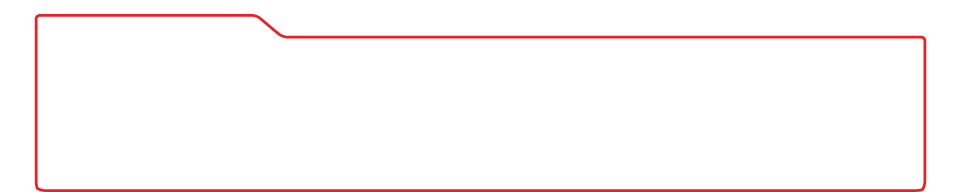
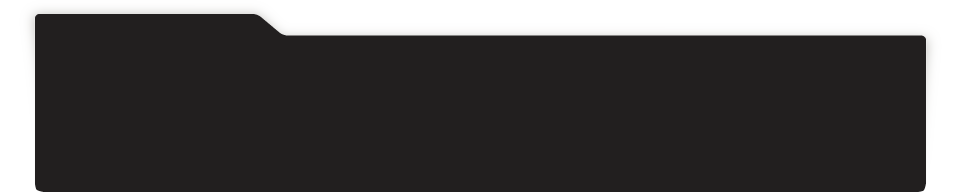
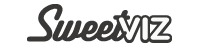
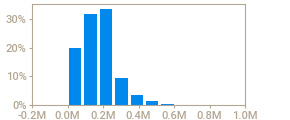
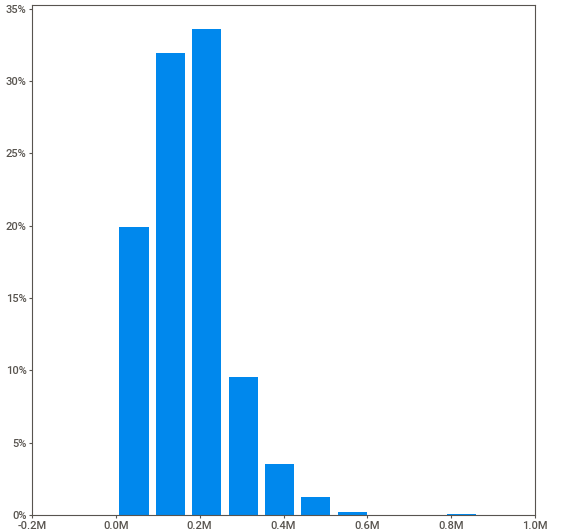
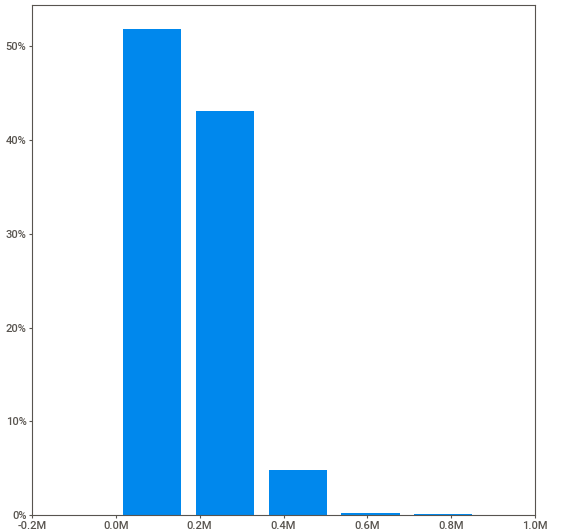
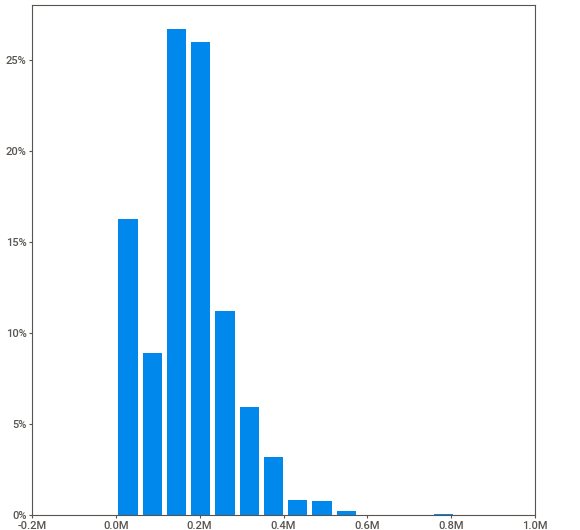
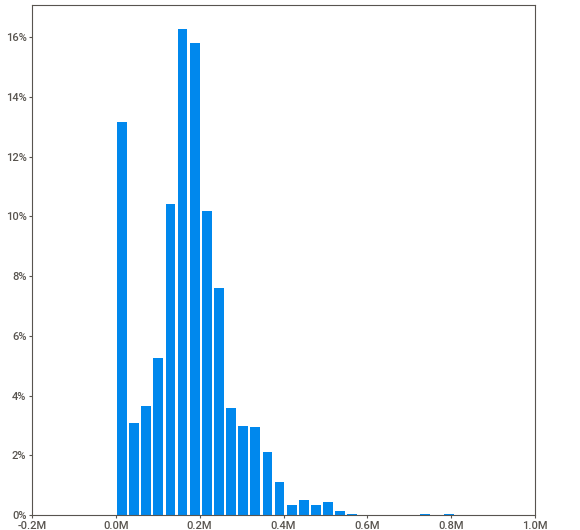
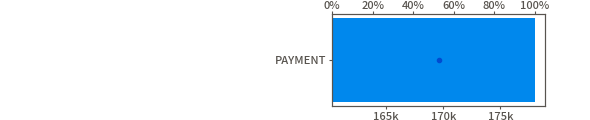
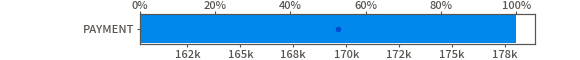
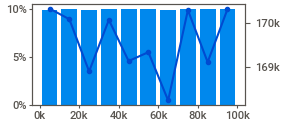
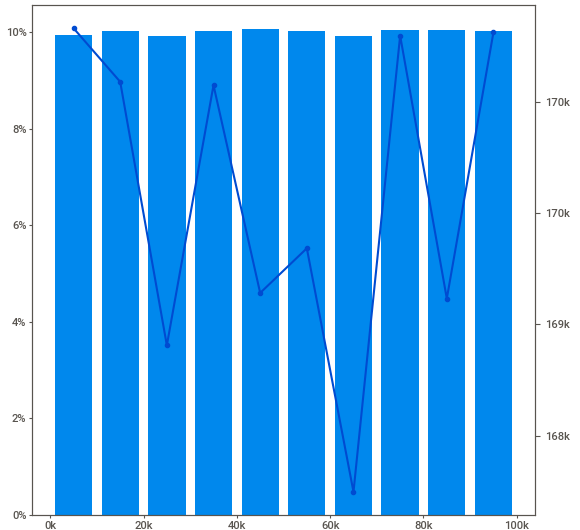
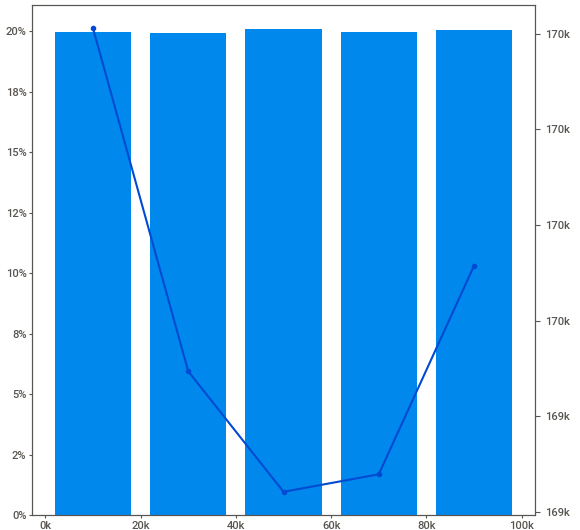
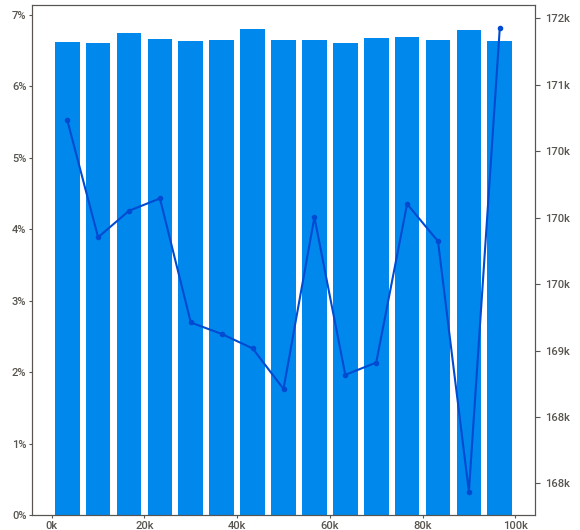
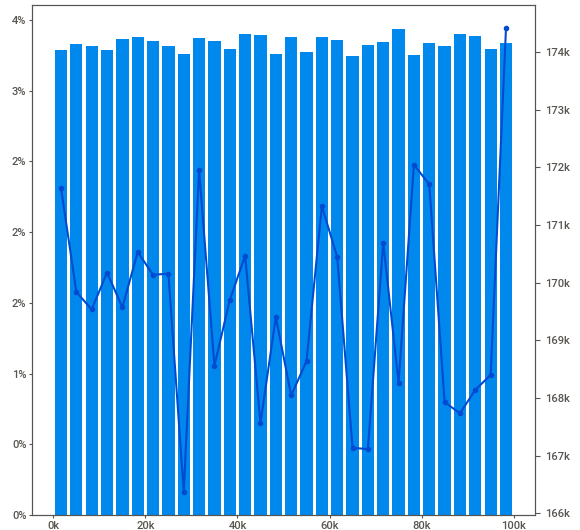
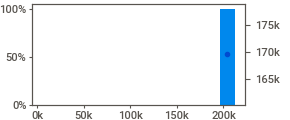
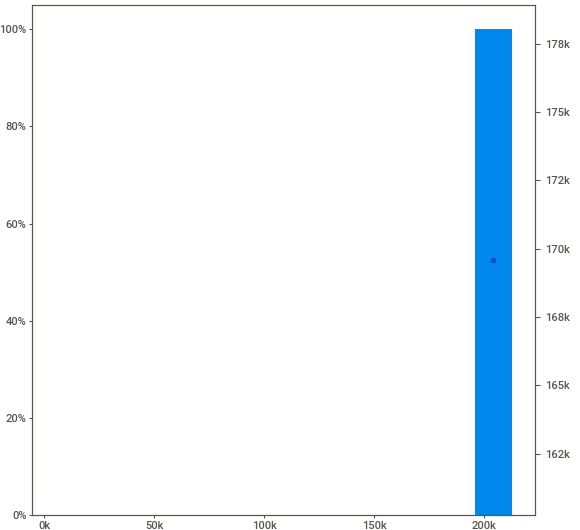
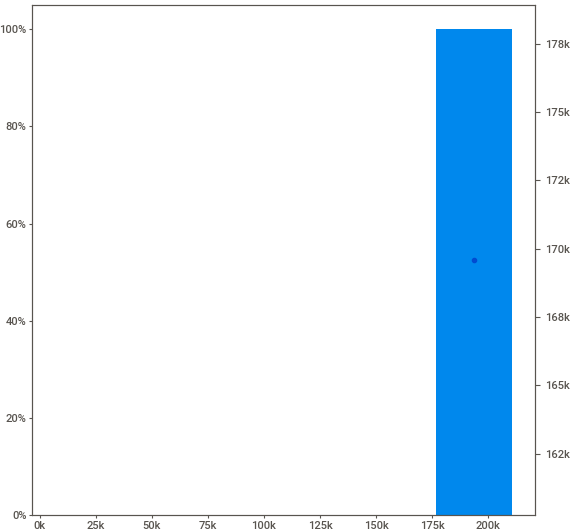
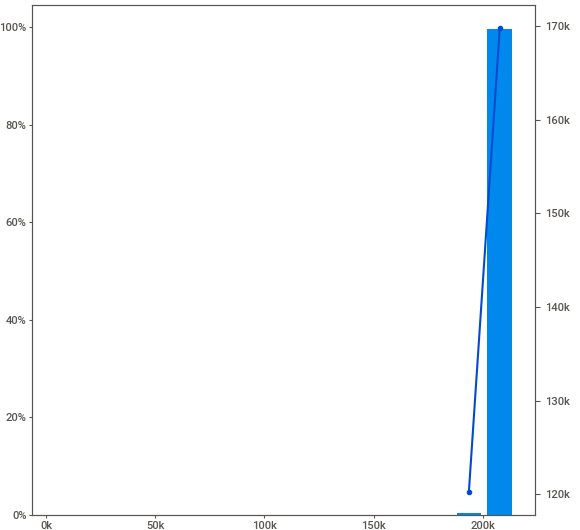
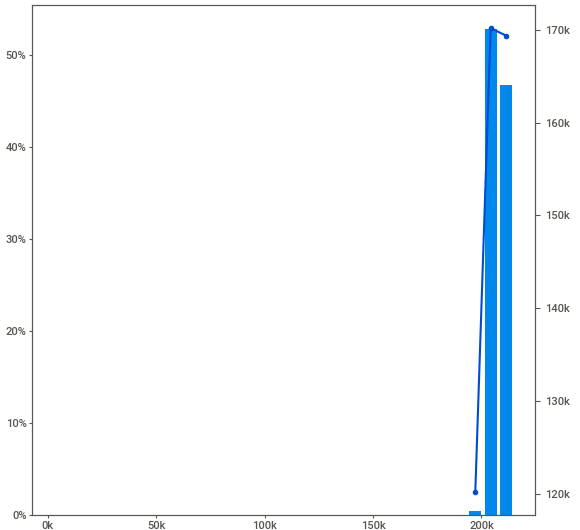
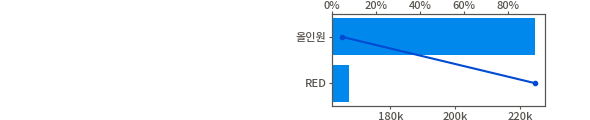
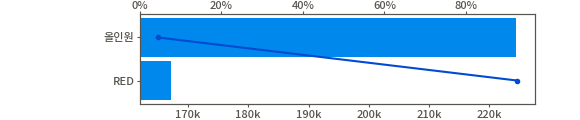
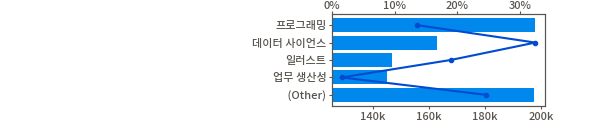
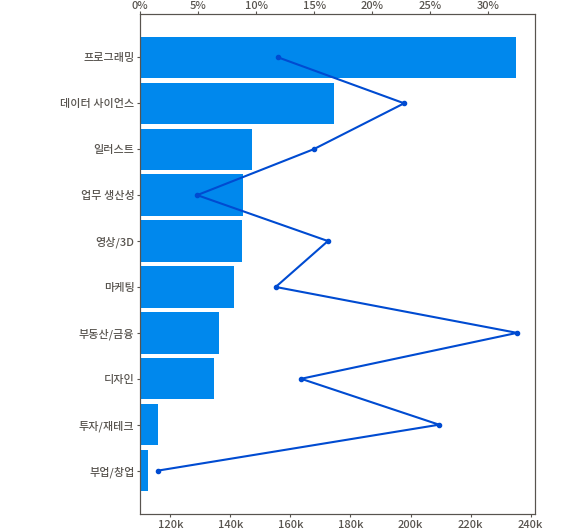
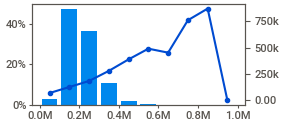
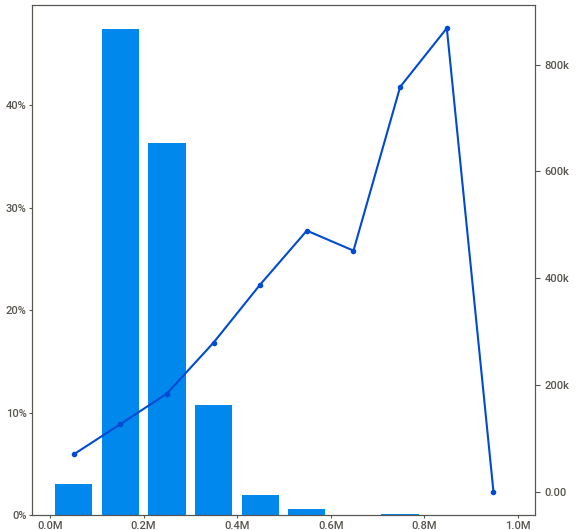
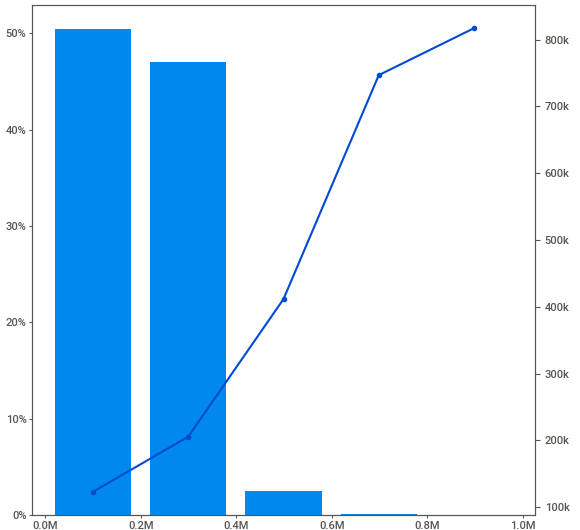
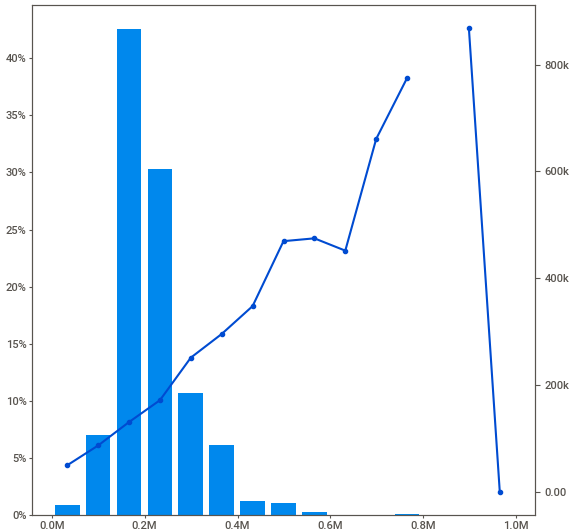
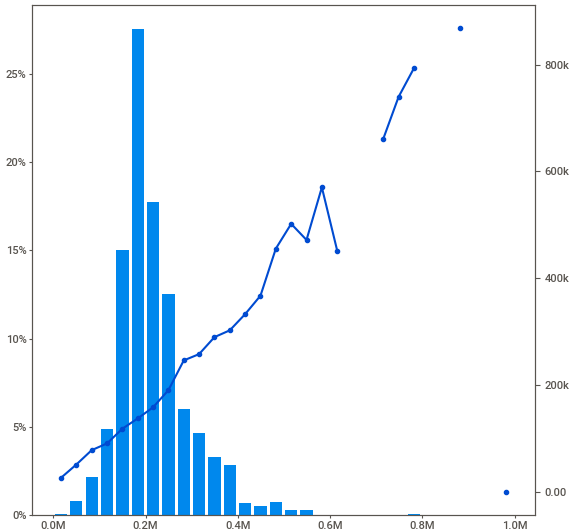
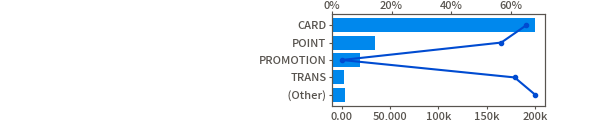
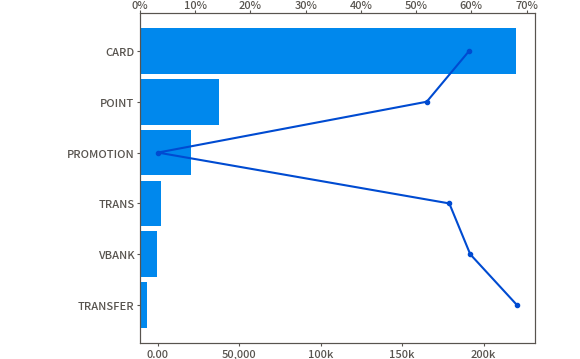
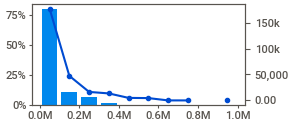
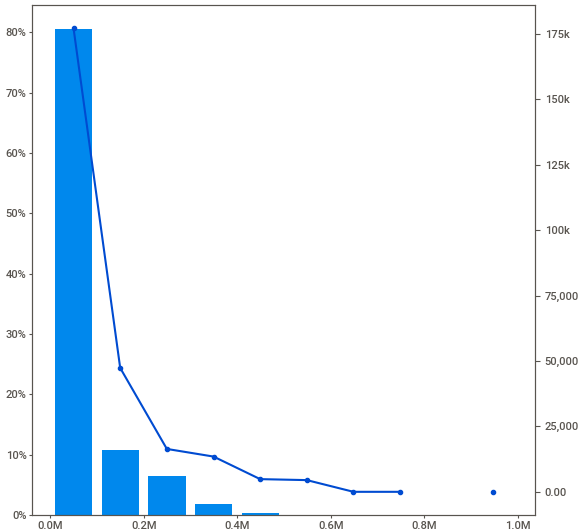
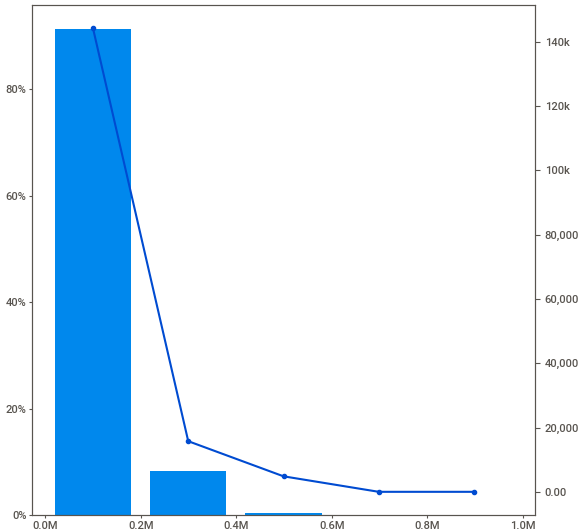
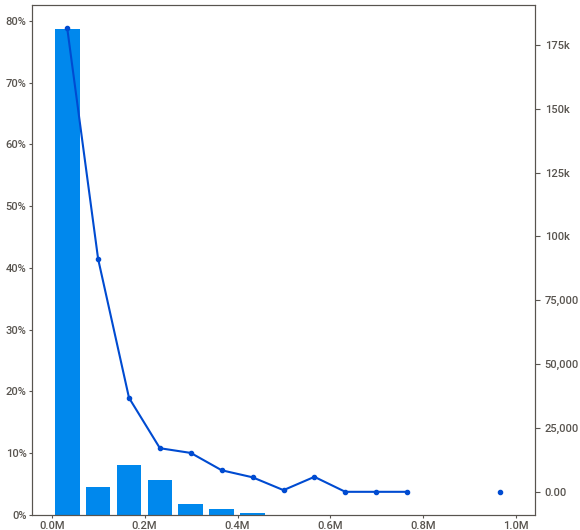
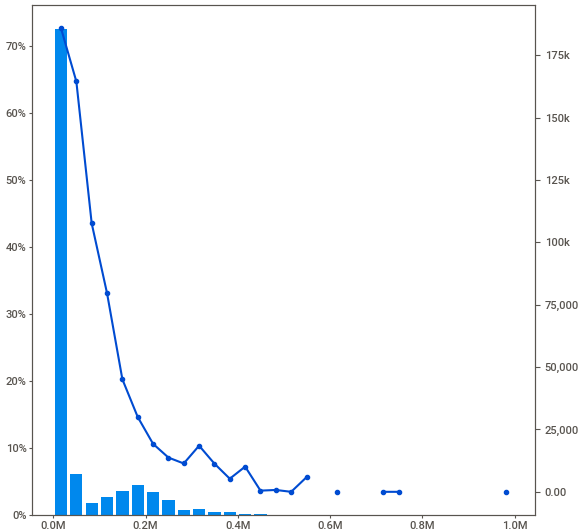
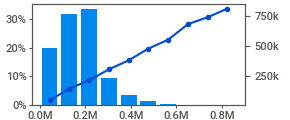
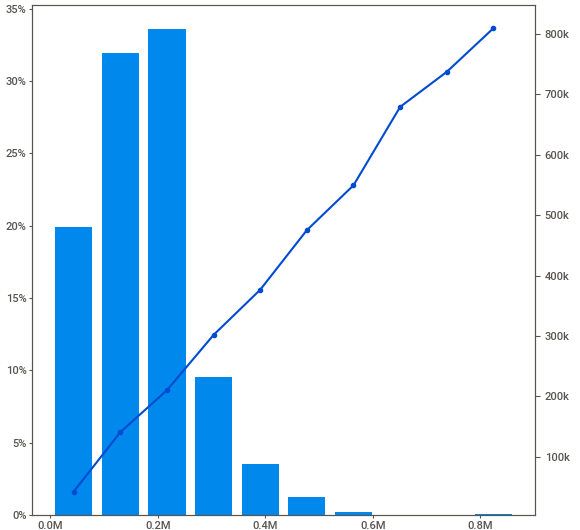
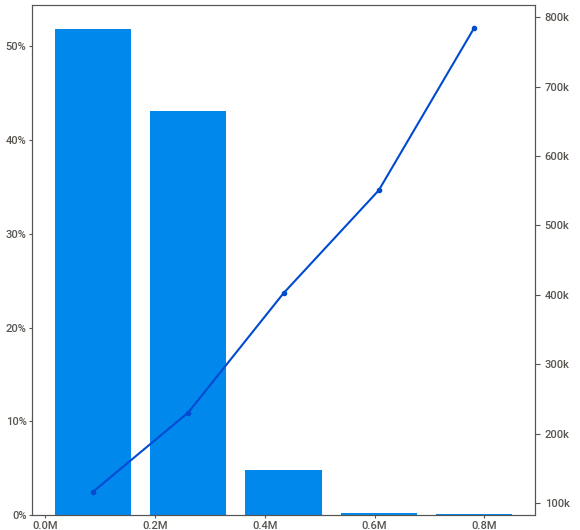
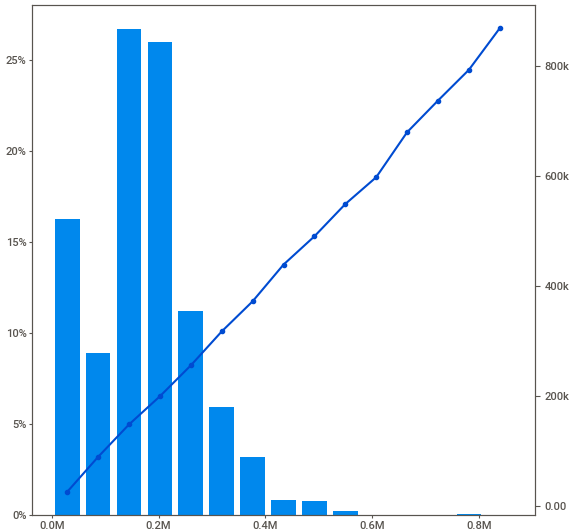
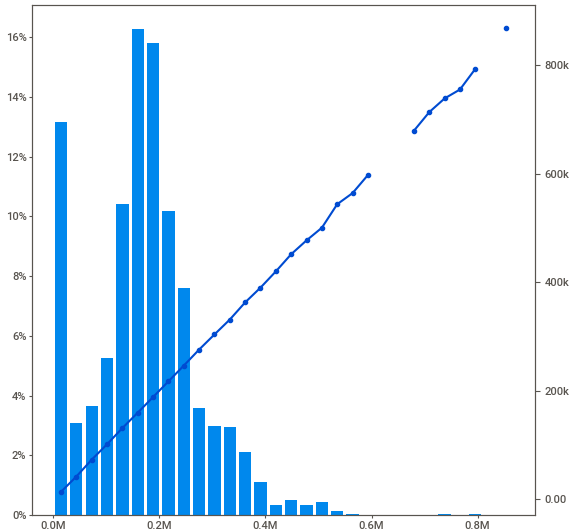
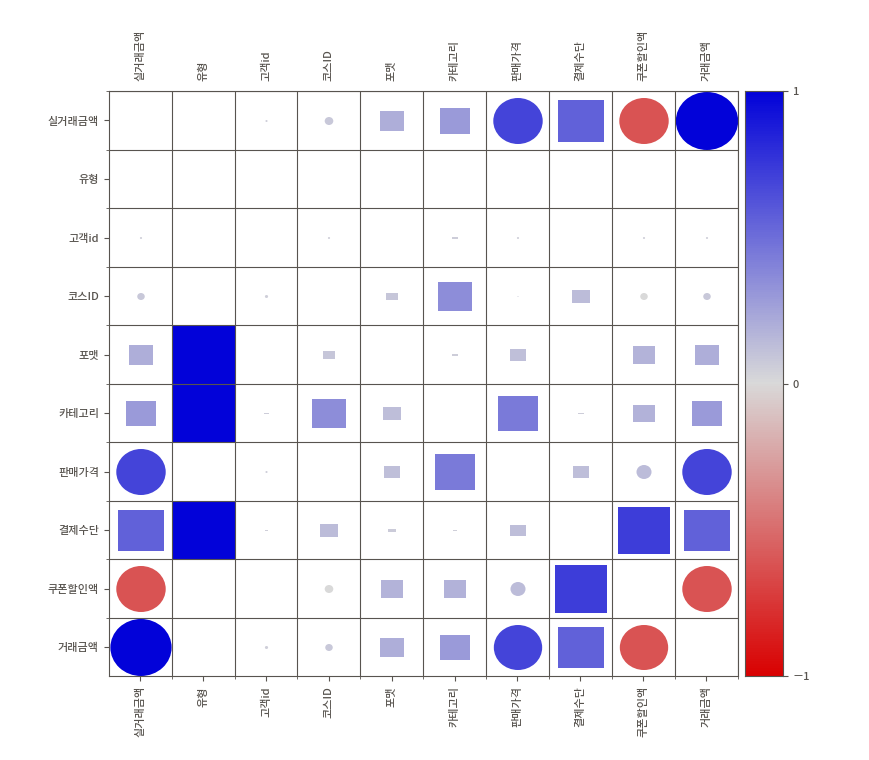
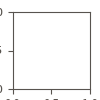

In [ ]:
report = sv.analyze(new_df, target_feat='실거래금액')
#display the report
report.show_notebook(layout="vertical", w=850, h=700, scale=0.8)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st


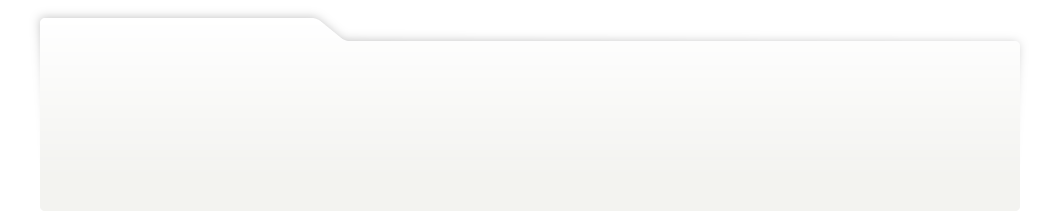
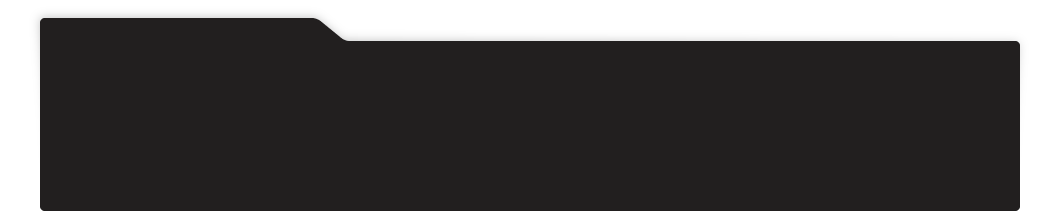
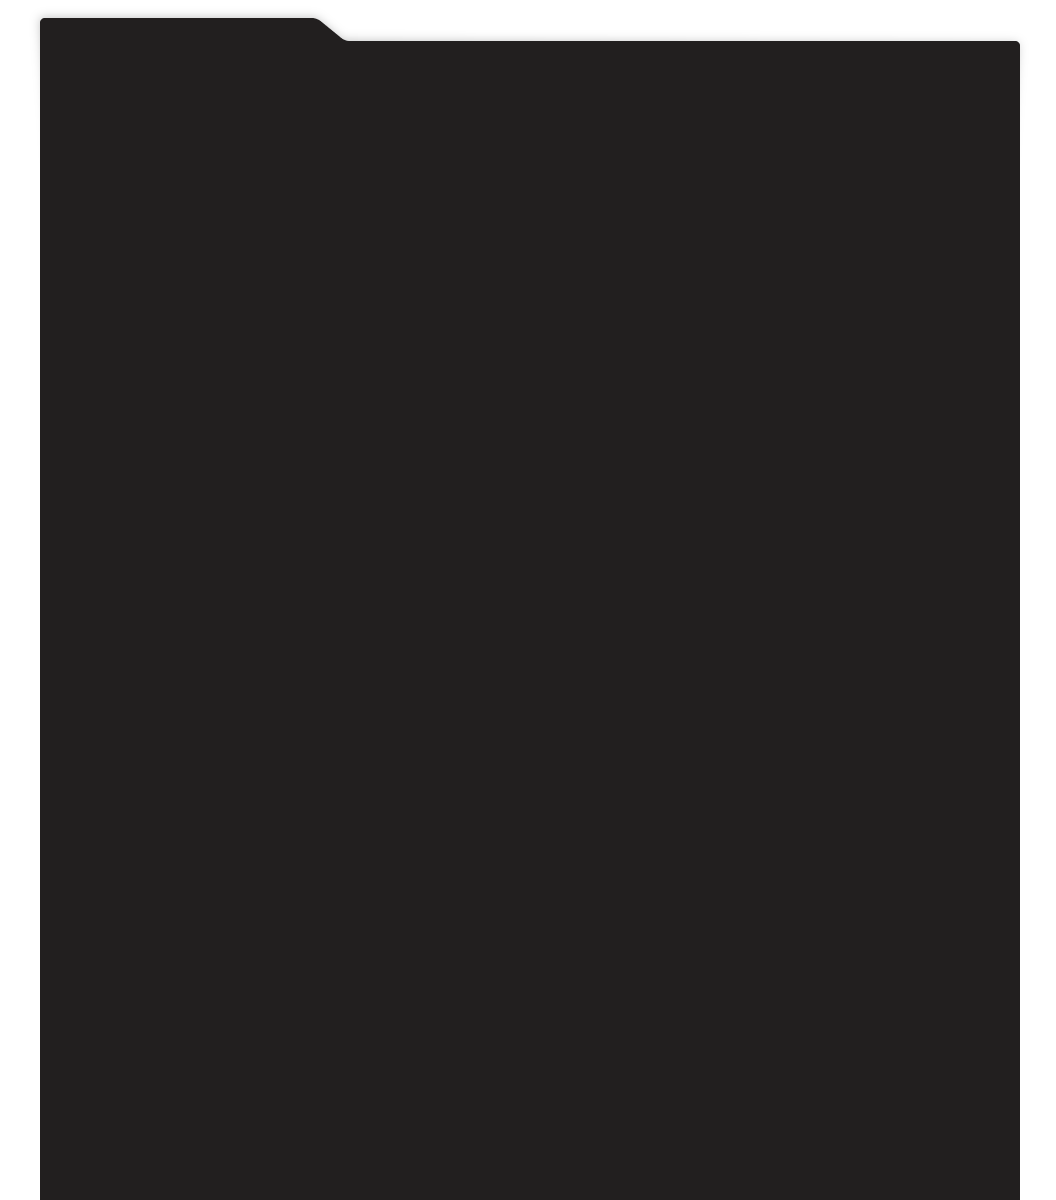
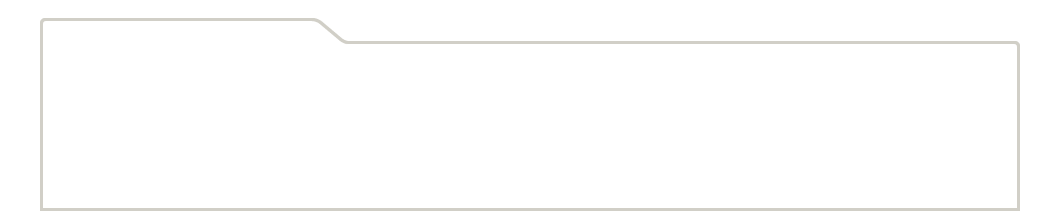
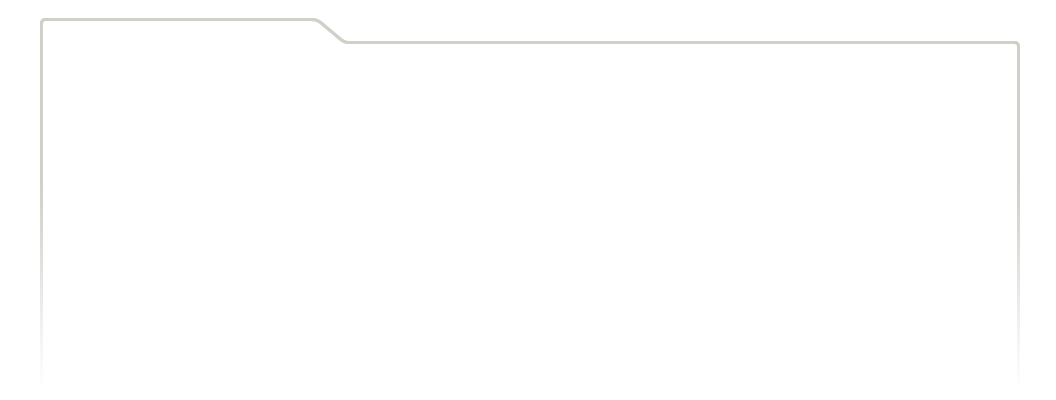
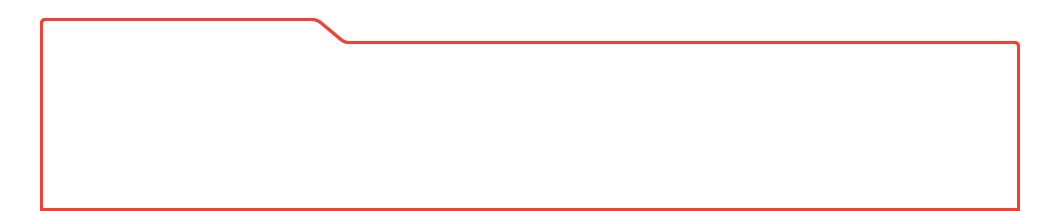
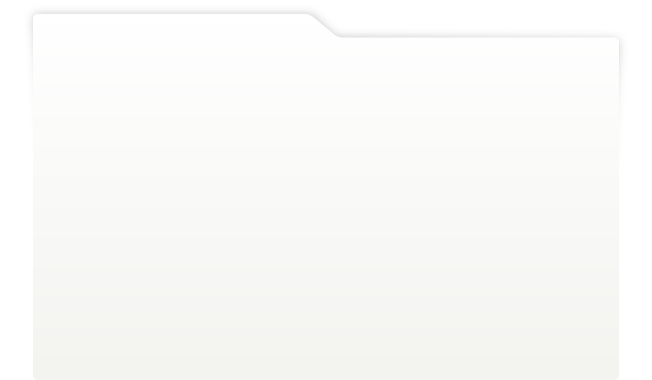
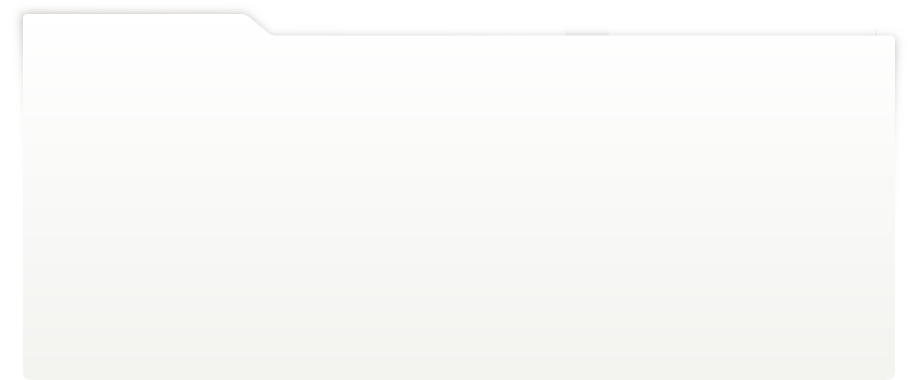
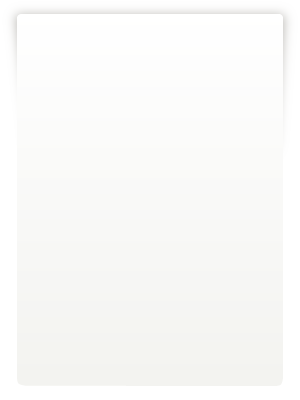
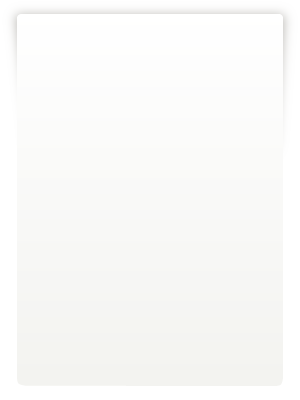
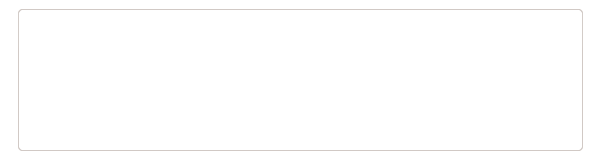
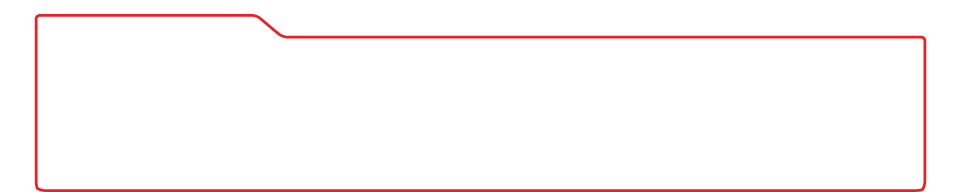
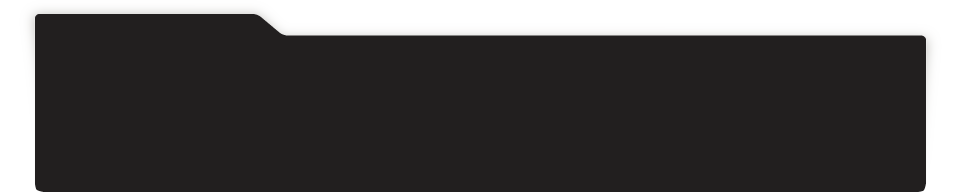
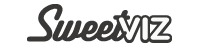
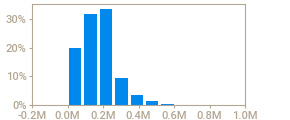
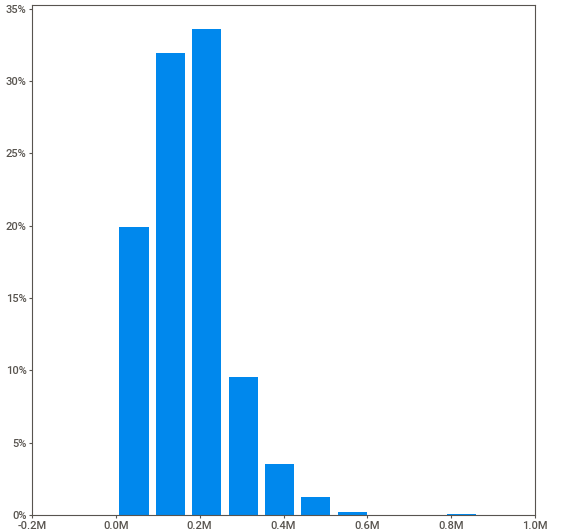
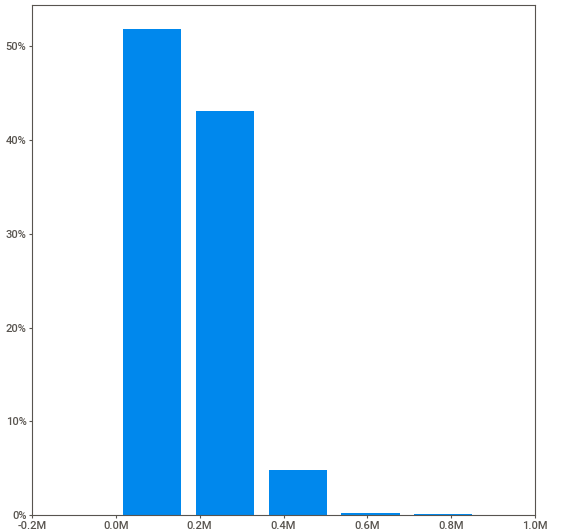
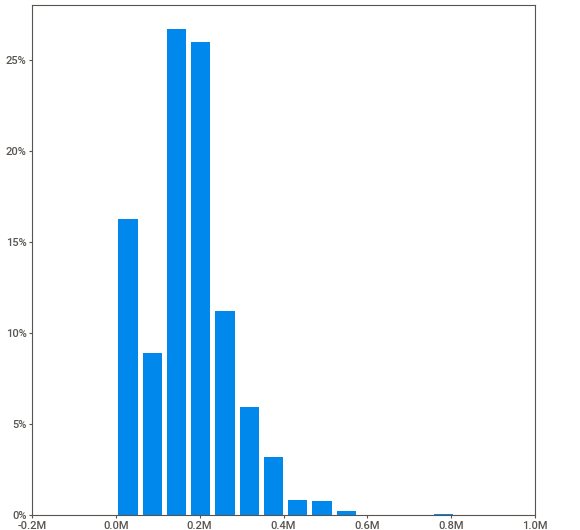
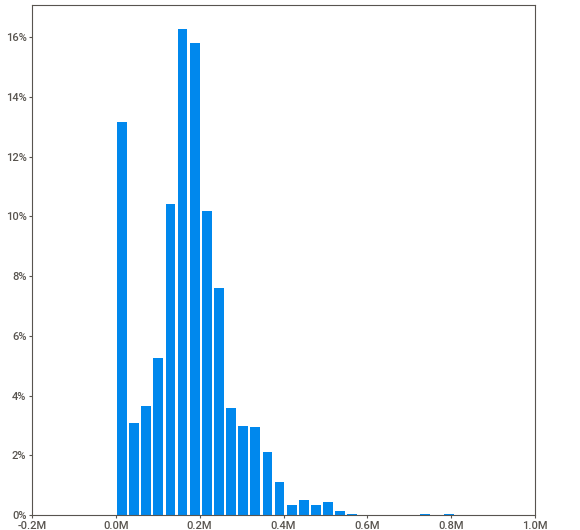
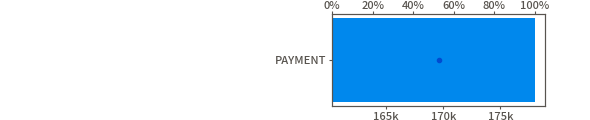
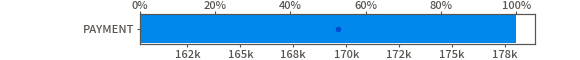
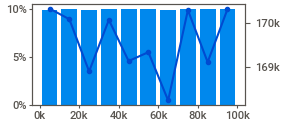
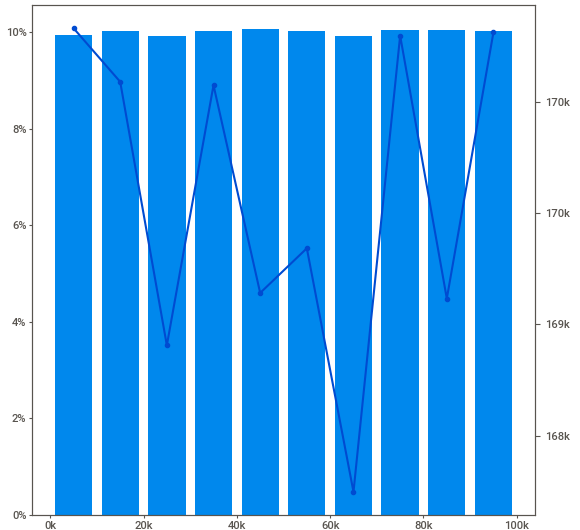
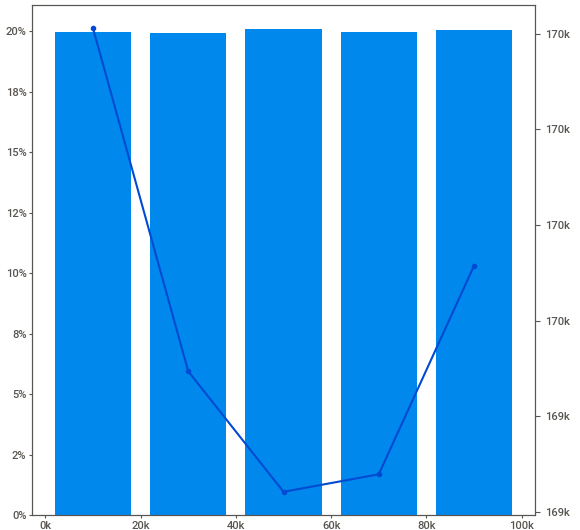
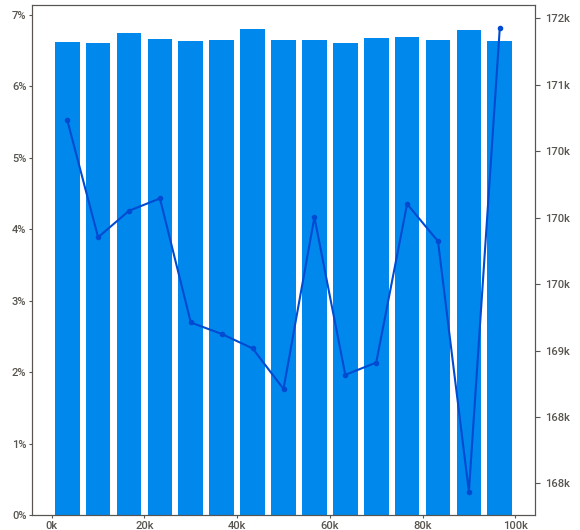
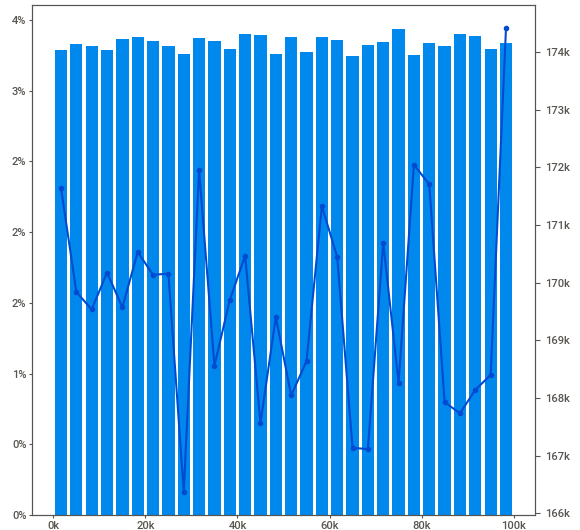
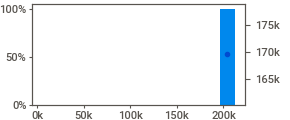
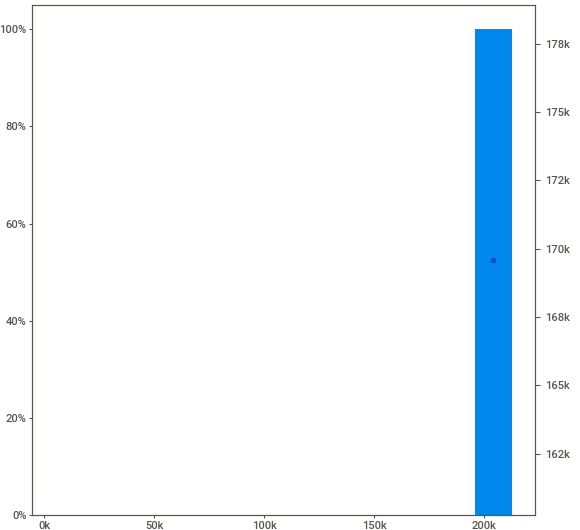
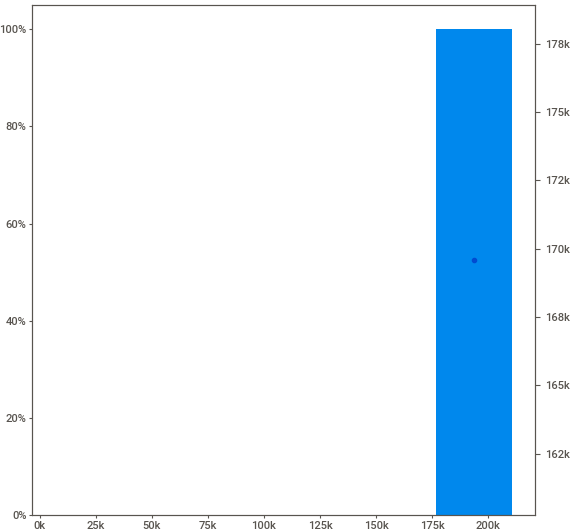
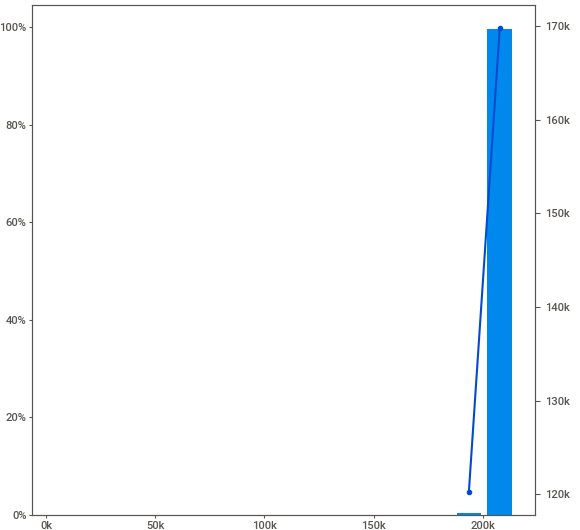
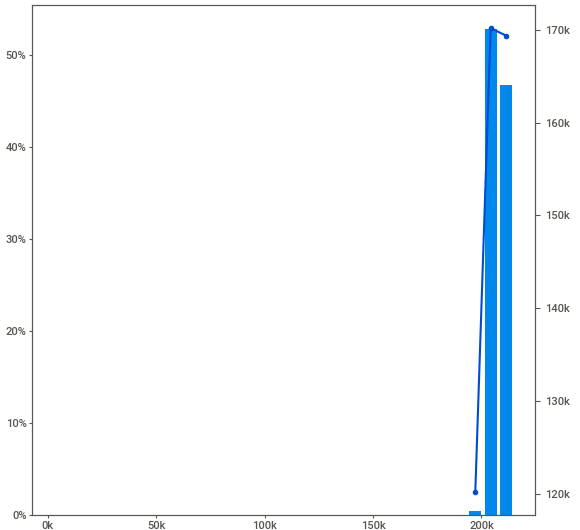
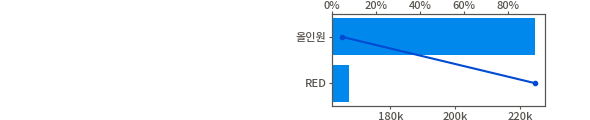
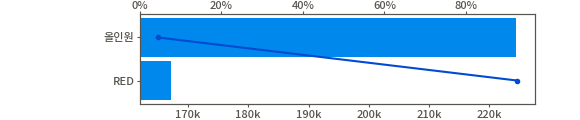
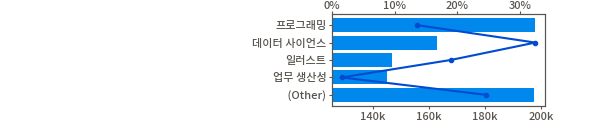
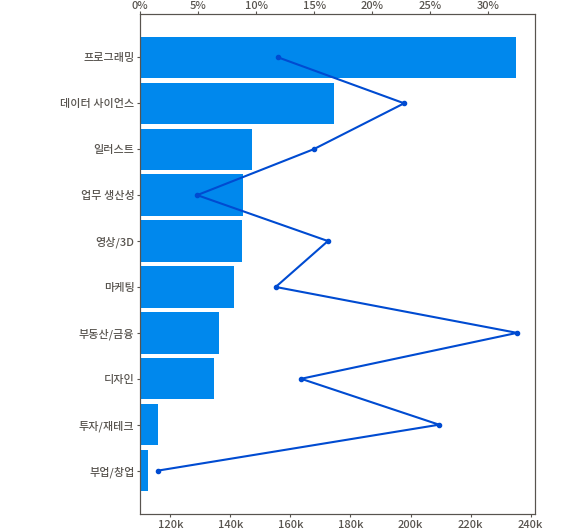
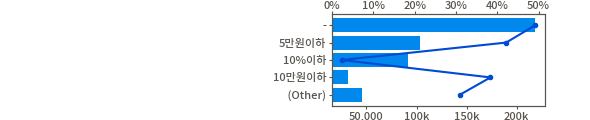
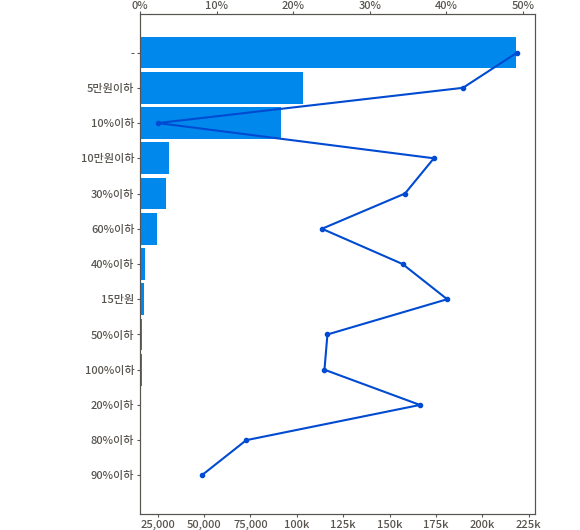
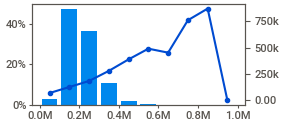
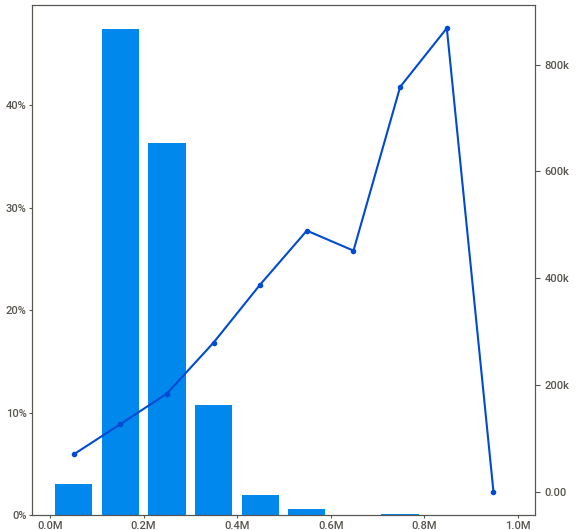
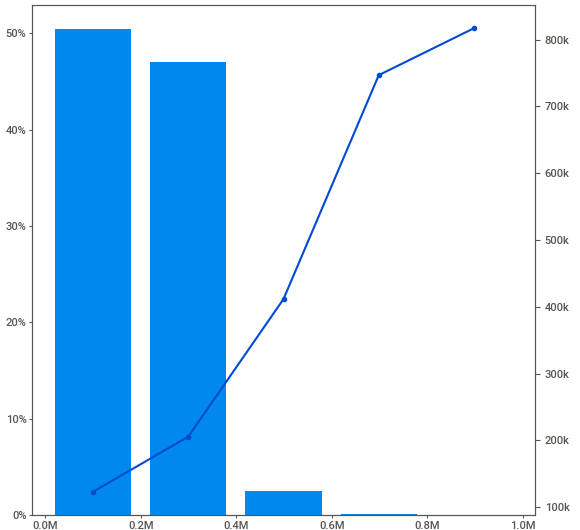
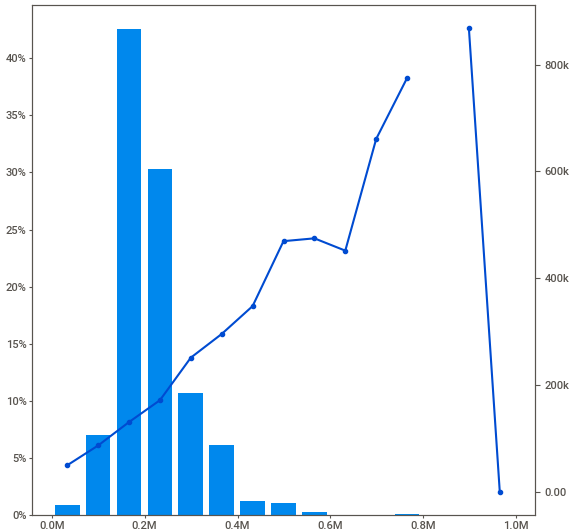
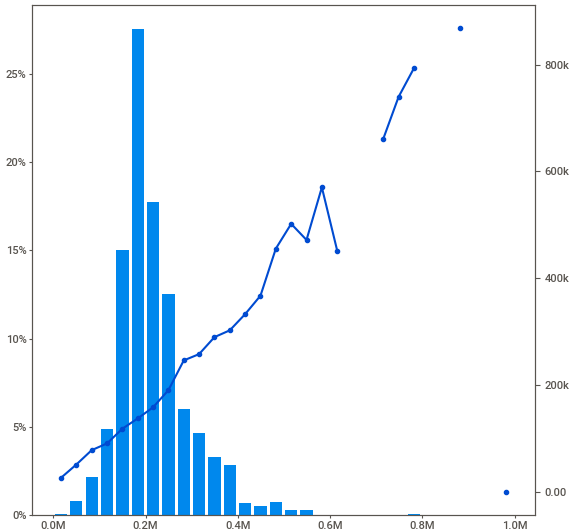
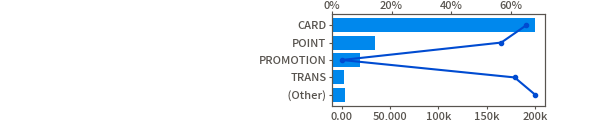
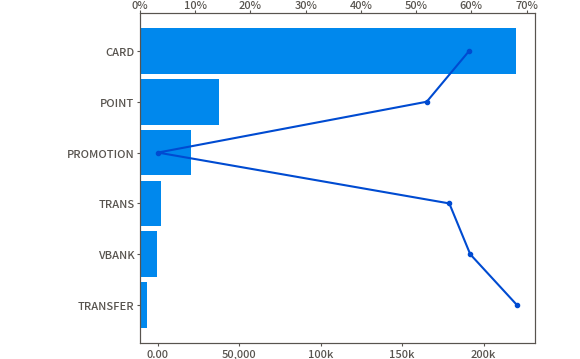
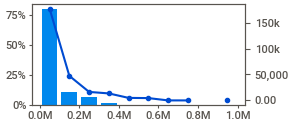
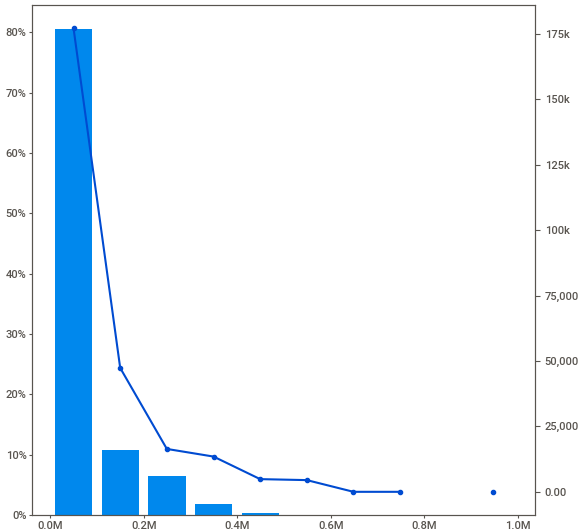
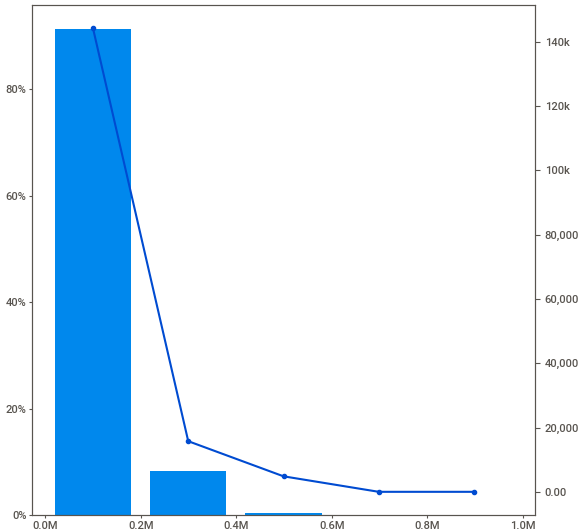
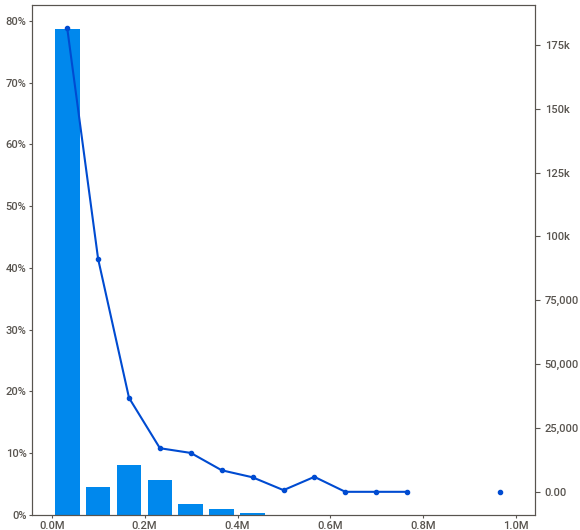
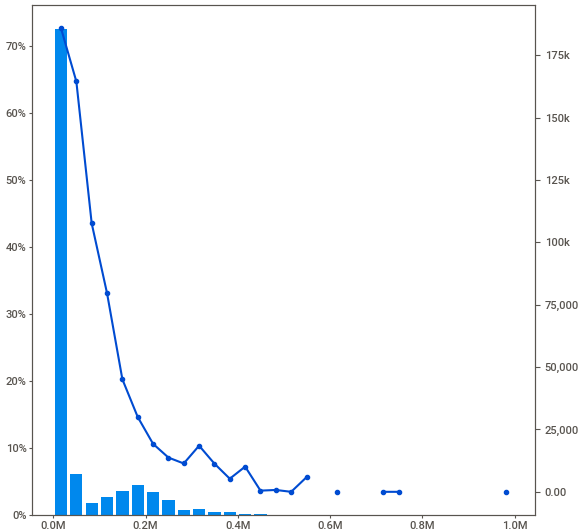
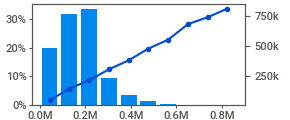
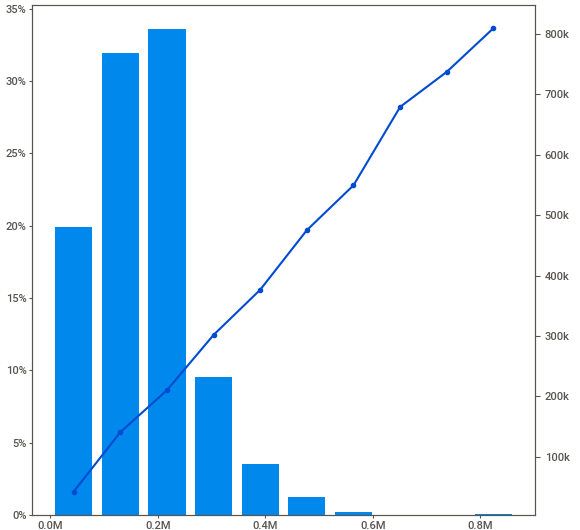
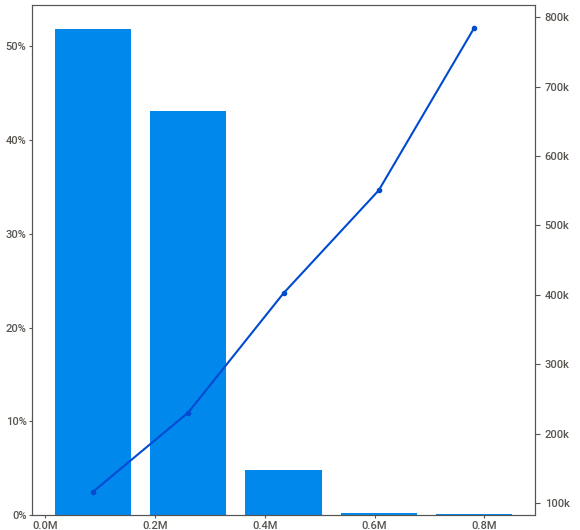
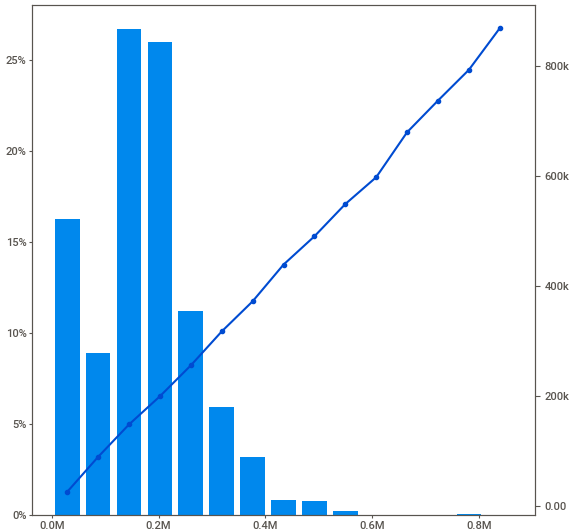
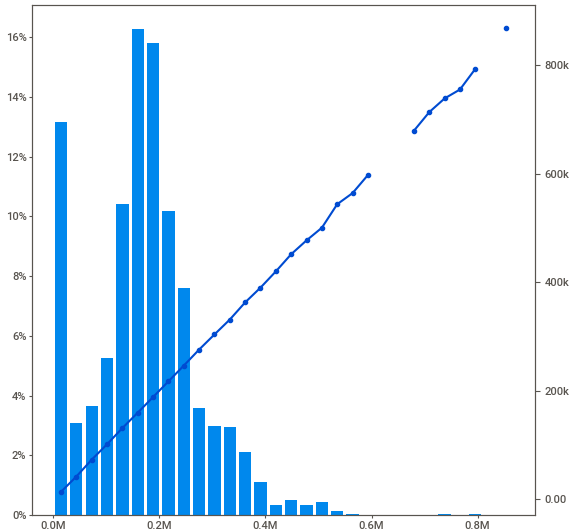
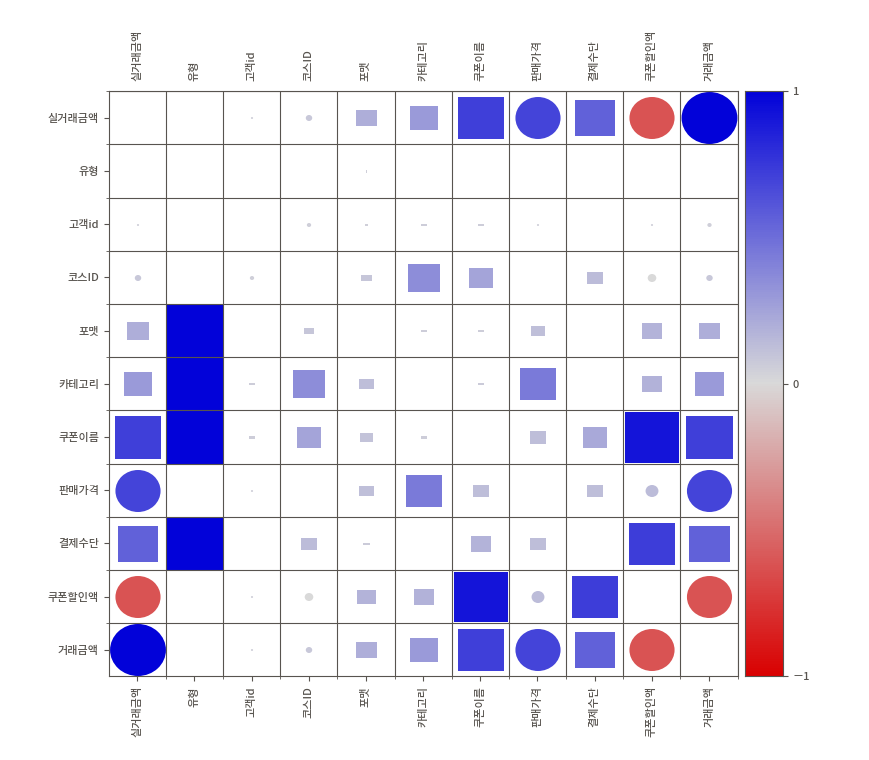
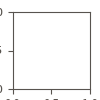

In [ ]:
report = sv.analyze(modified_df1, target_feat='실거래금액')
#display the report
report.show_notebook(layout="vertical", w=850, h=700, scale=0.8)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st


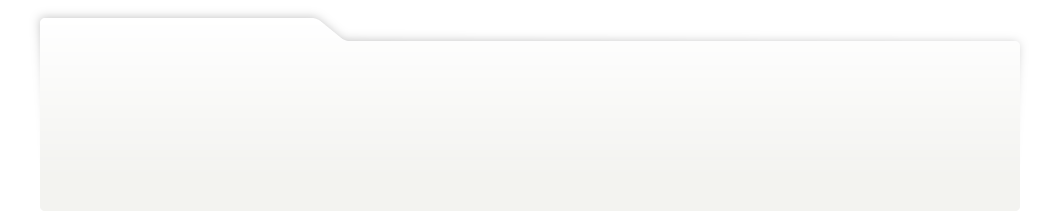
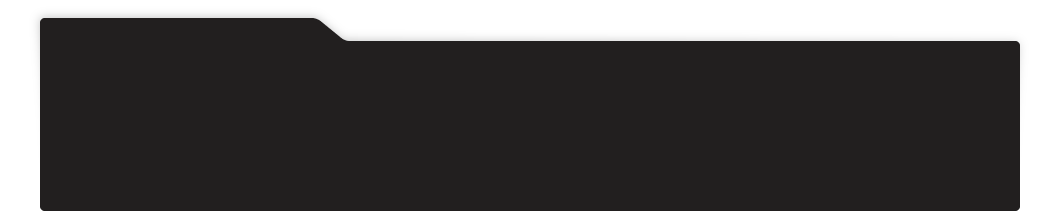
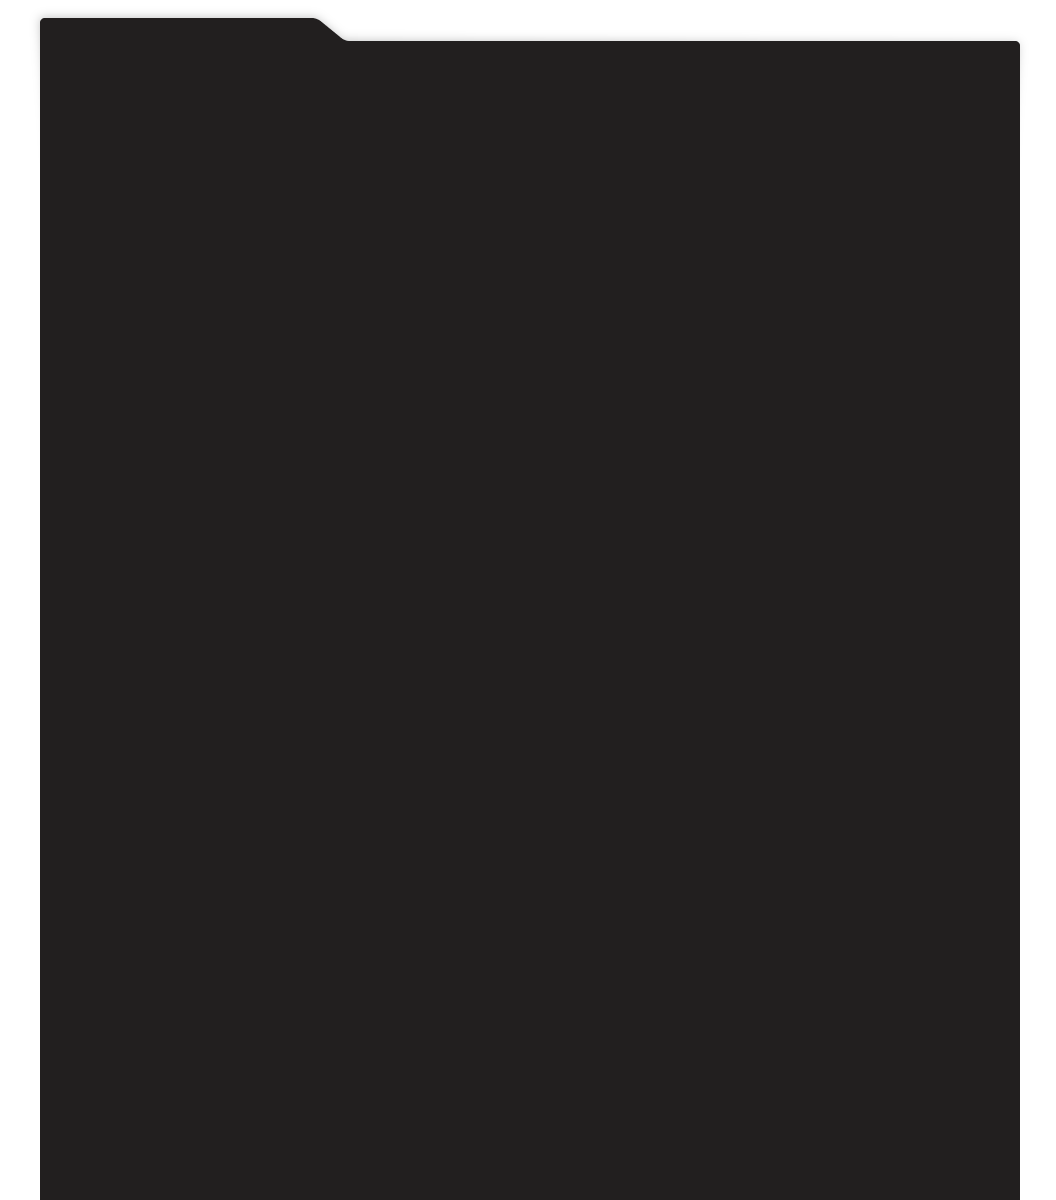
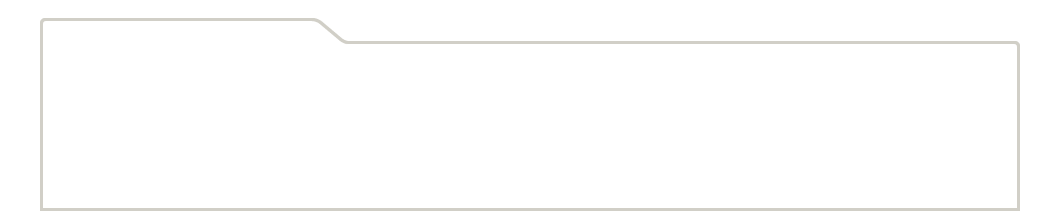
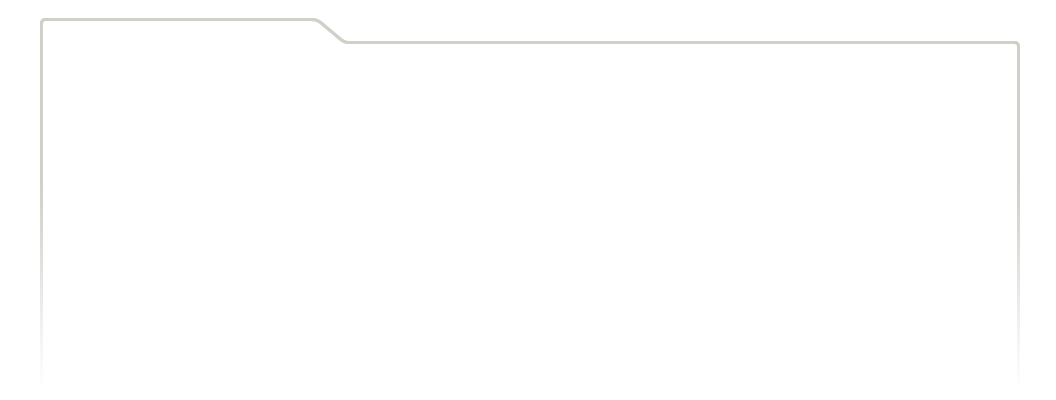
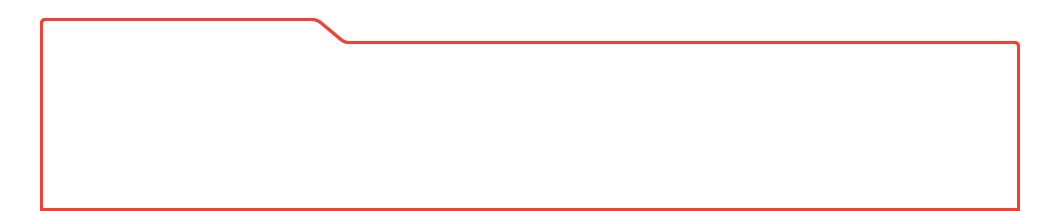
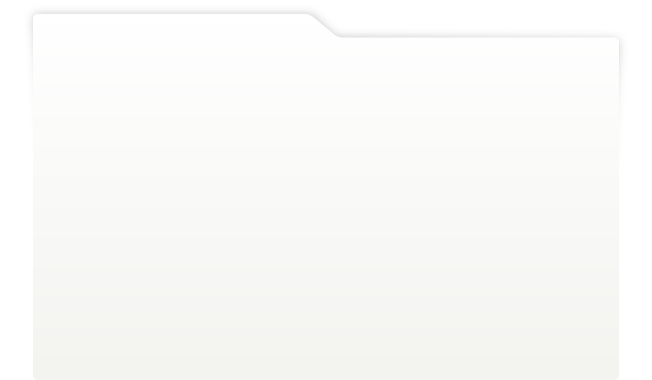
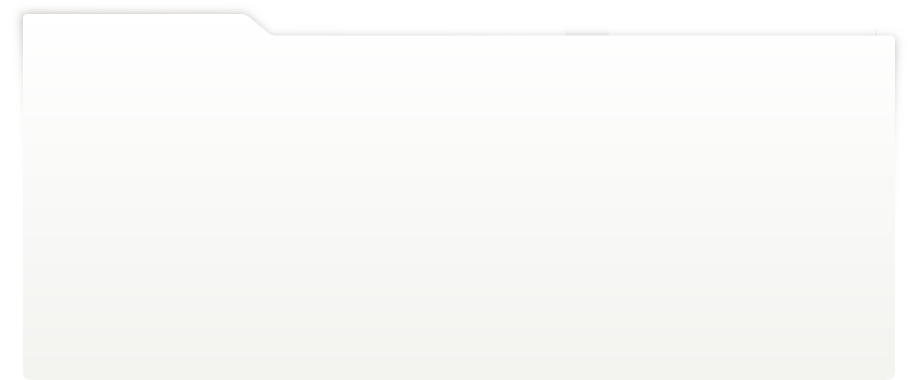
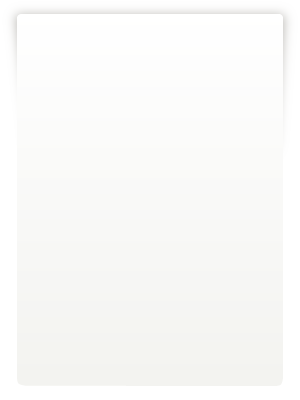
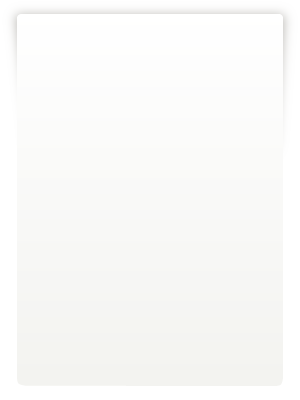
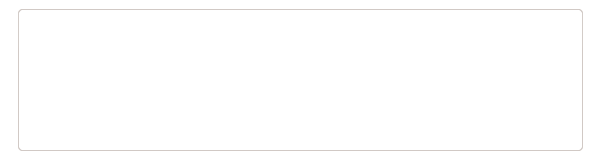
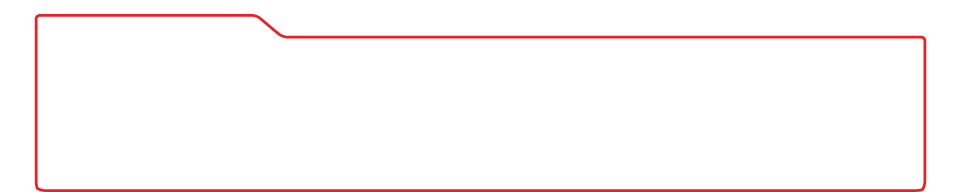
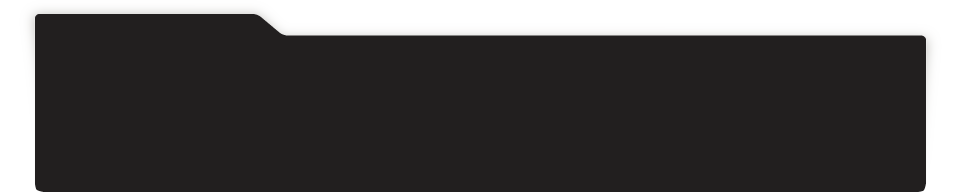
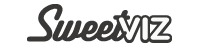
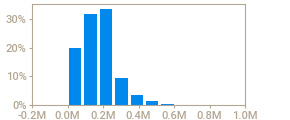
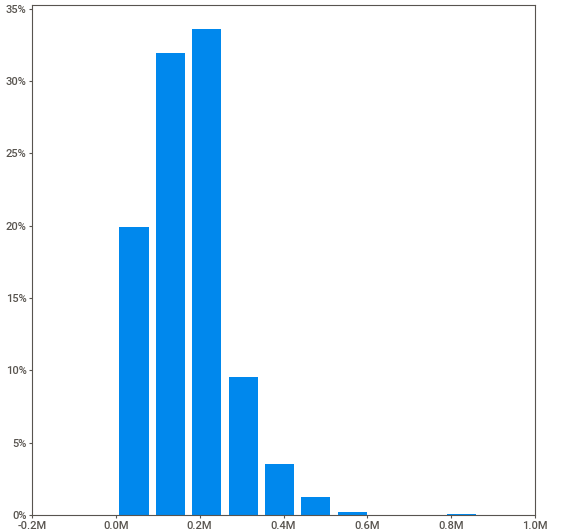
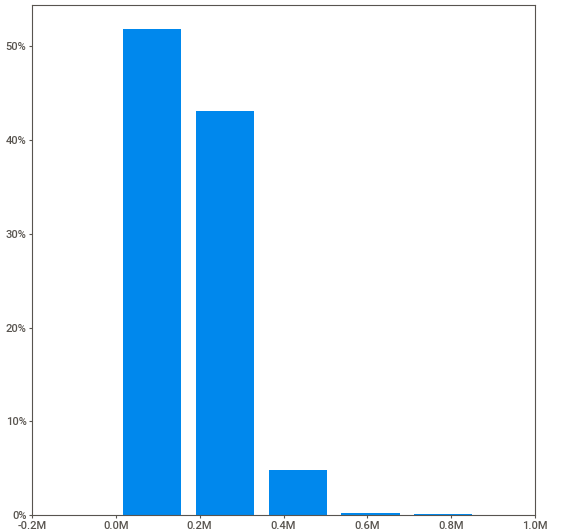
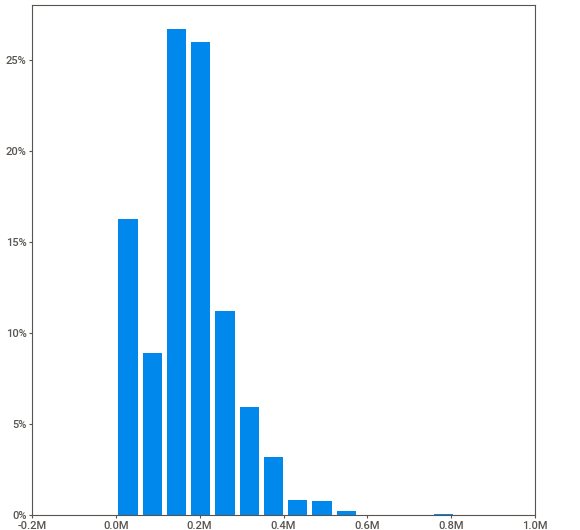
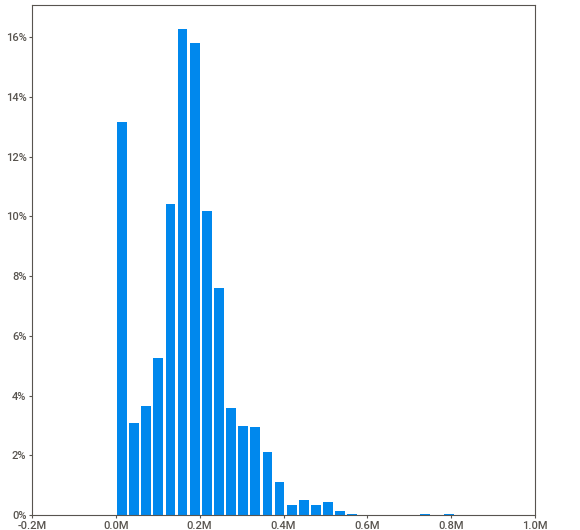
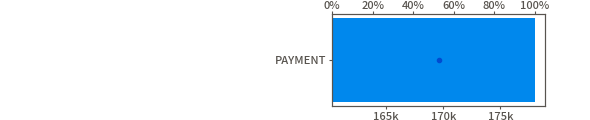
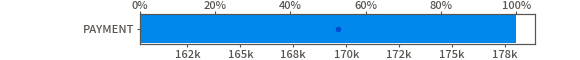
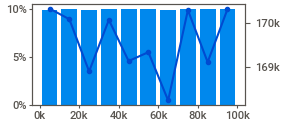
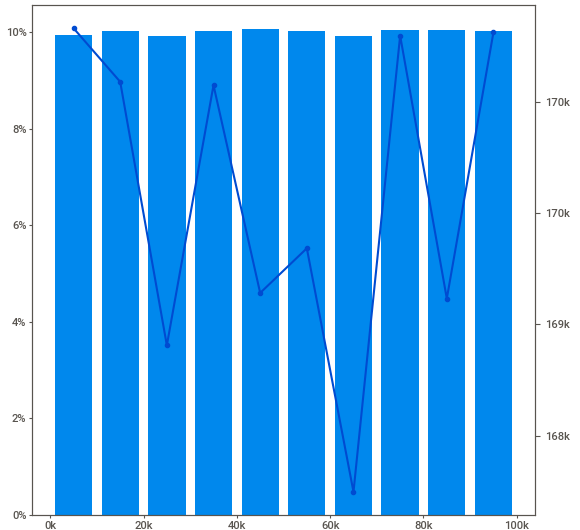
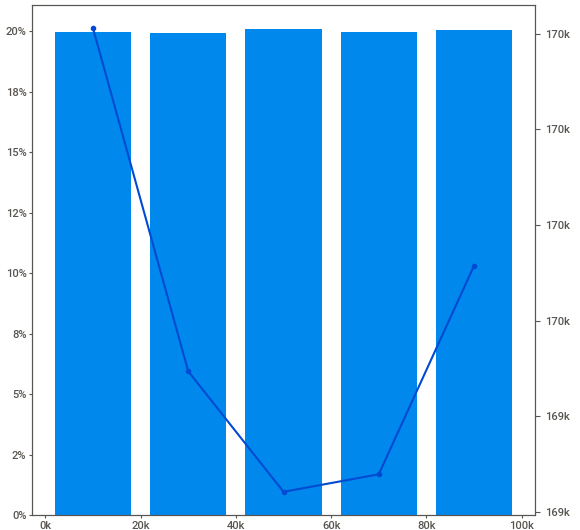
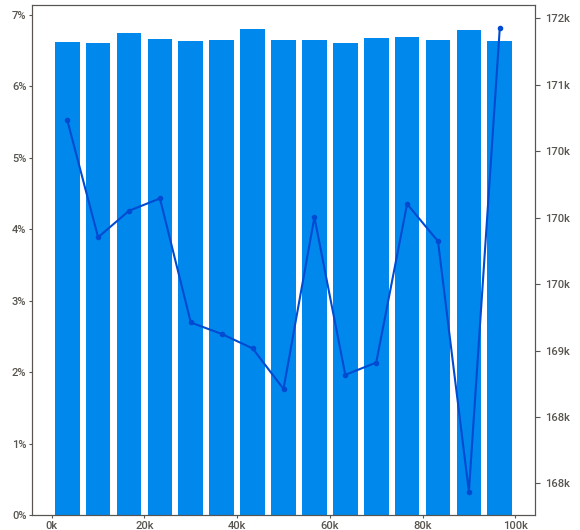
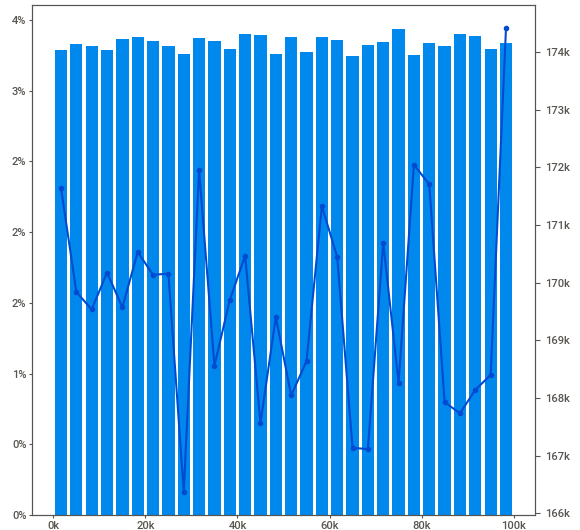
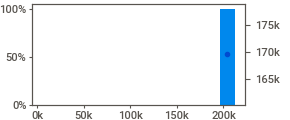
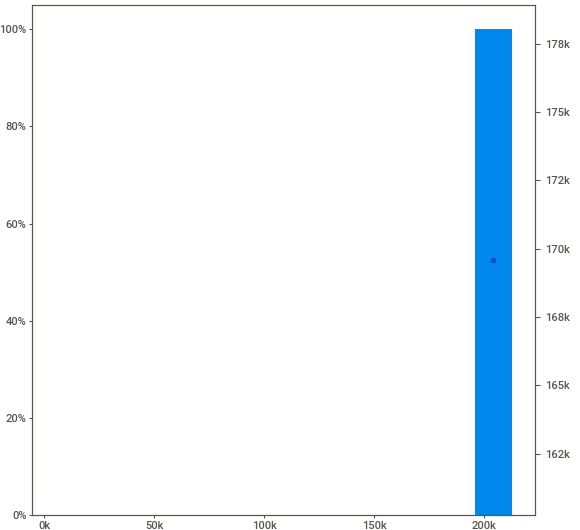
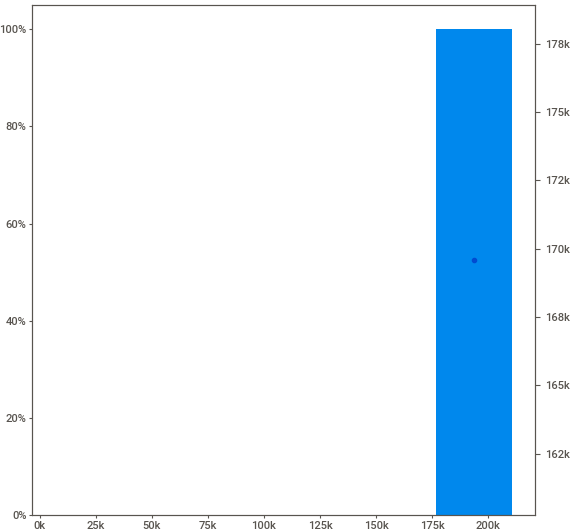
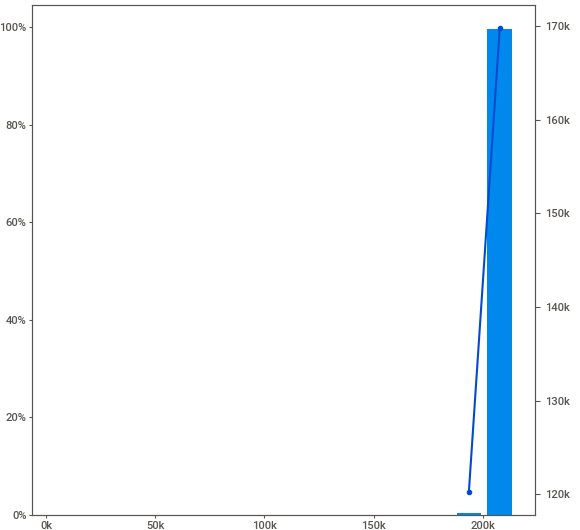
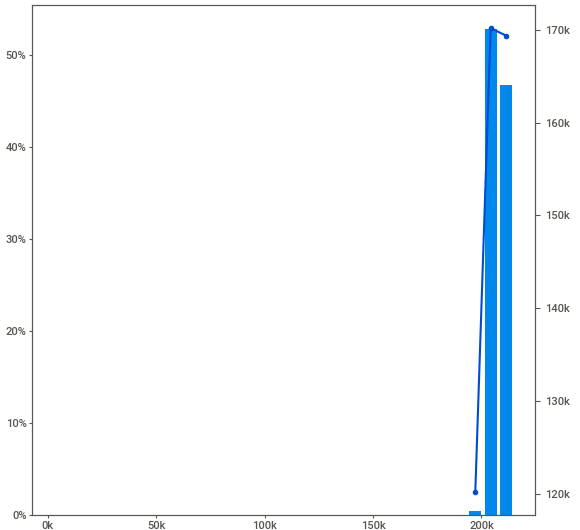
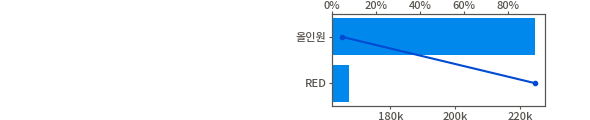
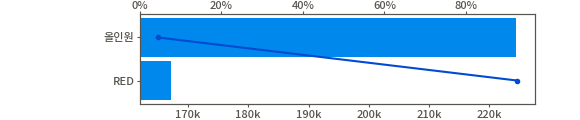
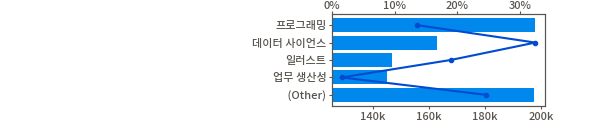
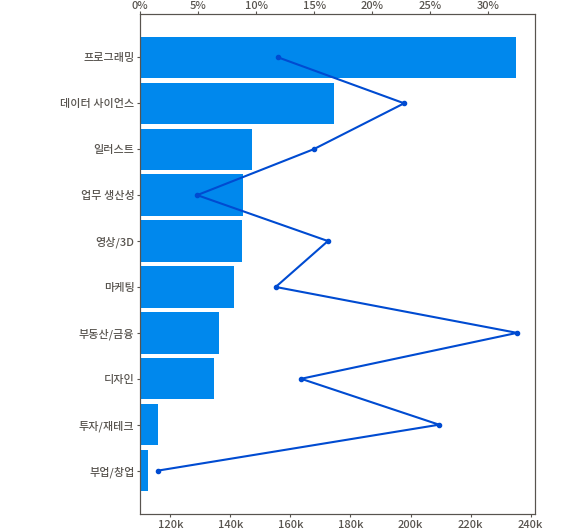
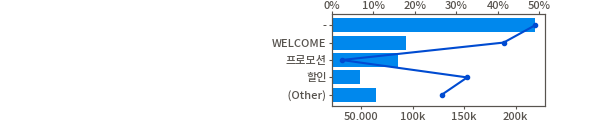
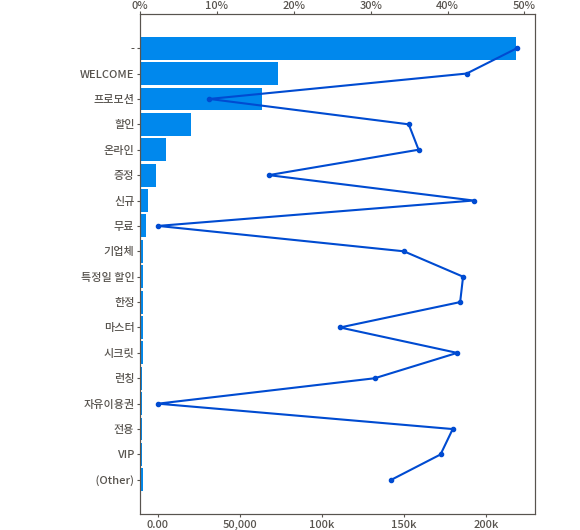
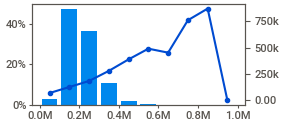
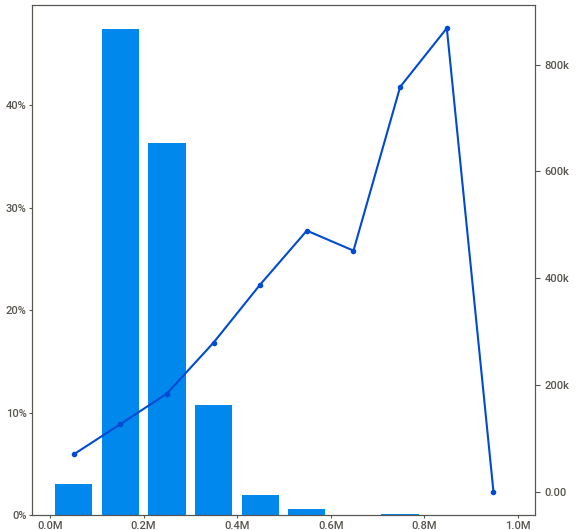
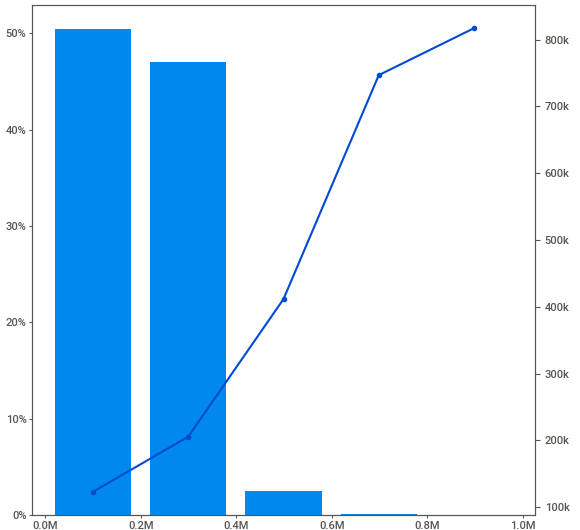
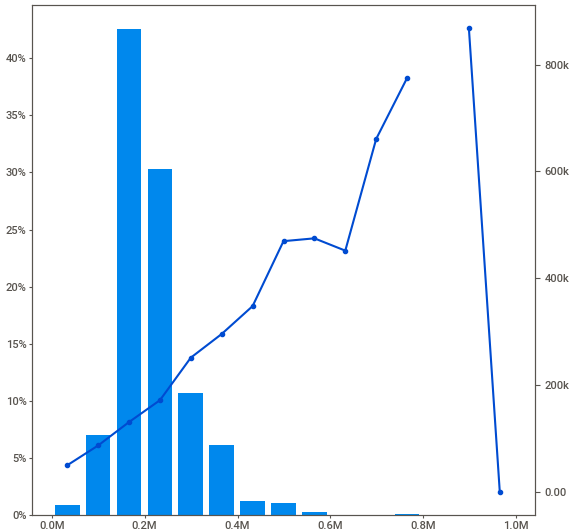
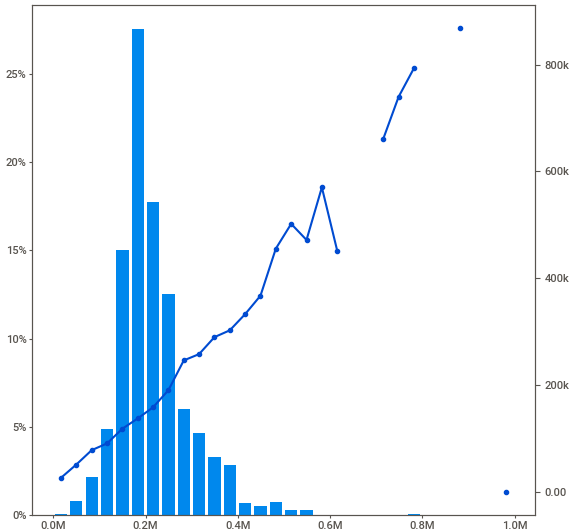
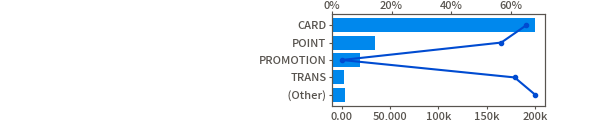
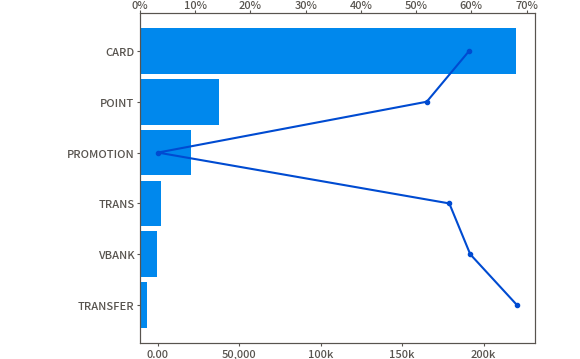
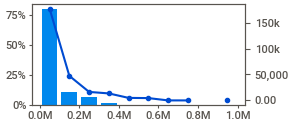
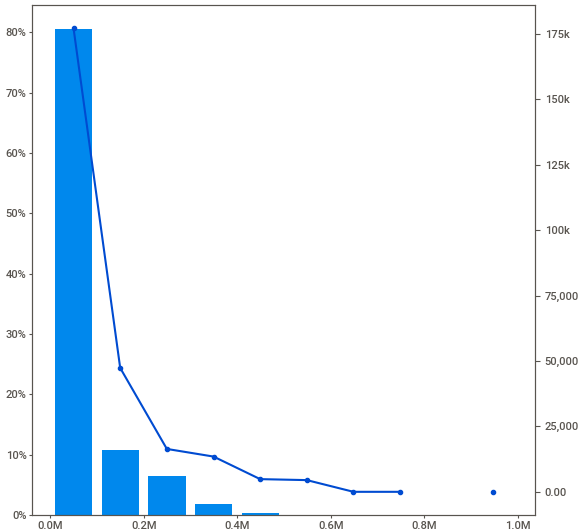
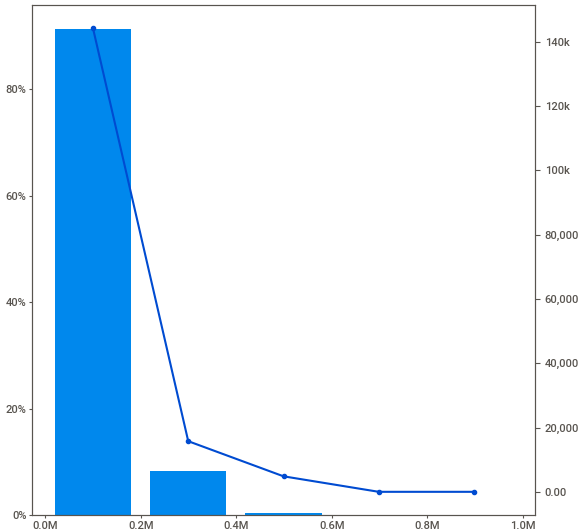
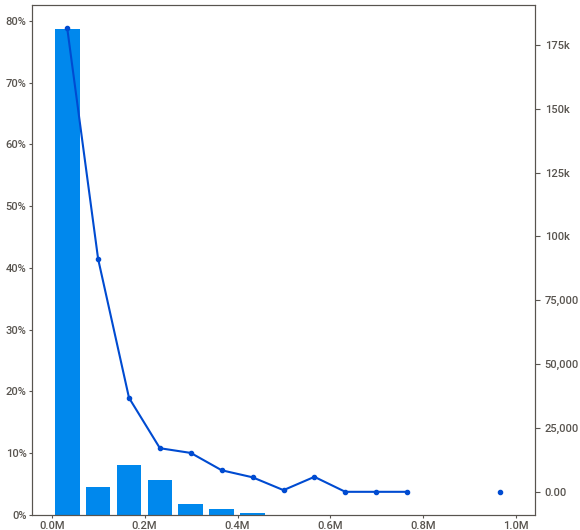
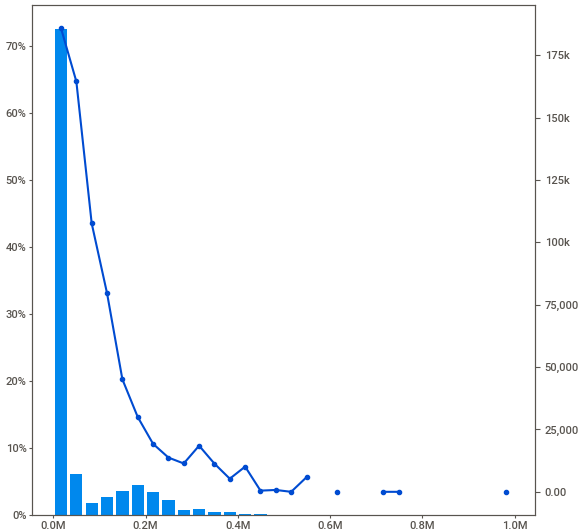
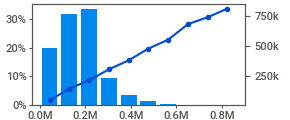
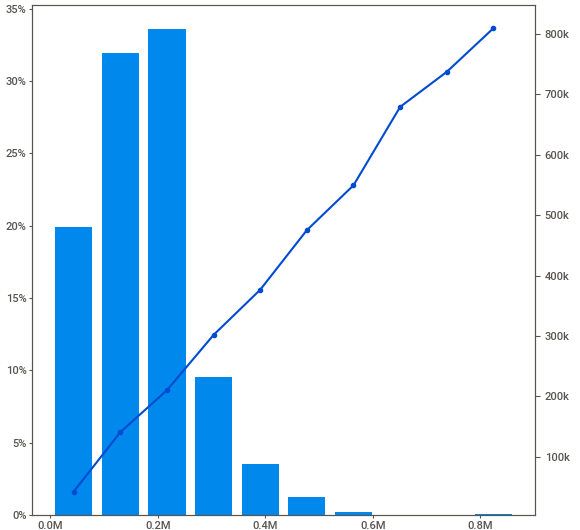
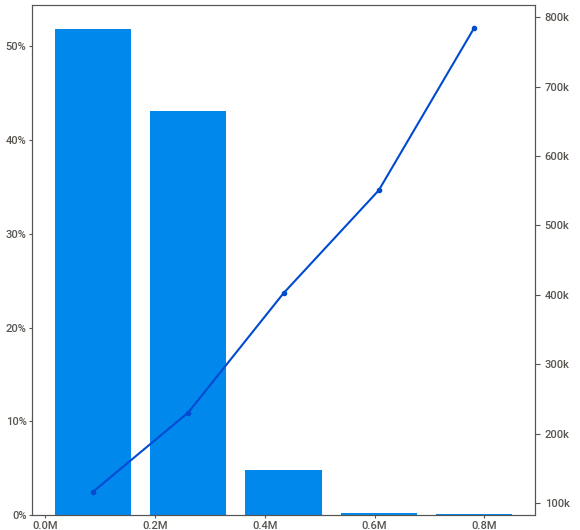
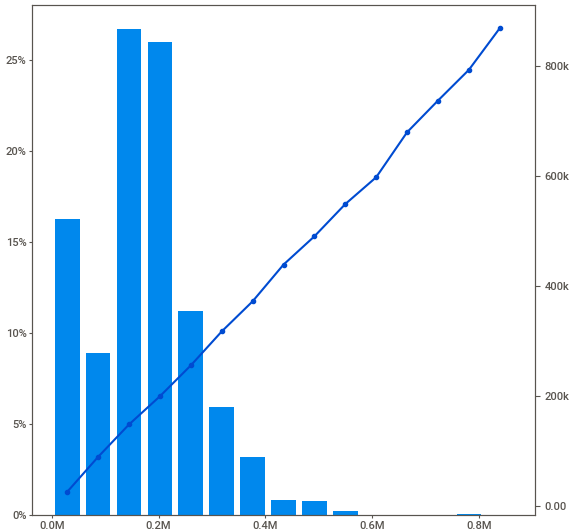
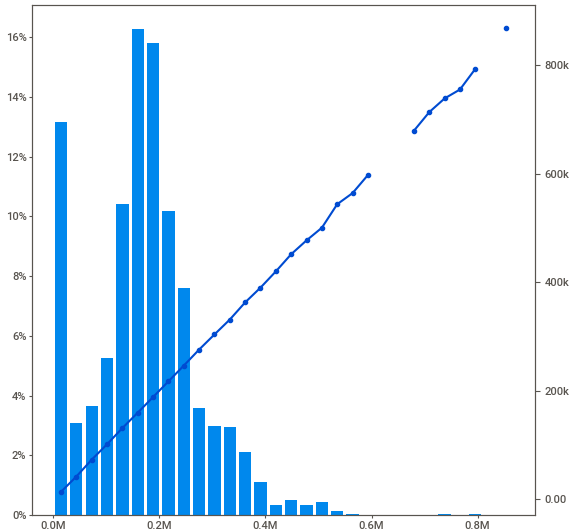
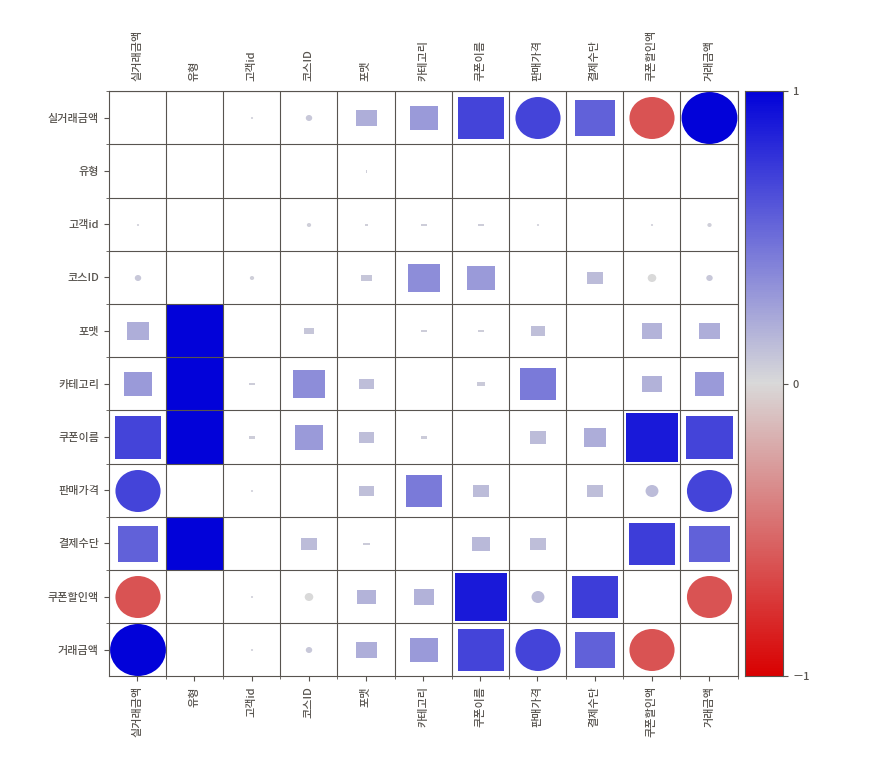
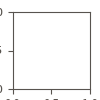

In [ ]:
report = sv.analyze(modified_df2, target_feat='실거래금액')
#display the report
report.show_notebook(layout="vertical", w=850, h=700, scale=0.8)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st


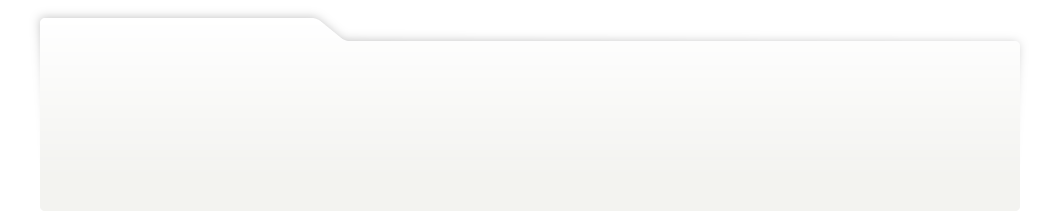
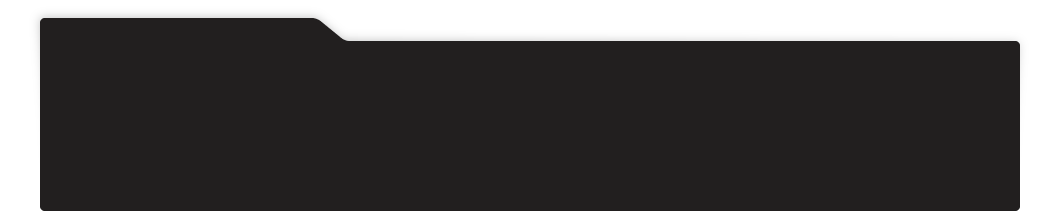
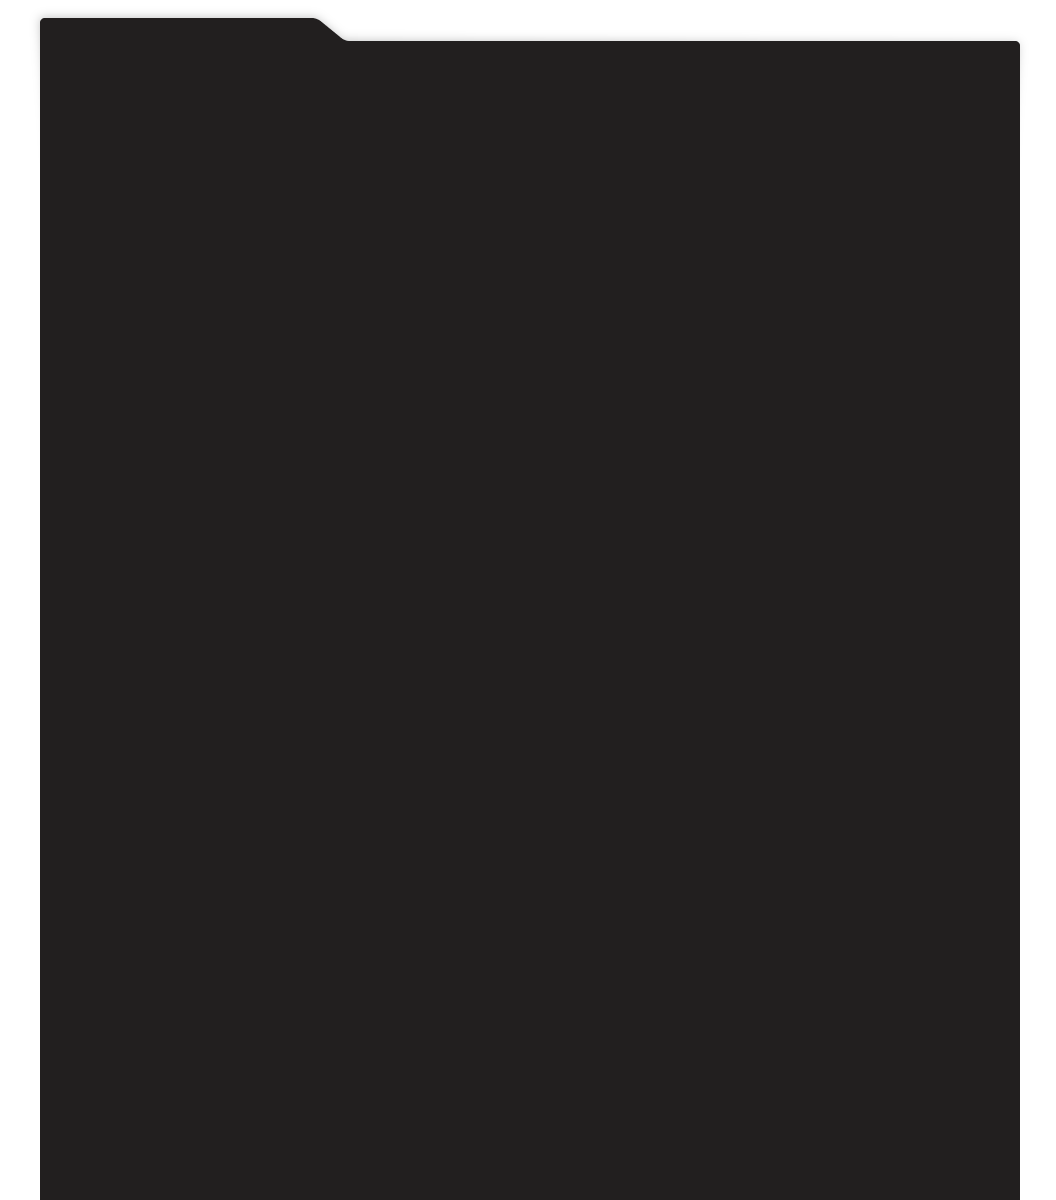
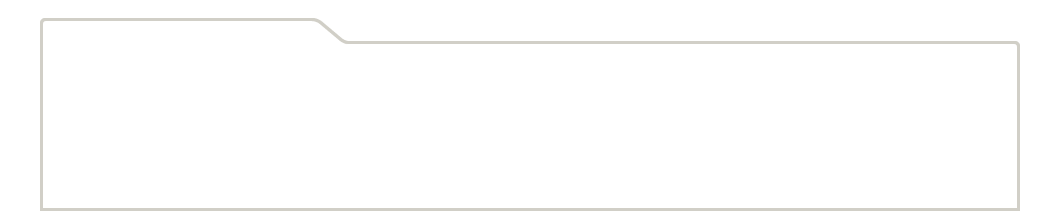
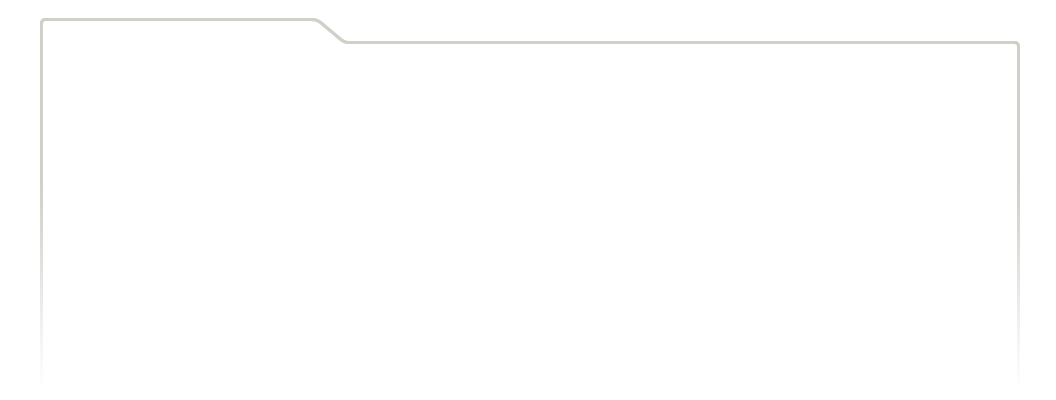
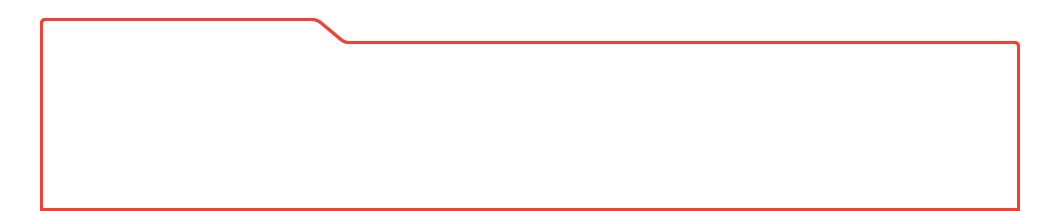
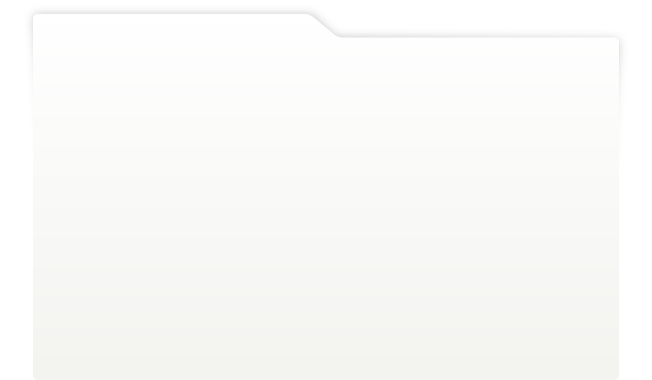
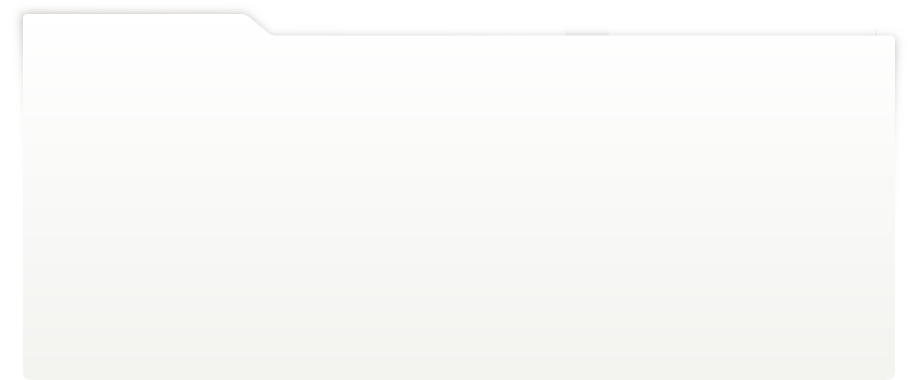
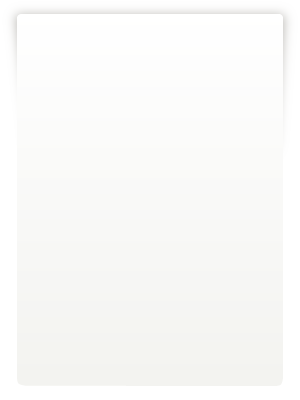
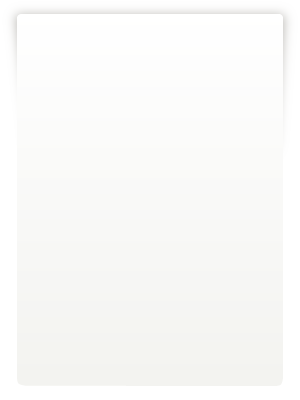
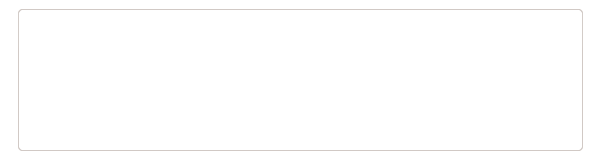
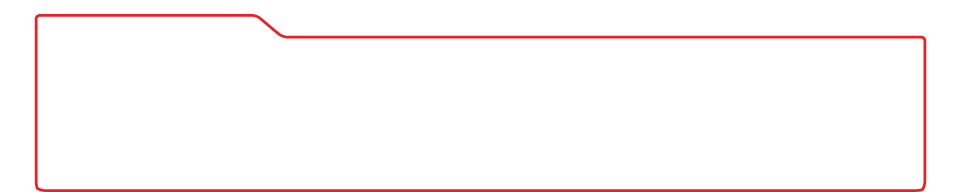
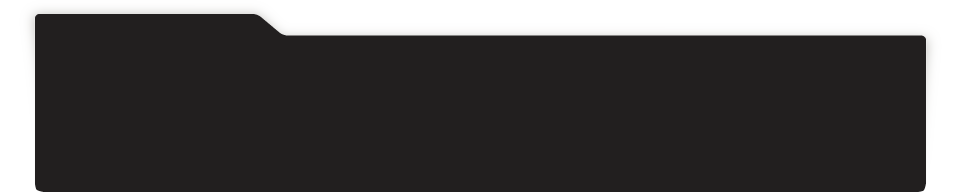
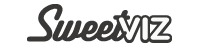
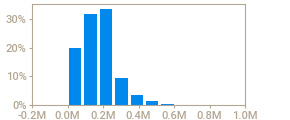
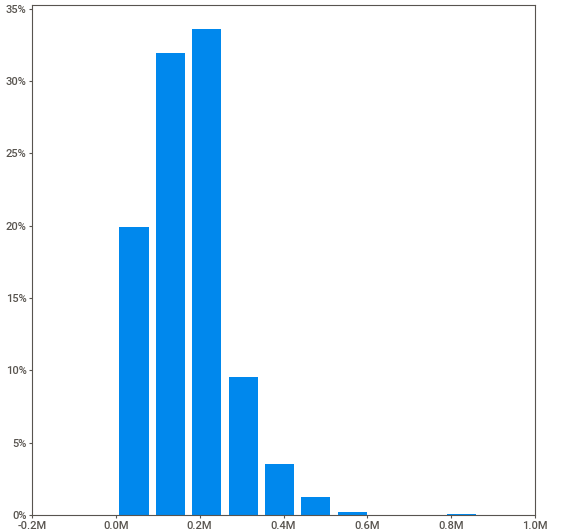
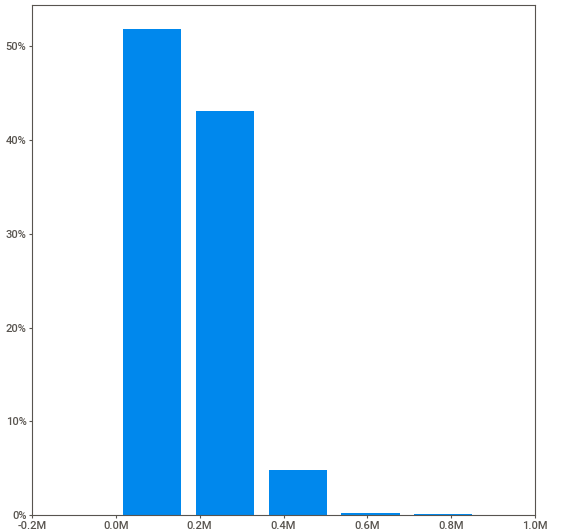
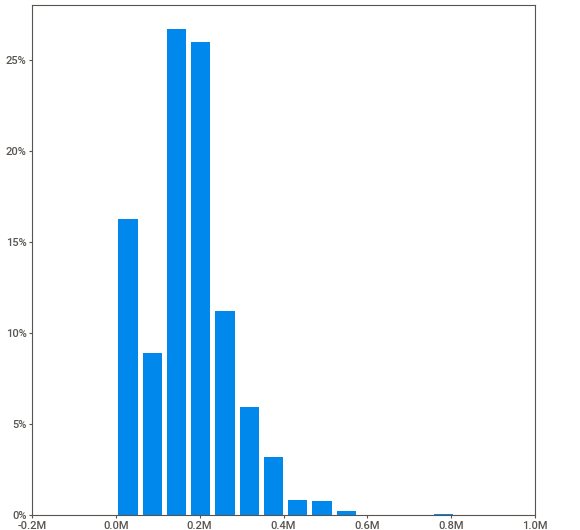
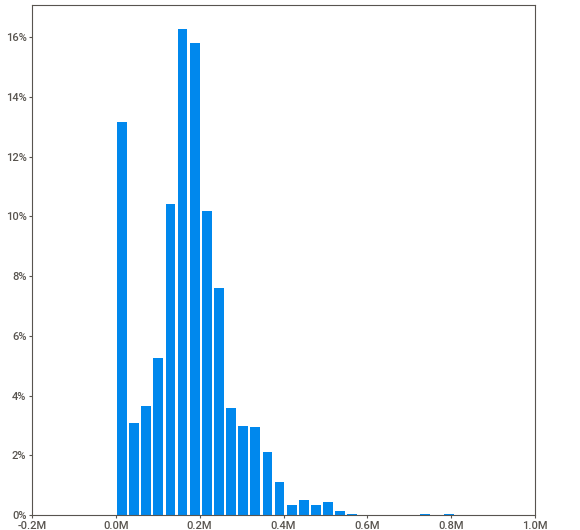
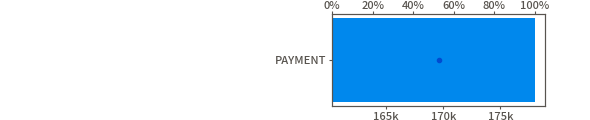
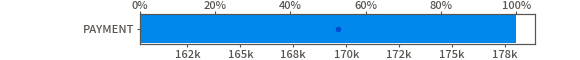
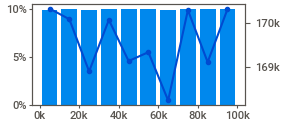
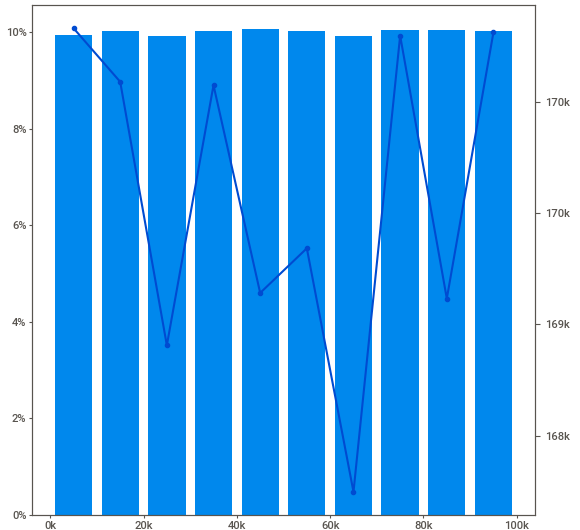
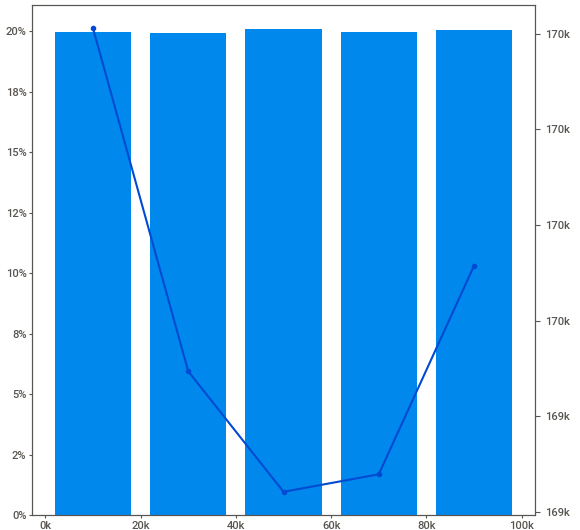
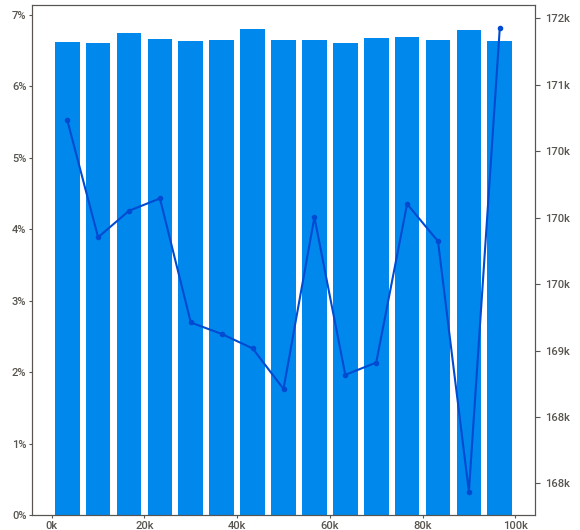
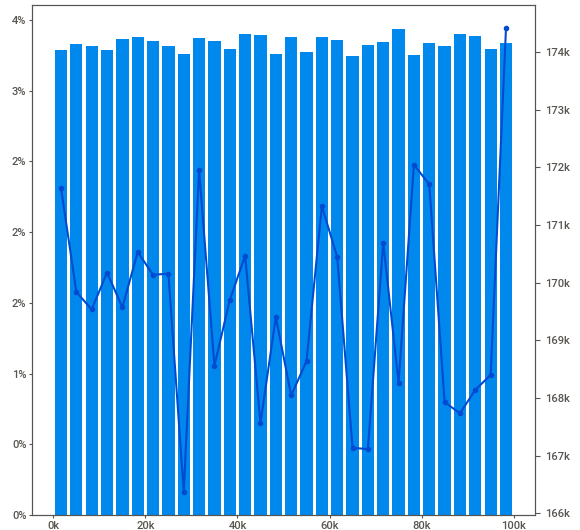
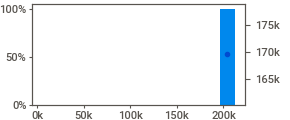
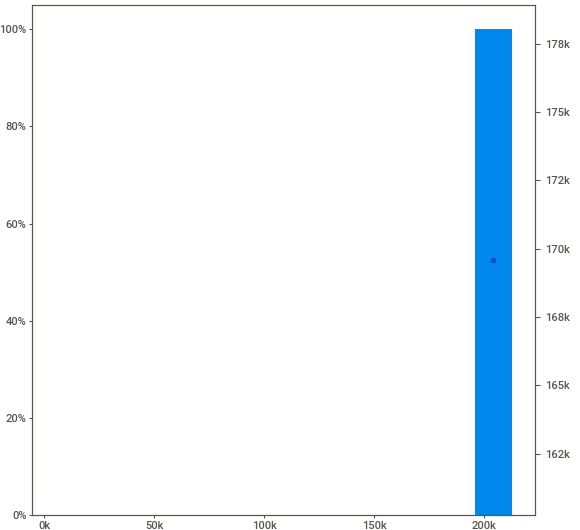
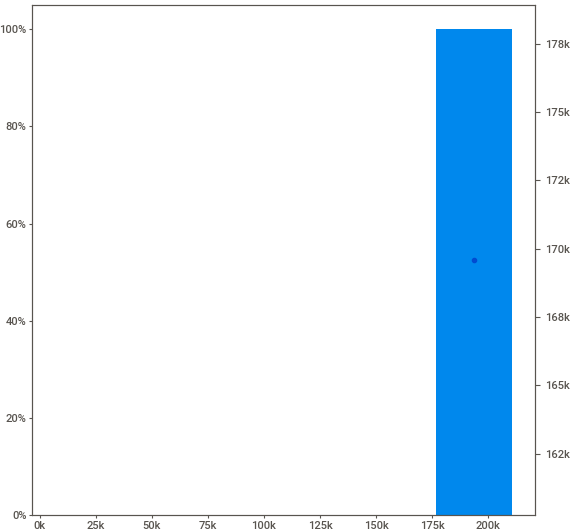
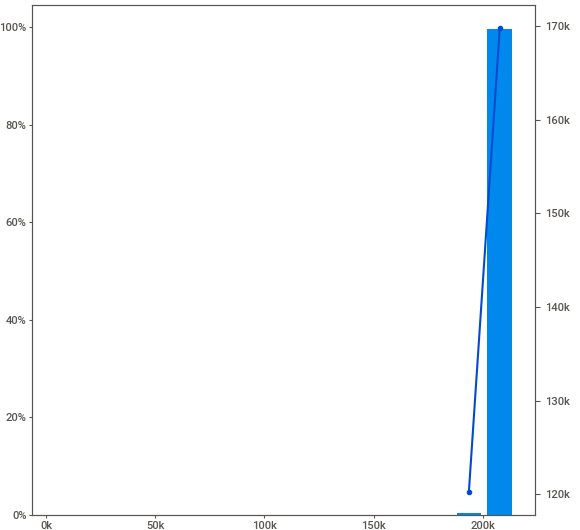
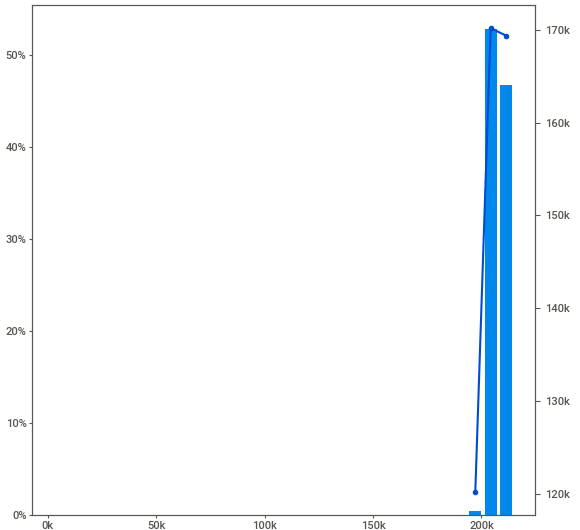
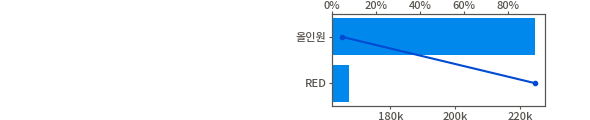
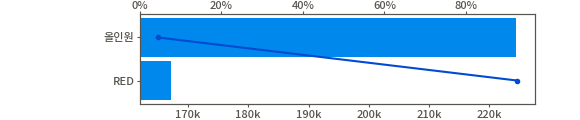
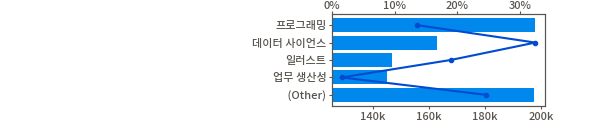
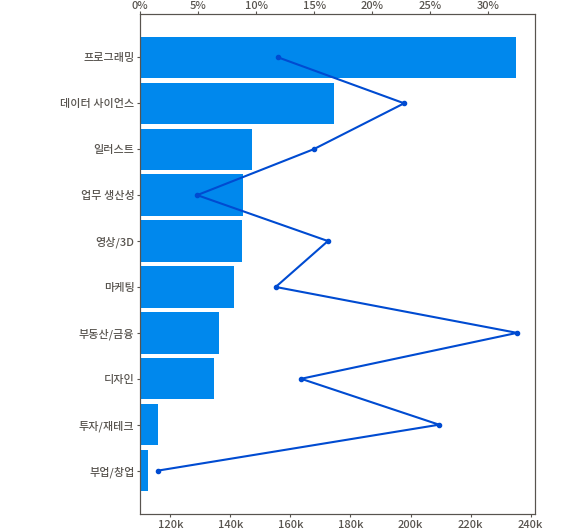
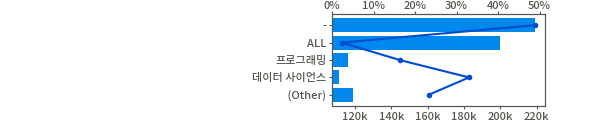
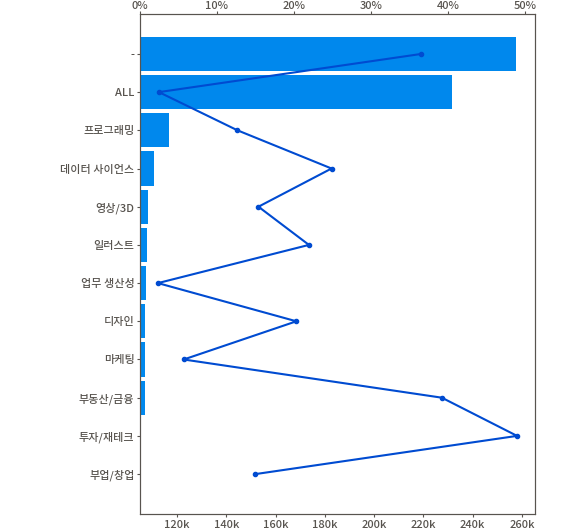
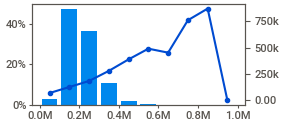
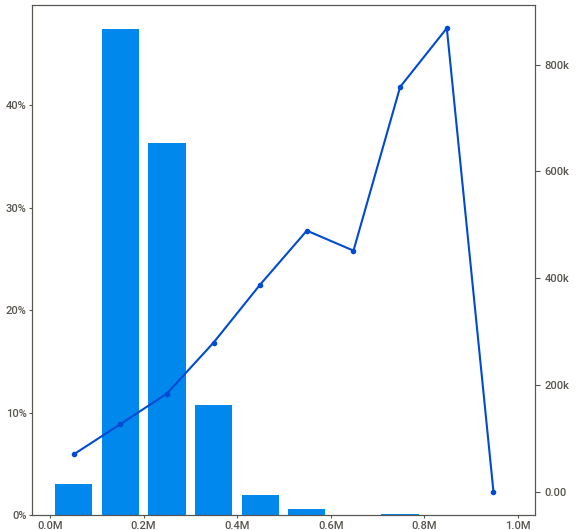
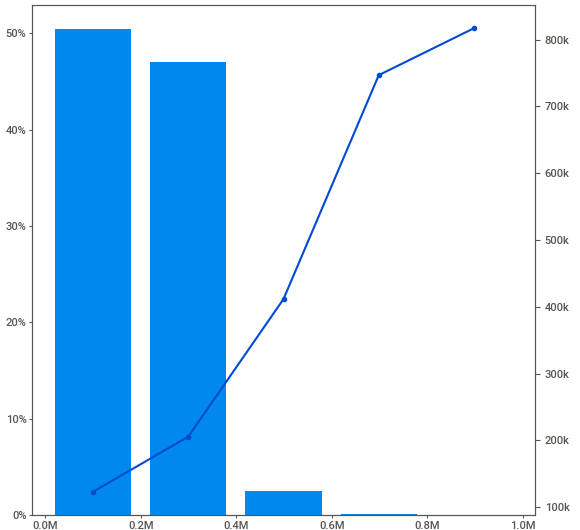
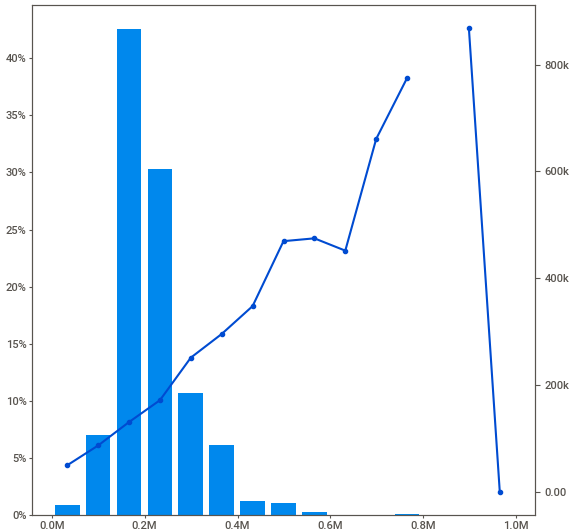
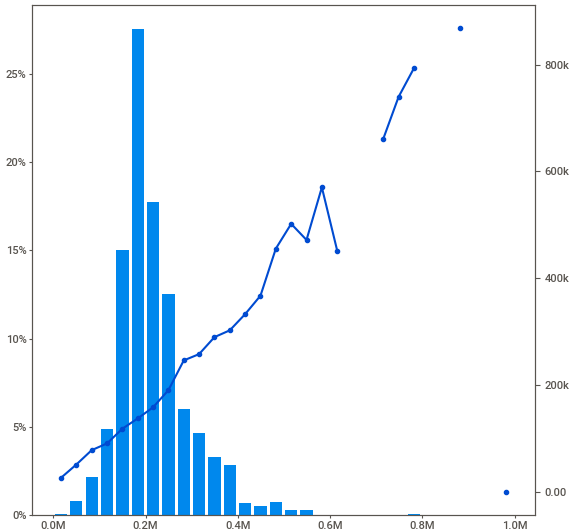
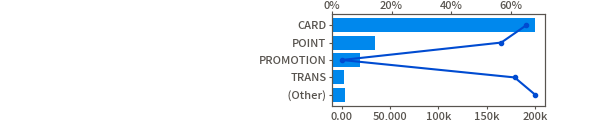
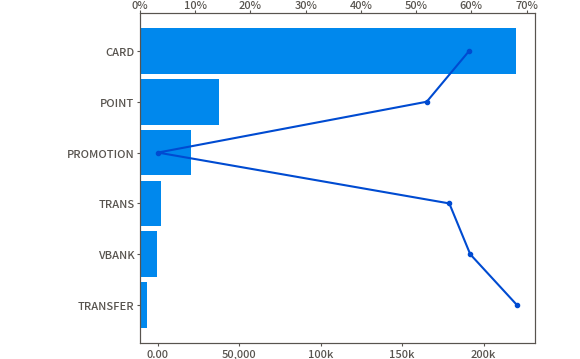
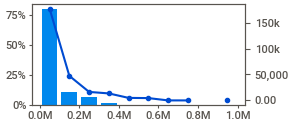
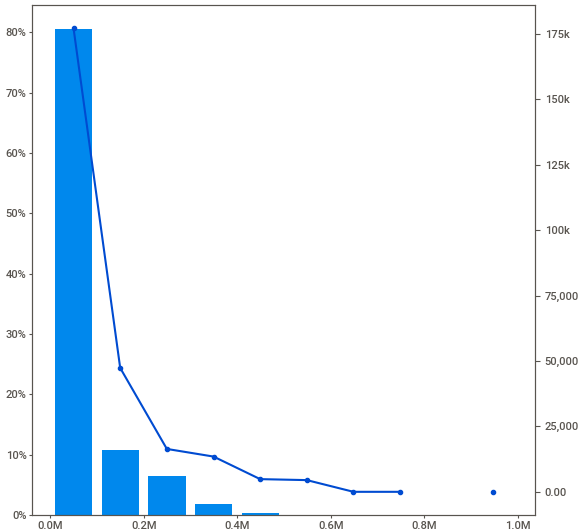
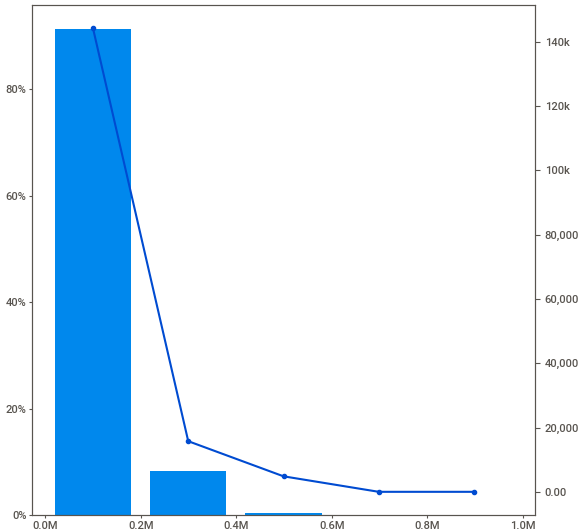
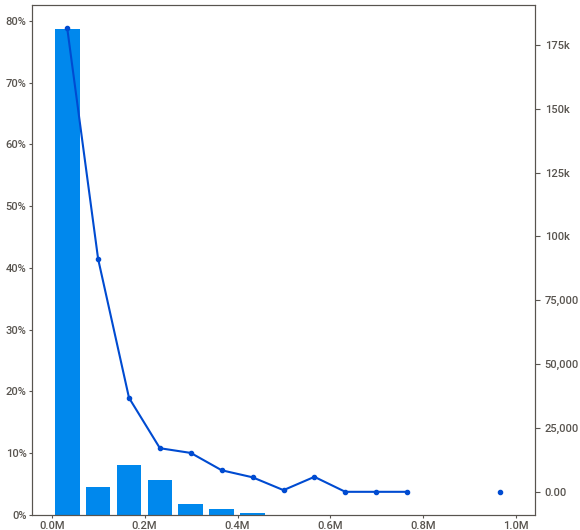
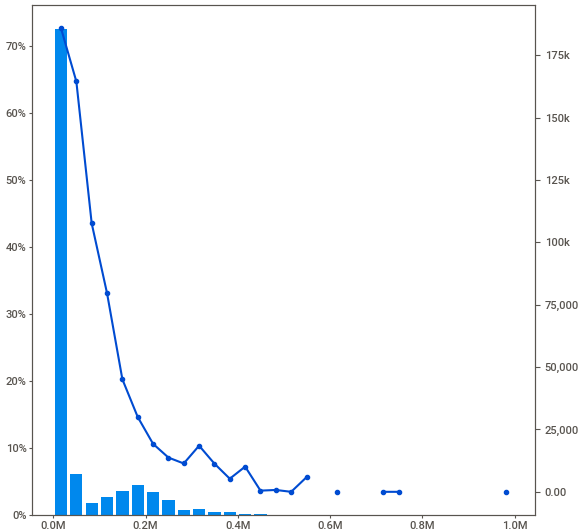
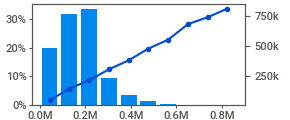
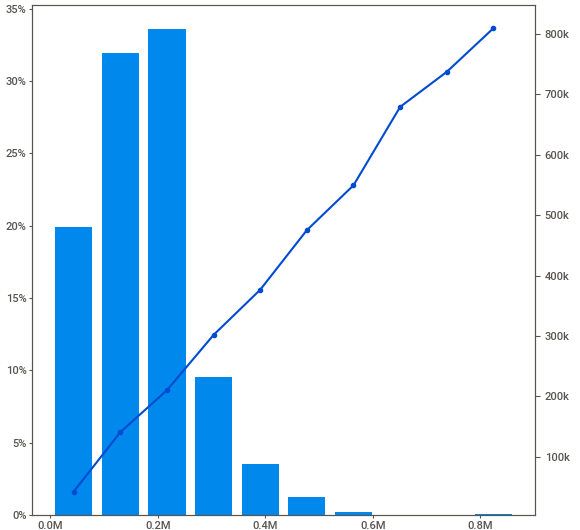
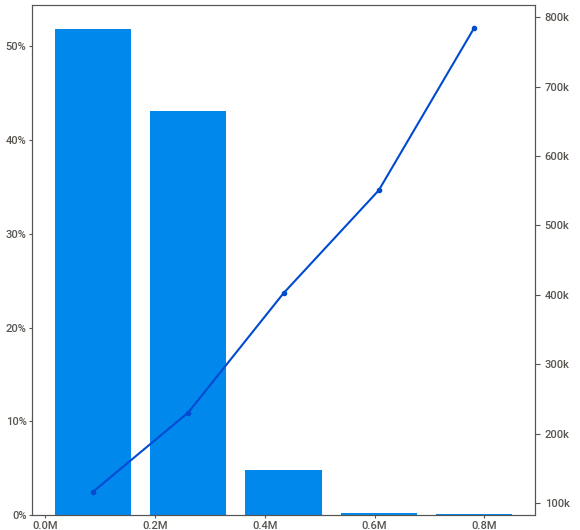
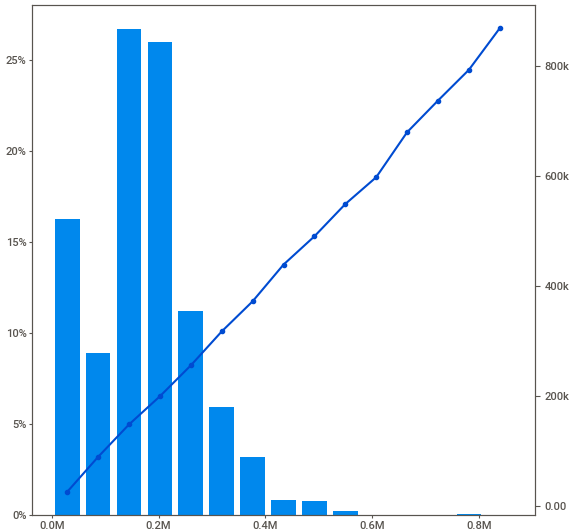
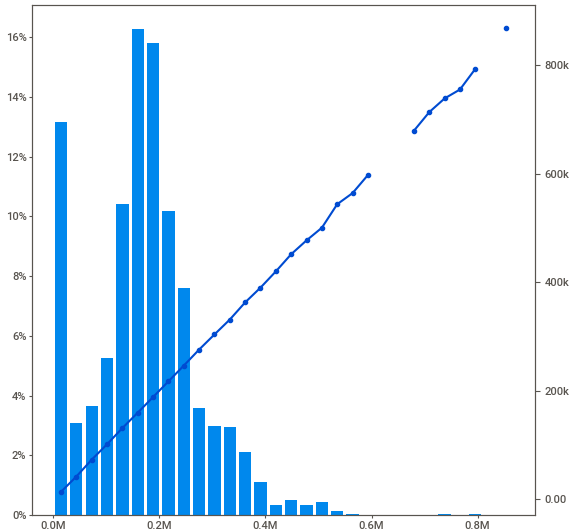
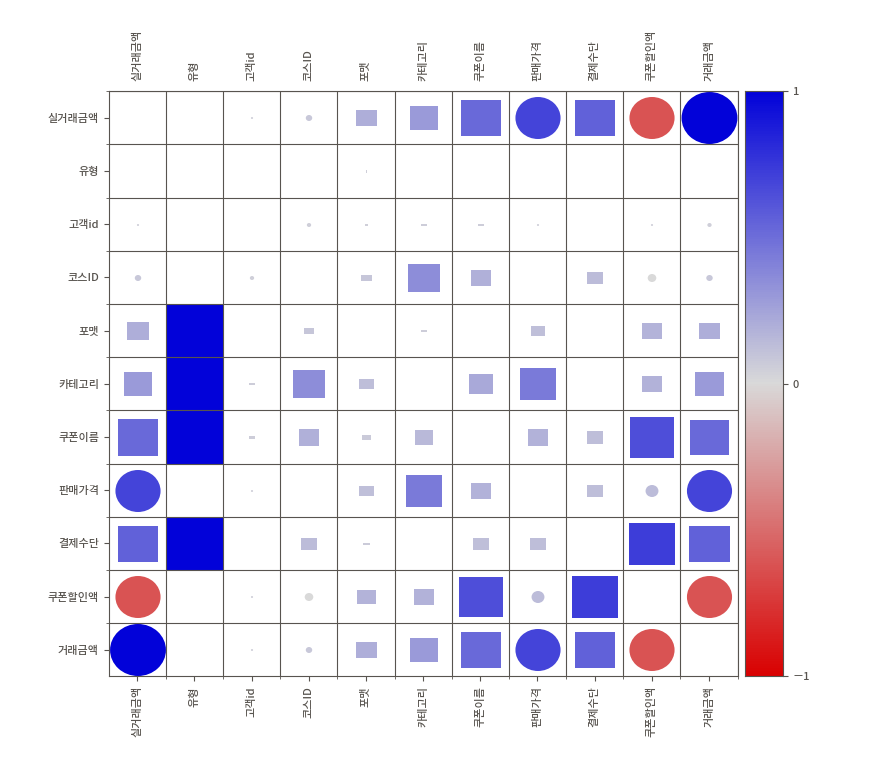
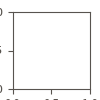

In [ ]:
report = sv.analyze(modified_df3, target_feat='실거래금액')
#display the report
report.show_notebook(layout="vertical", w=850, h=700, scale=0.8)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:92: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_compare_names = [cur_name for cur_name, cur_series in compare_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  st


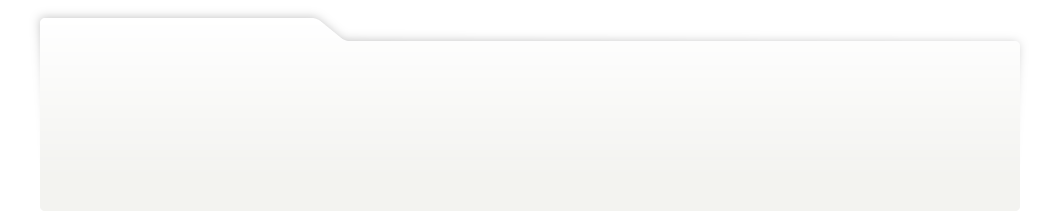
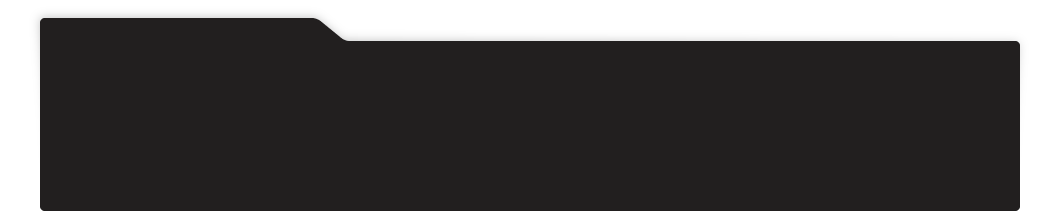
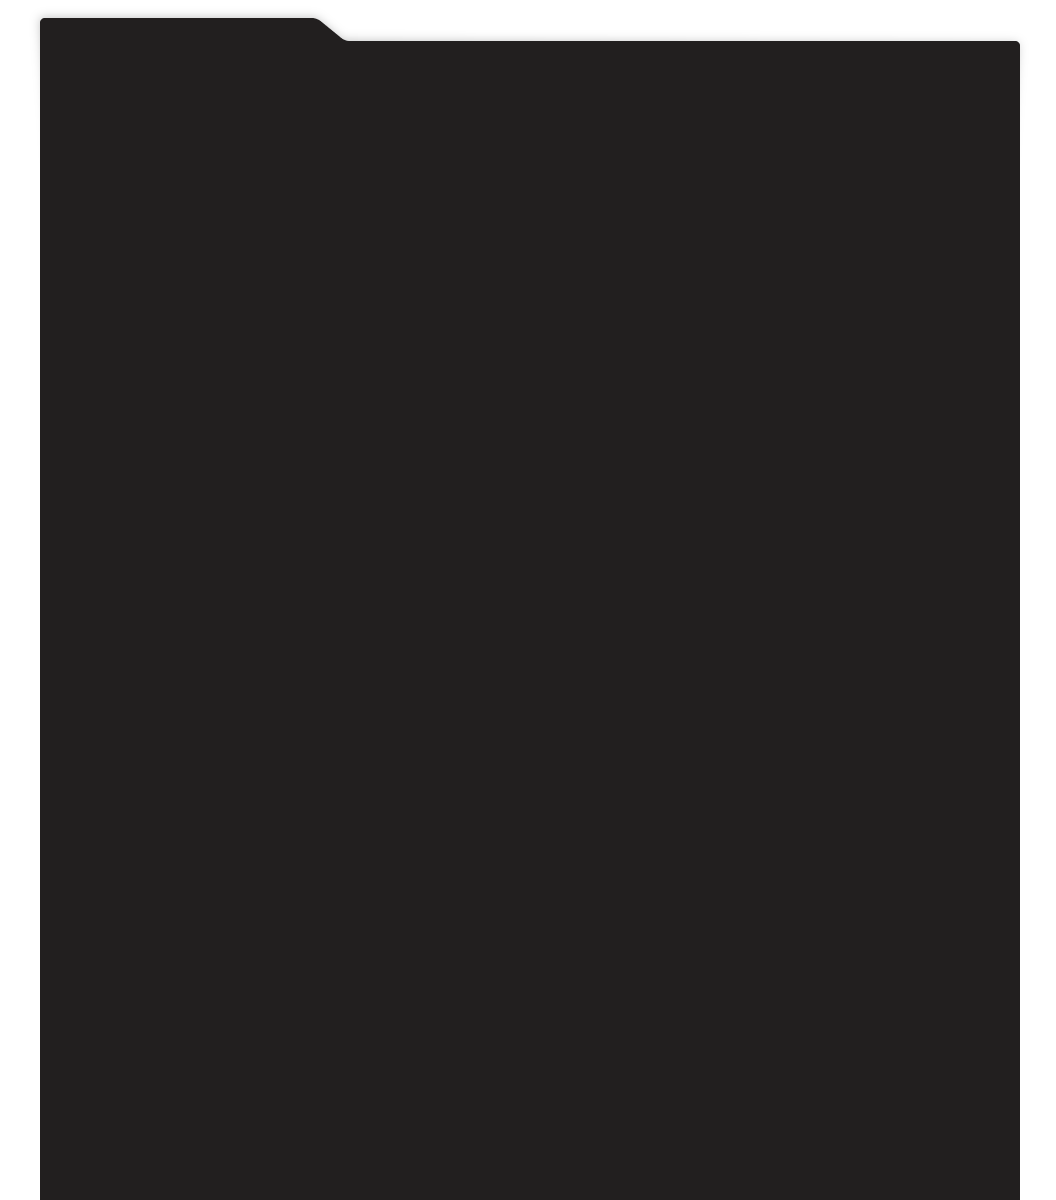
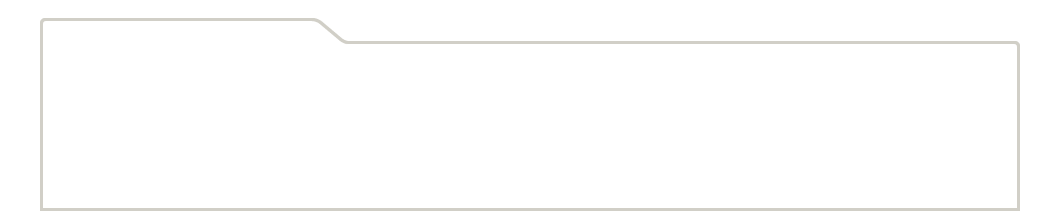
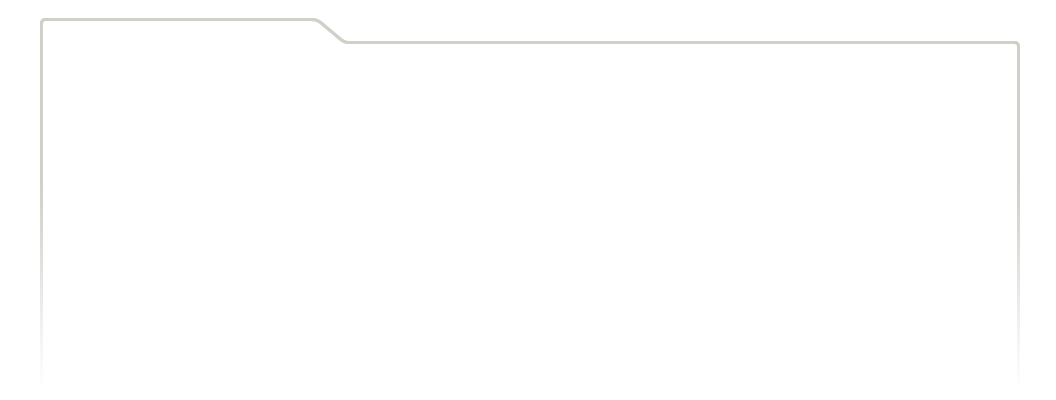
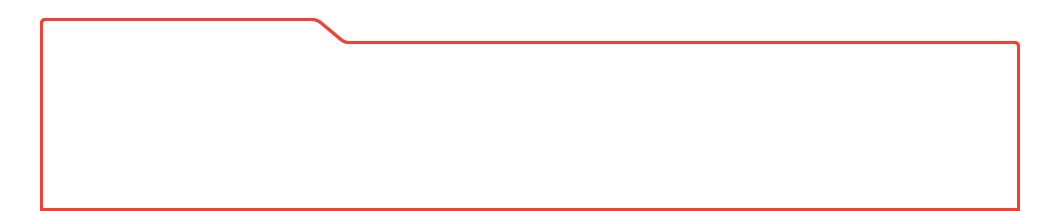
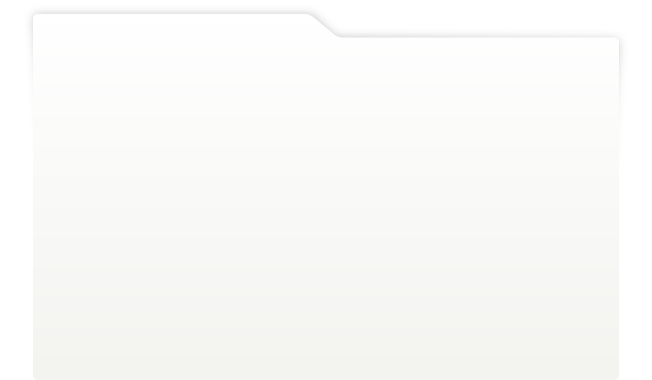
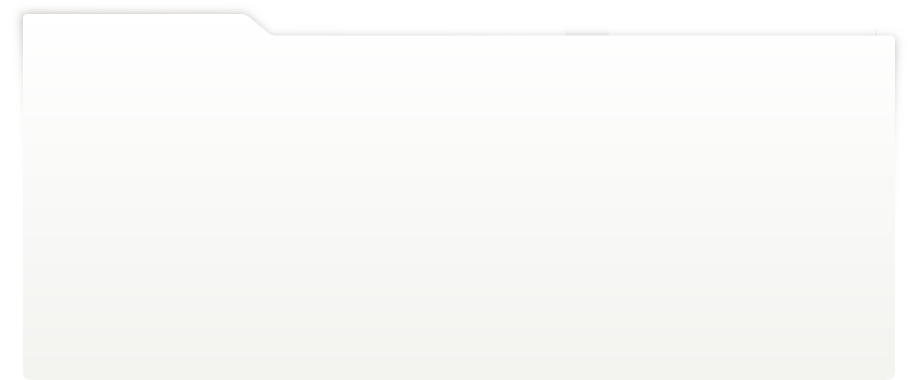
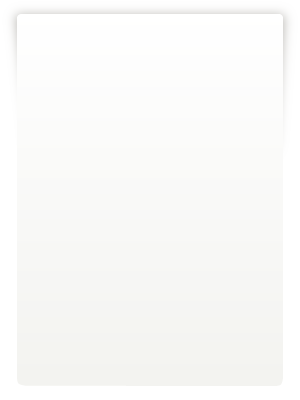
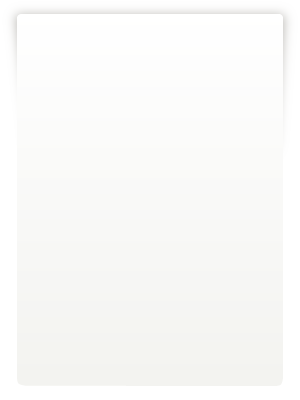
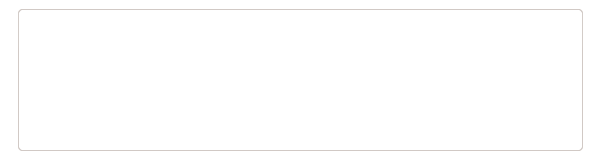
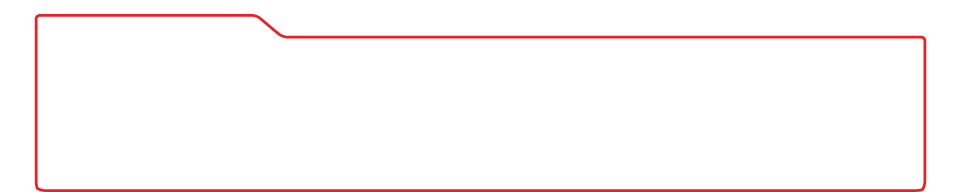
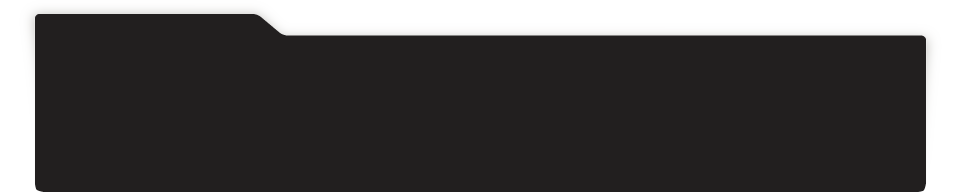
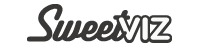
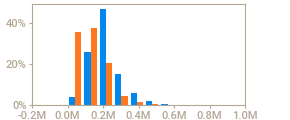
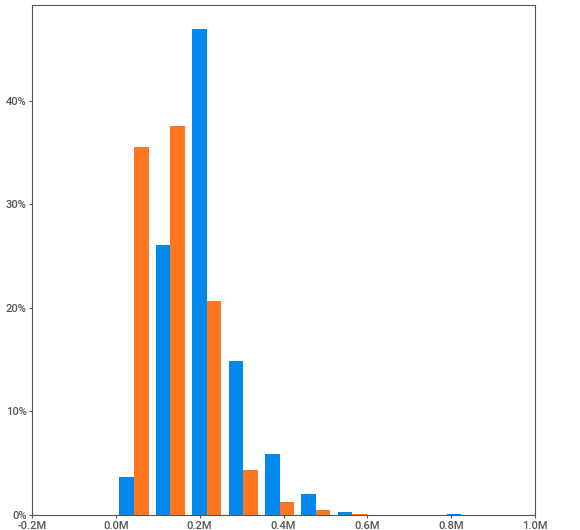
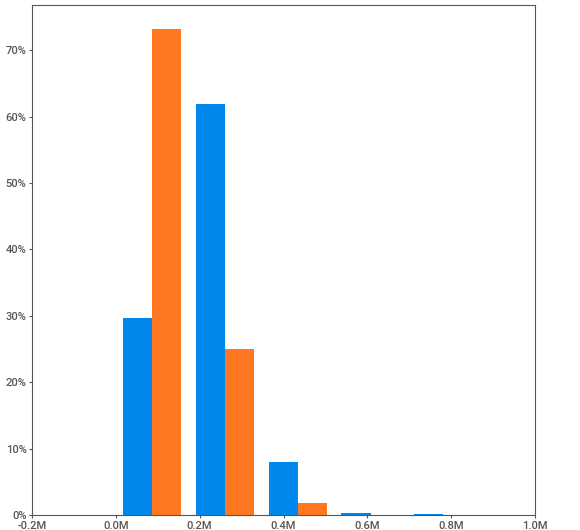
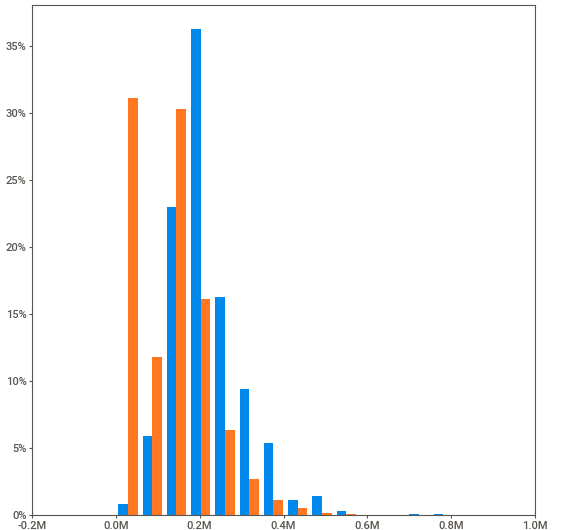
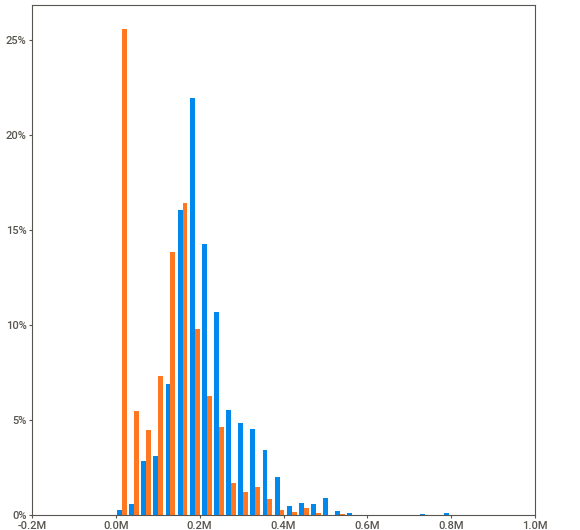
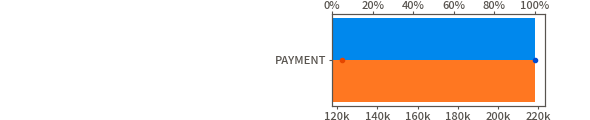
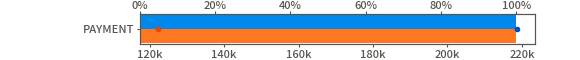
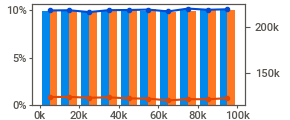
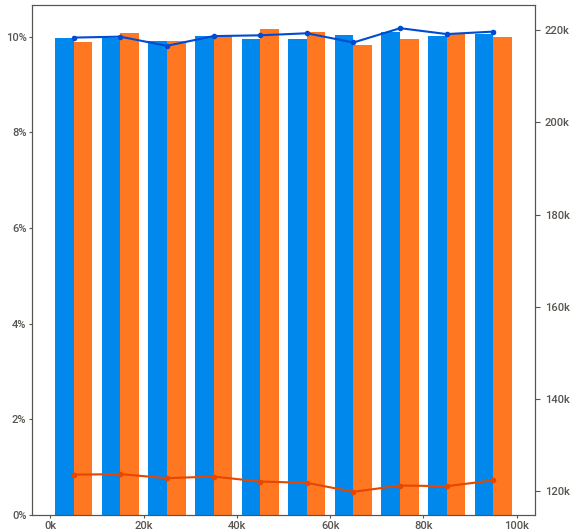
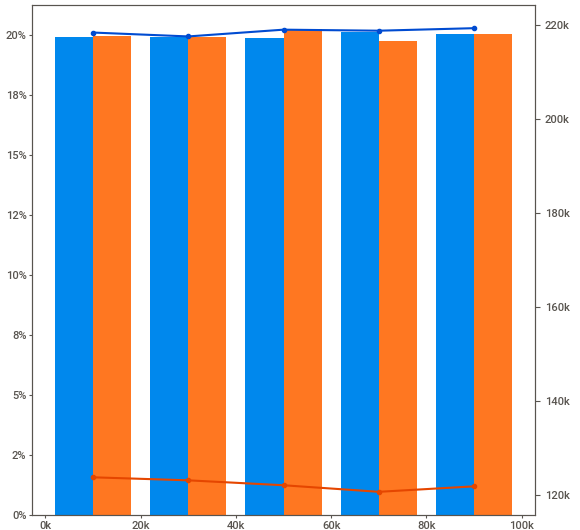
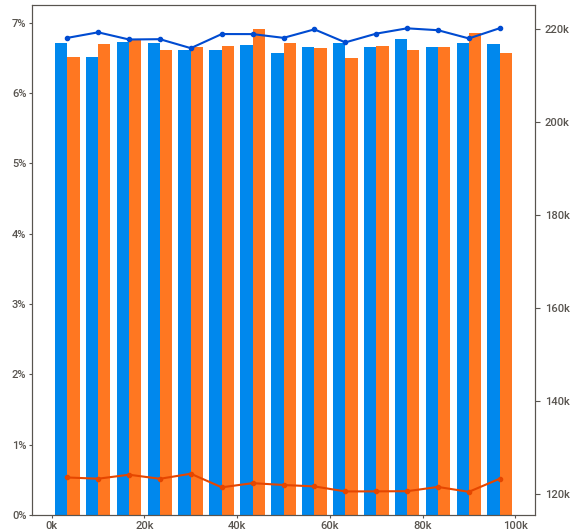
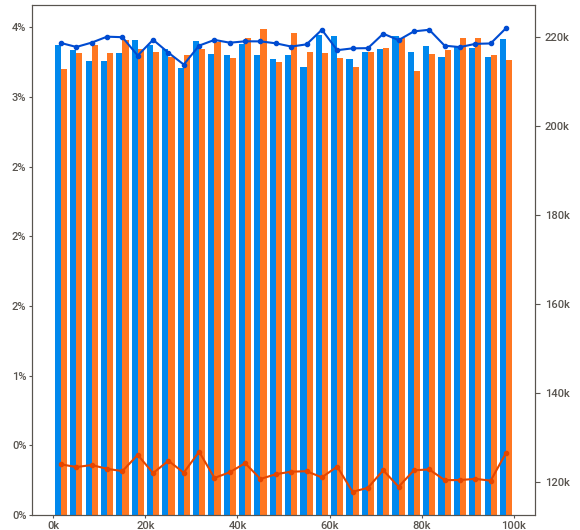
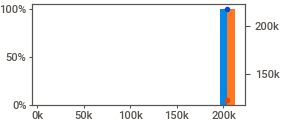
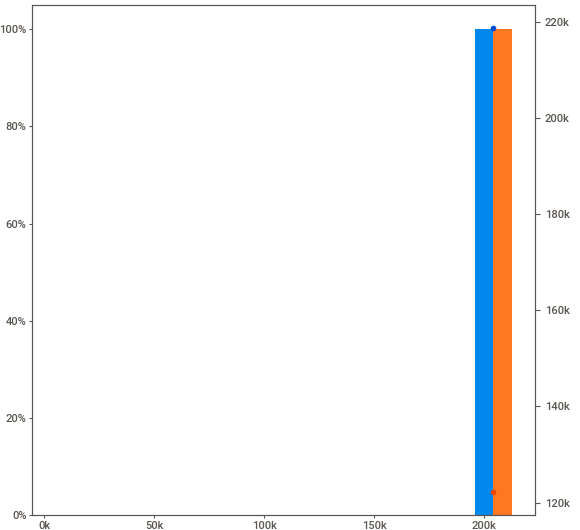
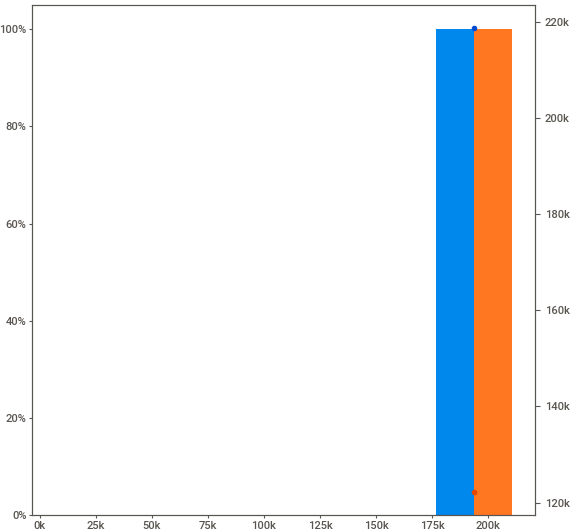
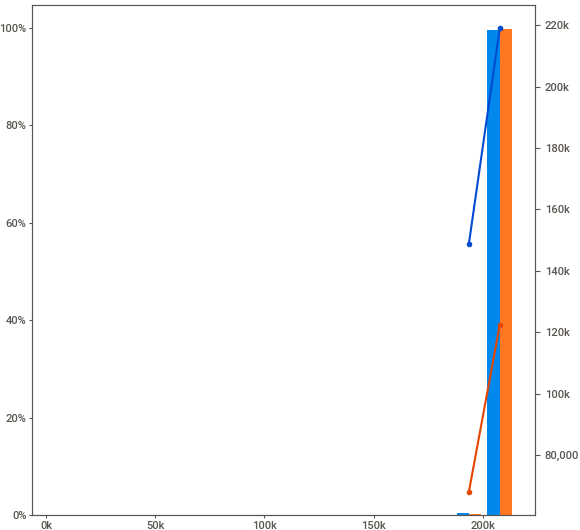
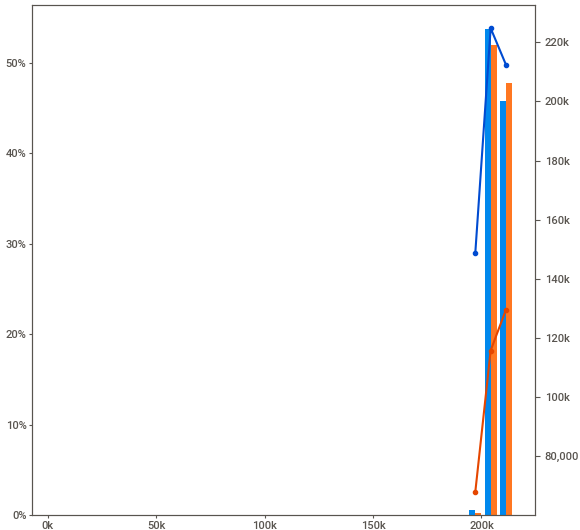
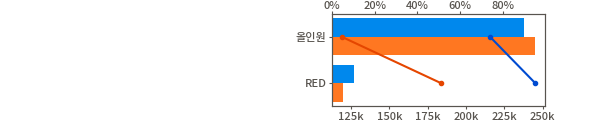
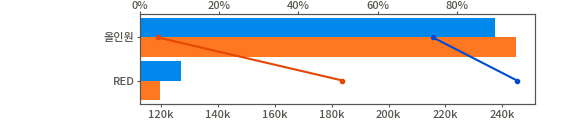
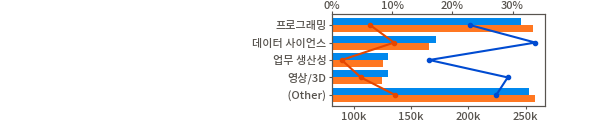
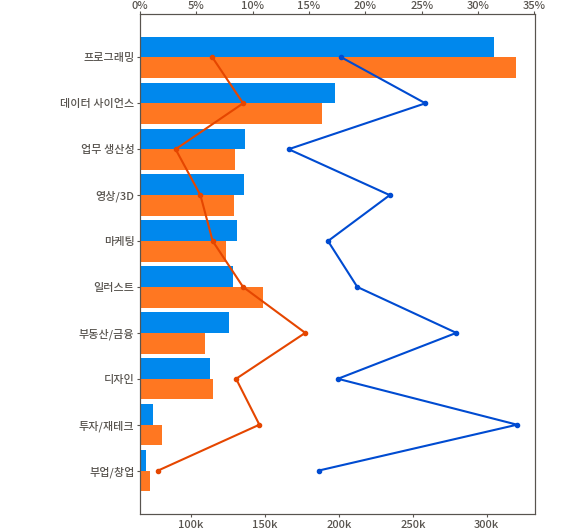
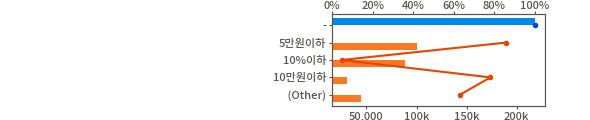
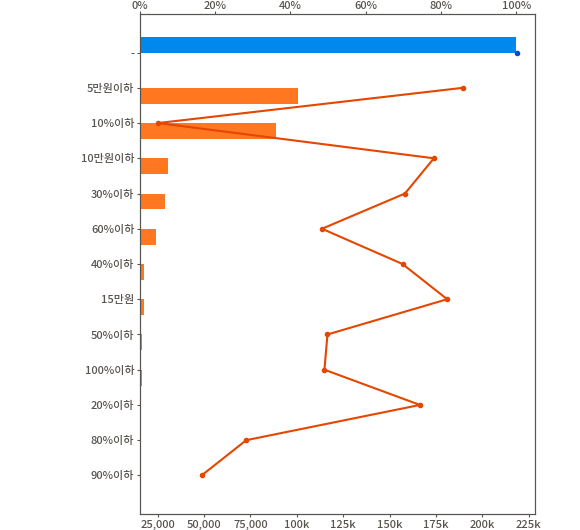
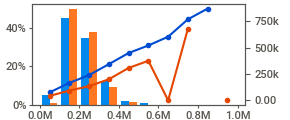
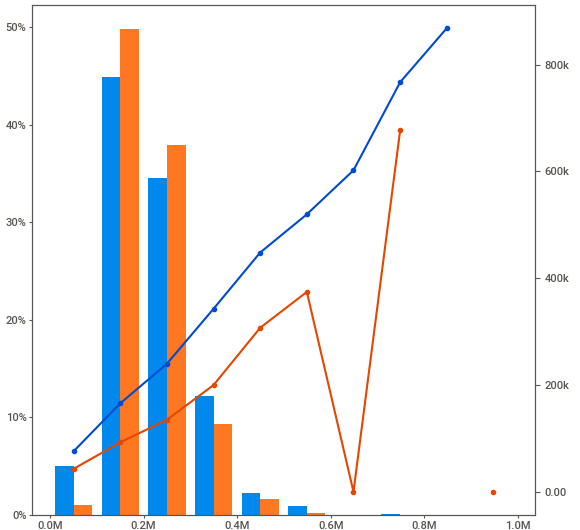
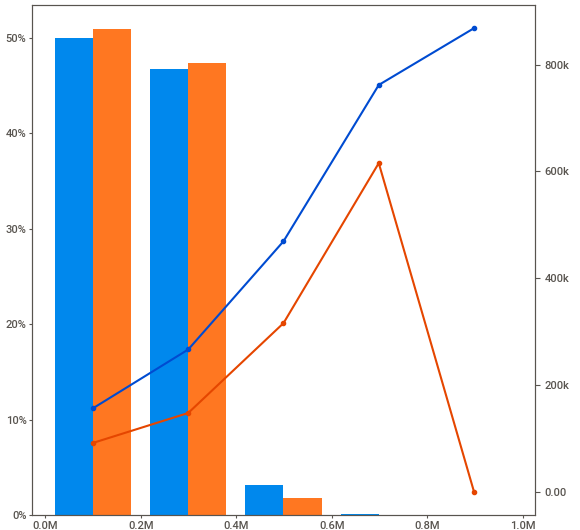
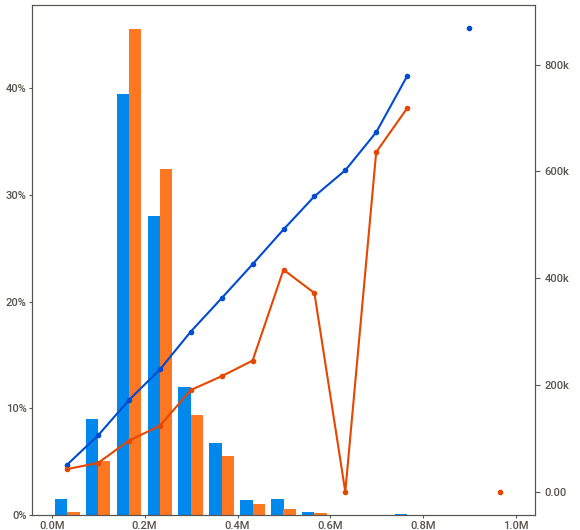
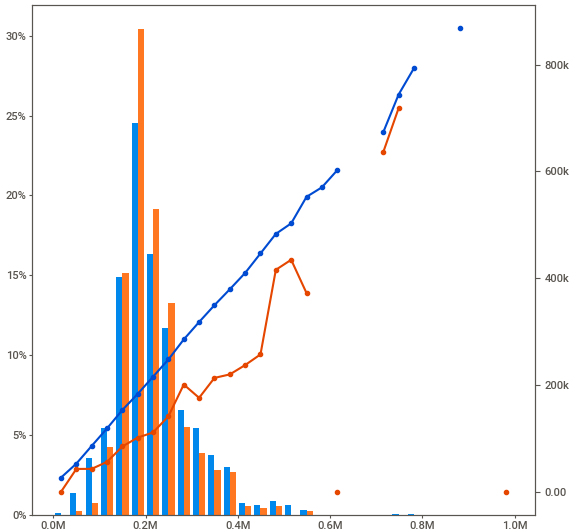
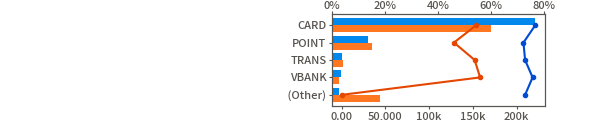
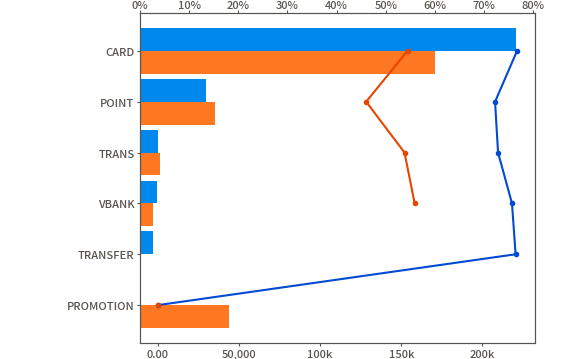
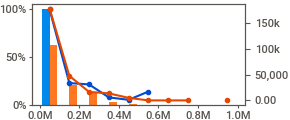
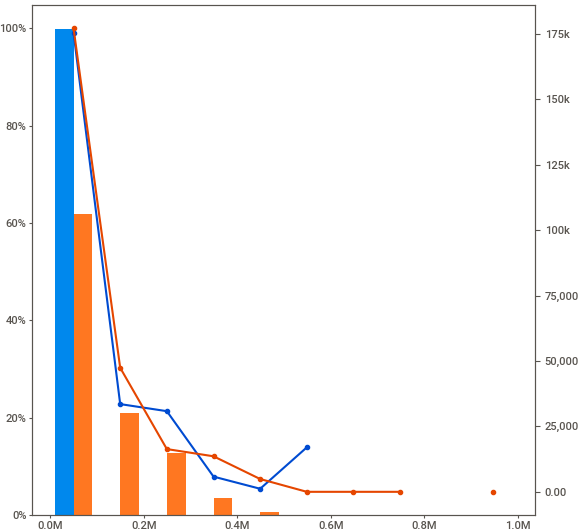
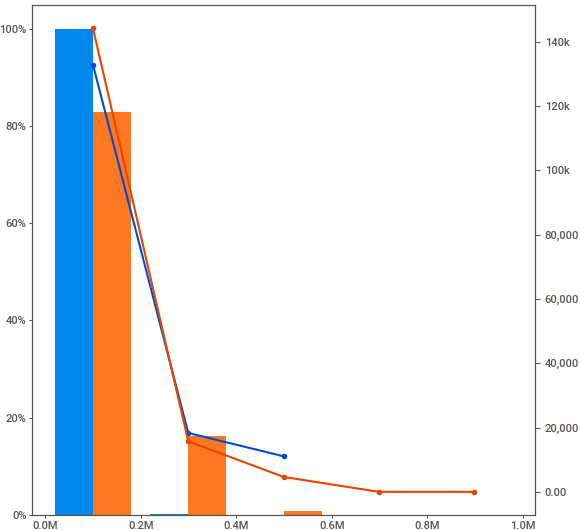
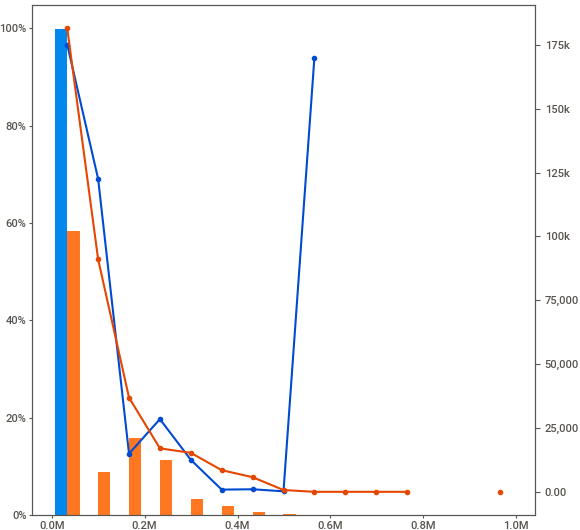
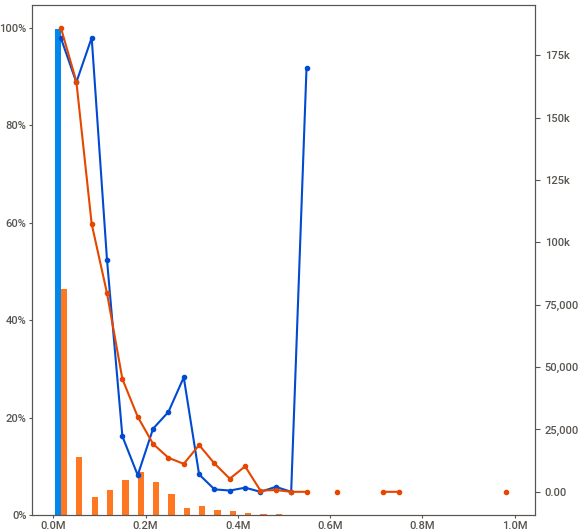
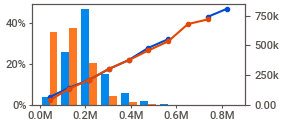
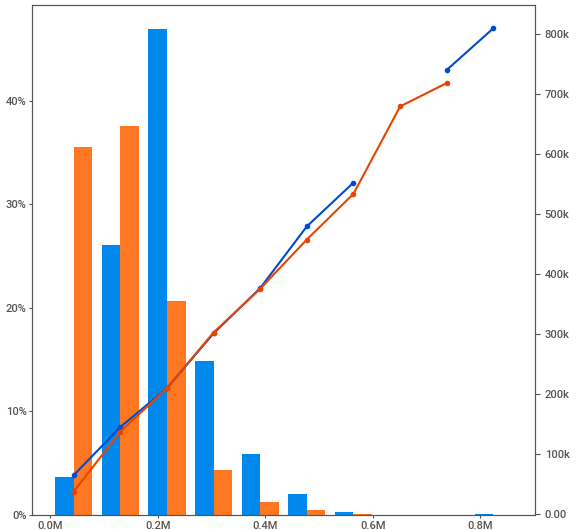
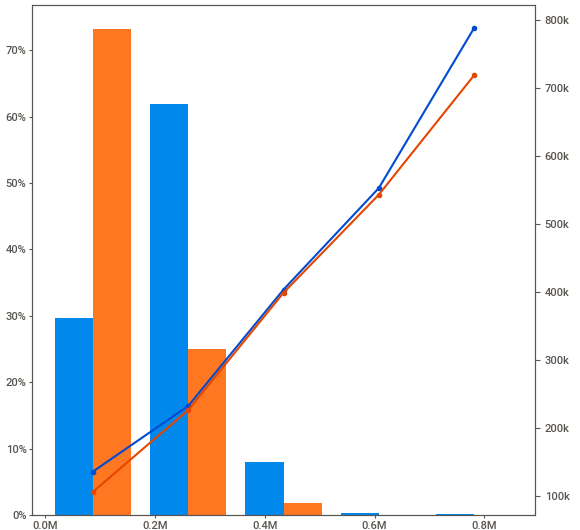
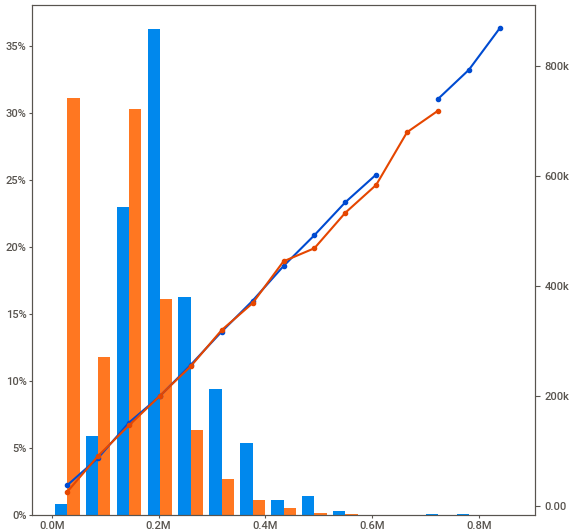
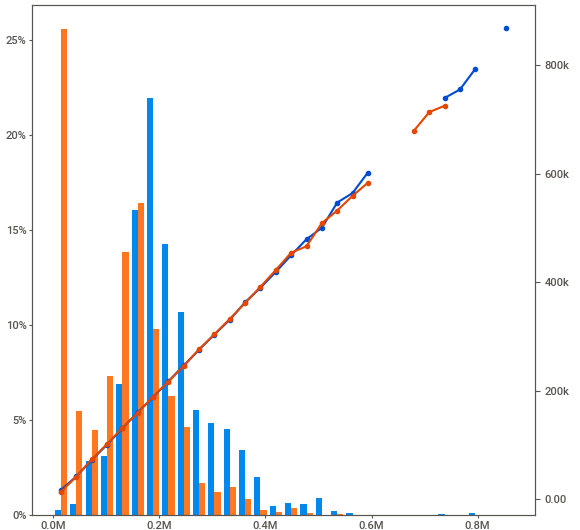
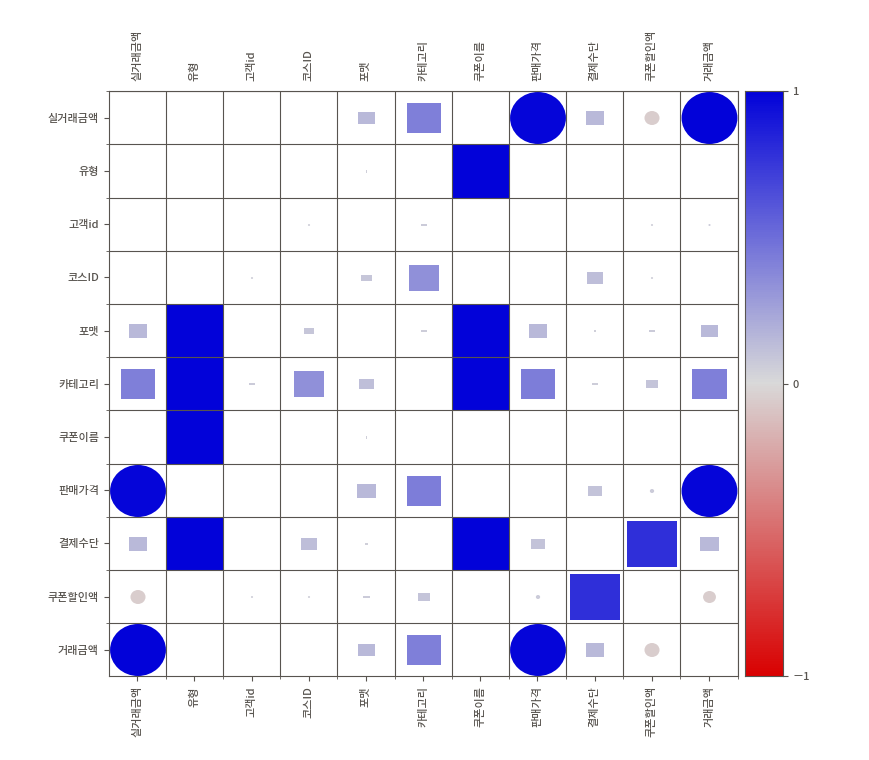
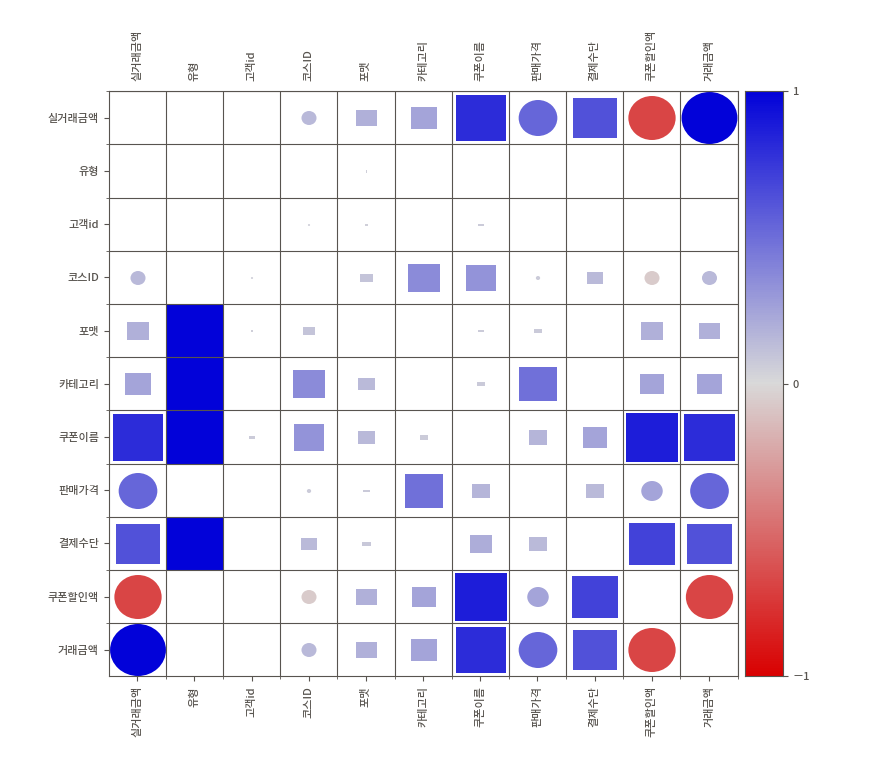

In [ ]:
group_report = sv.compare_intra(modified_df1, modified_df1['쿠폰이름']=='-' , ['사용안함','사용'], target_feat = '실거래금액', feat_cfg = feature_config)
#display the report
group_report.show_notebook(layout="vertical", w=850, h=700, scale=0.8)

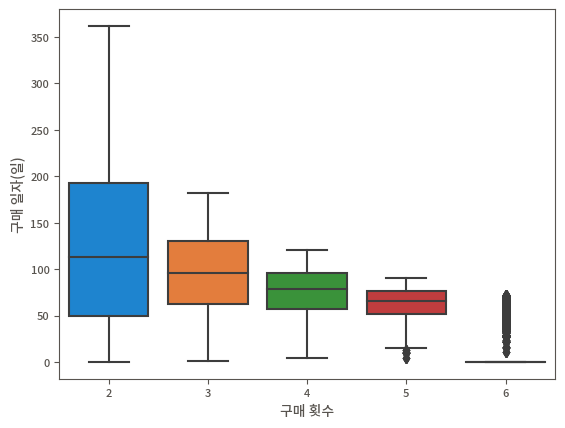

In [ ]:
md.show_repurchase_cycle(new_df)

# 고객분류

- 고객id가 데이터프레임 안에서 등장한 횟수별로 고객군을 분류
- 고객 분류를 통해 차별화 된 마케팅을 진행하고자 합니다

구매 횟수별 카테고리의 변화가 있는지 확인해봄 -> 구매횟수의 변화에도 패스트캠퍼스의 강의는 프로그래밍/데이터 사이언스 카테고리에 대한 거래내역이 많은 것을 볼 수 있음 -> 이를 통해 그러한 강의에 대한 수요가 크고 관심이 높다는 것을 알 수 있었음 -> 반대로 재테크, 부업/창업의 관심은 상대적으로 덜함 (1년 매출도 확인해봐야함) -> 개선할 필요가 있음

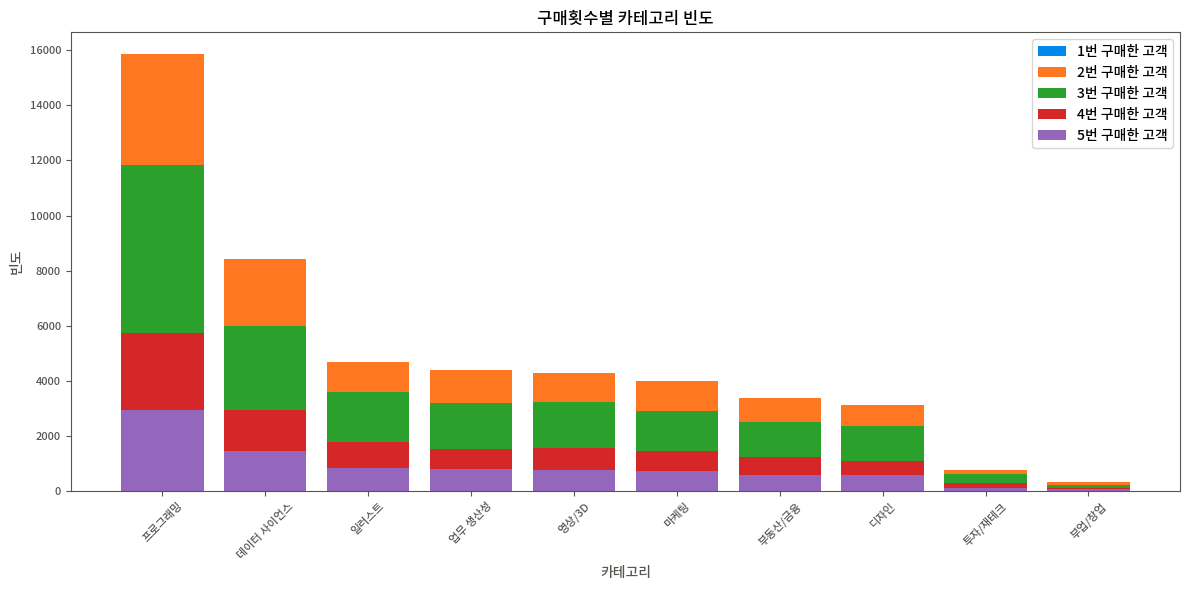

In [ ]:
one_data, two_data, three_data, four_data, five_more_data = md.purchase_count_by_category(new_df)

구매 횟수별 고객수를 나타낸 그래프 -> 2번구매에서 3번째구매로 이어지는 구간과 3번구매에서 4번째로 이어지는 구간의 폭이 큼을 볼 수 있음 이탈가능성 높음-> 이를 기반으로 이탈 예측 모델을 구축하여 이탈 가능성이 높은 고객에게 리마인더나 할인 쿠폰등을 이용한다면 이탈을 줄일 수 있을 것같습니다.

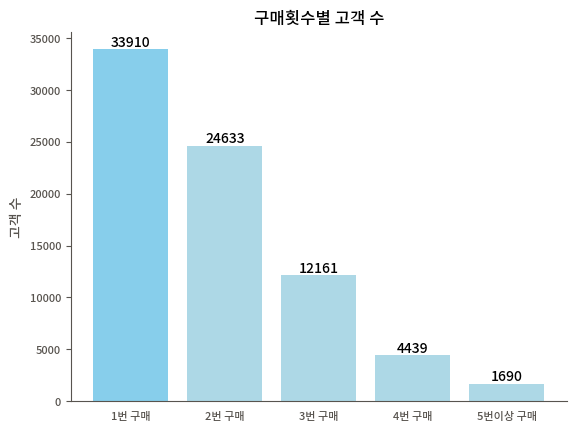

In [ ]:
md.purchase_count_by_customer(new_df, one_data, two_data, three_data, four_data, five_more_data)

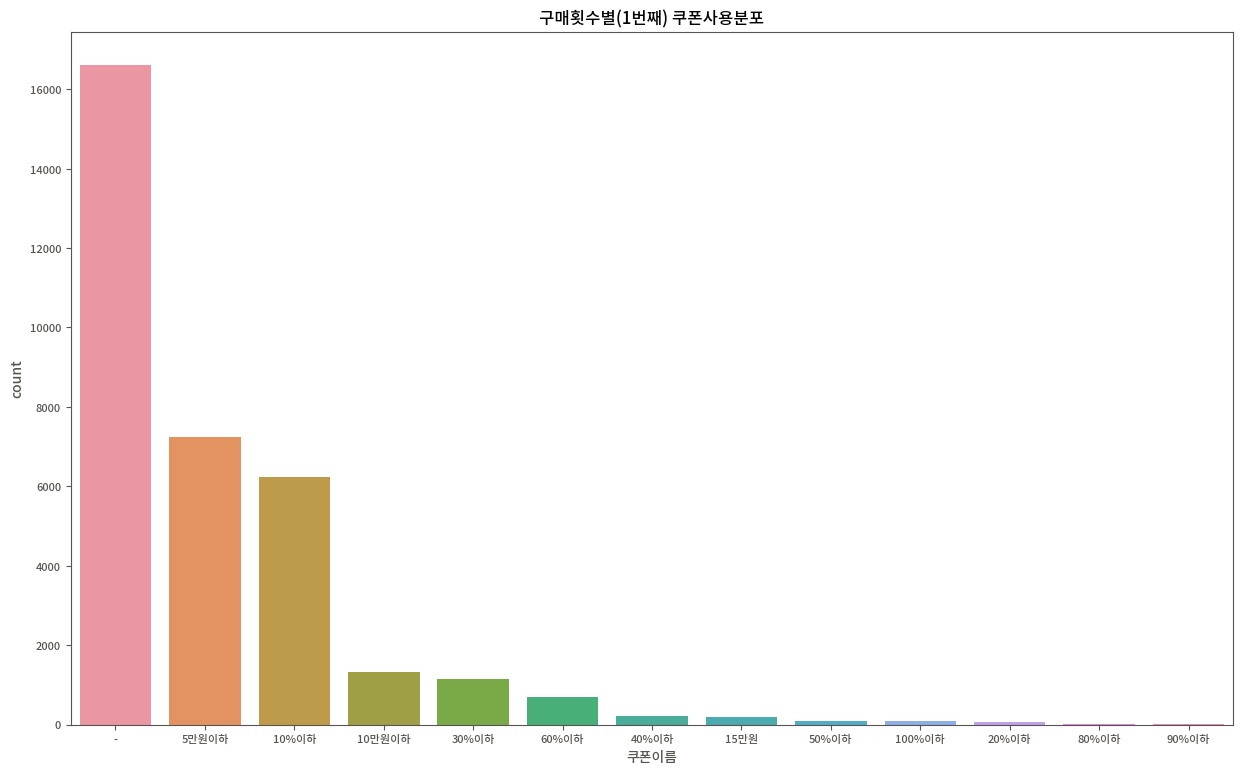

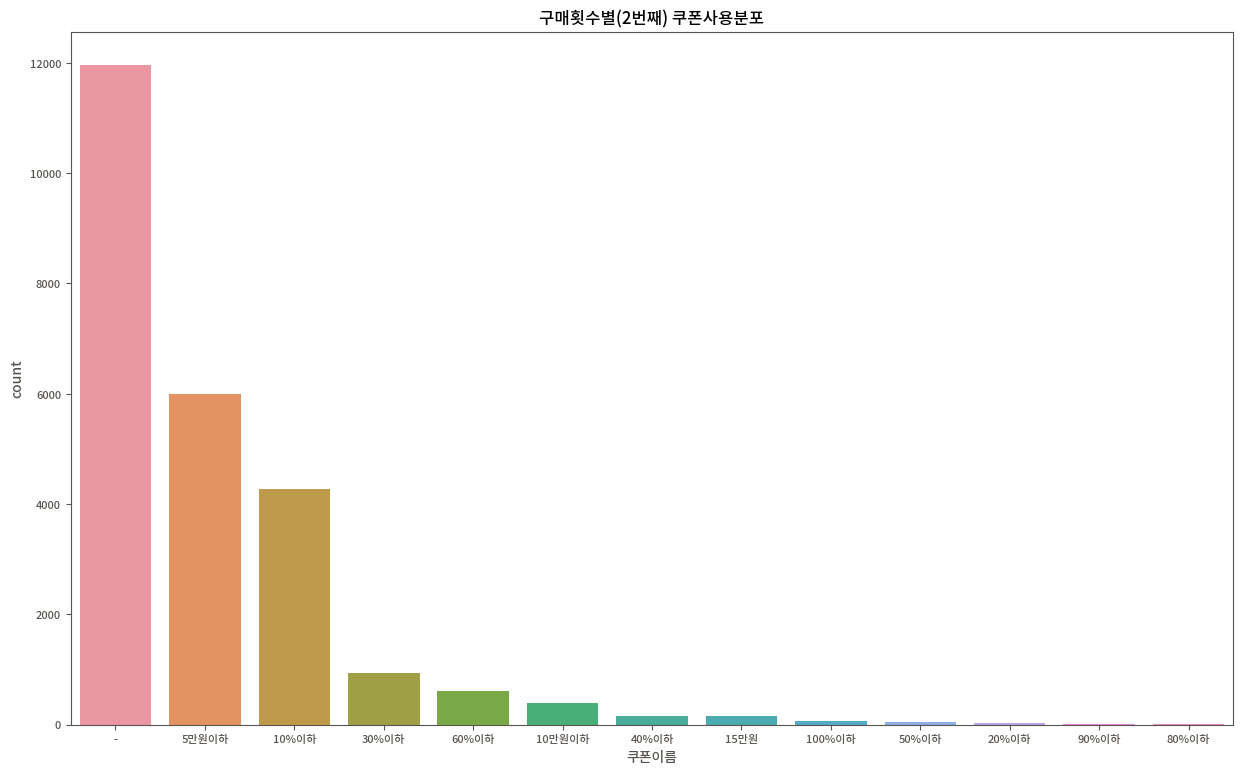

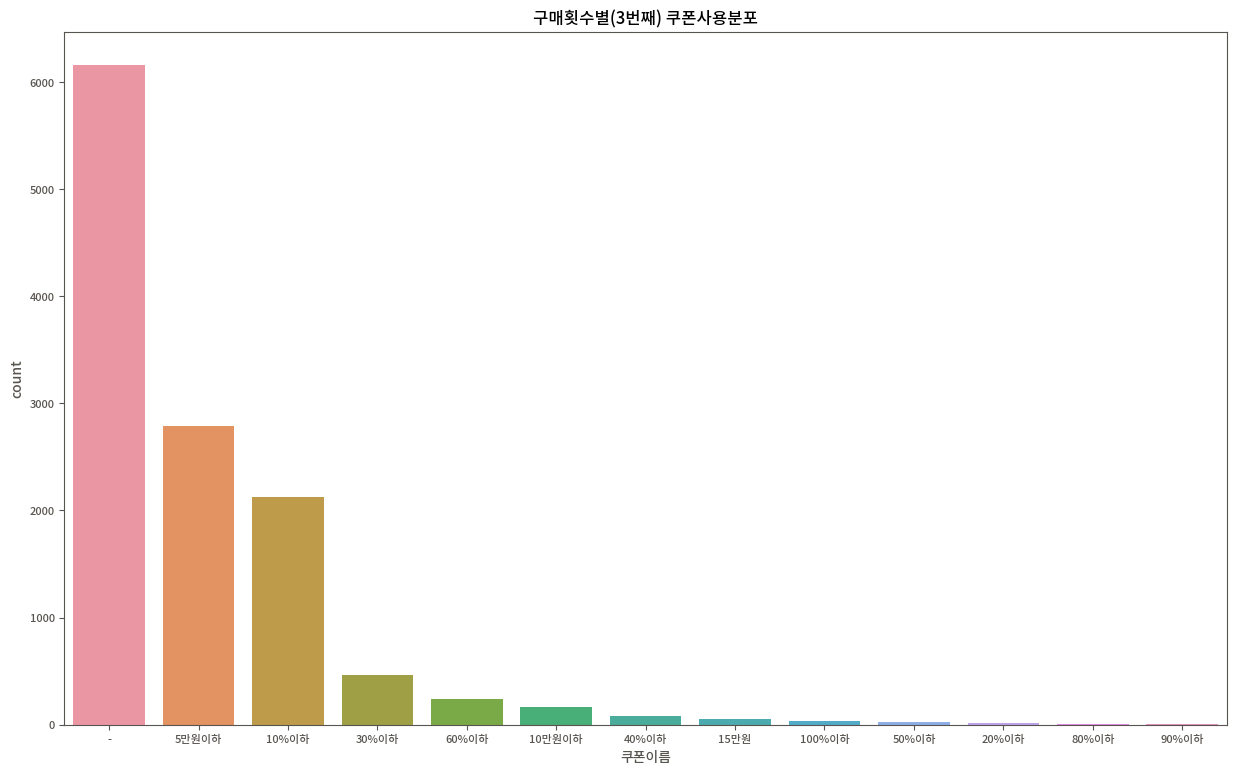

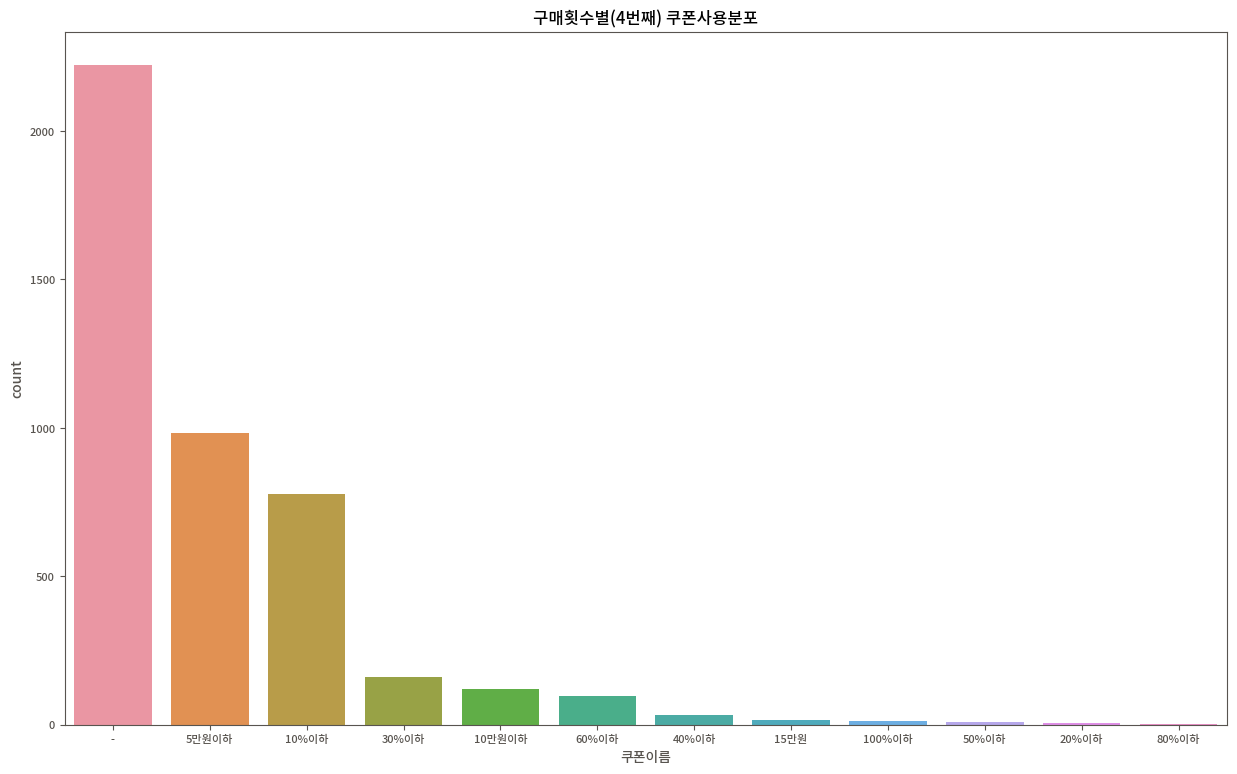

In [ ]:
for i in range (1,5):
    md.purchase_count_coupon_distribution(modified_df1, i)

In [ ]:
modified_df1.to_csv('쿠폰이름_할인액.csv')